In [645]:
import numpy as np
import pandas as pd
import matplotlib as plt
import networkx as nx
%matplotlib inline
# from DYNASMART_Process import *
from Modules import DYNASMART_Process as dy
# import preprocessing_read_skim_file as rs
from Modules import AV_functions as av
from Modules import Solve_DARP as sod
from Modules import Postprocess_DARP as pod
from Modules import Preprocess_DARP as prd
from Modules import DARP_to_DYNA as dtd
from gurobipy import *
from Modules import *
import datetime
import requests
import math
import importlib

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [646]:
#Read in the basic traveler and trips informationa and joint the houshold id
# traveler_info=pd.read_csv('input/traveler.csv')
personData=pd.read_csv('input/personData_1.csv')
person_type_dic=dict(zip(personData.person_id,personData.type))
traveler_trips=pd.read_csv('input/traveler_trip_info_improved.csv',index_col=0)
num_zones,num_nodes,num_links,node_detail,node_id,link_detail,link_id=dy.read_network('input/network.dat')
nodexy=dy.read_xy('input/xy.dat')
superzone_filepath='Input/SuperZone.dat'
linktraveltime_filepath='Input/output_td_linktraveltime.dat'
superzone_map=dy.read_superzone_info(superzone_filepath)
origin_path='Input/origin.dat'
destination_path='Input/destination.dat'
origins,destinations,origin_links=dy.read_origin_destion(origin_path,destination_path)
origin_links['length']=origin_links.apply(lambda row: 
                                          link_detail[int(link_id[node_id[row.u_node],node_id[row.d_node]])][0,4],axis=1)
VPNRSkim_folder_filepath='Input/vehicularPNRSkim'
Vehicular_Skim,Vehicular_Skim_Dict=dy.read_vehicle_skim(VPNRSkim_folder_filepath)
transit_skim_folderpath='Input/'
TransitMazTazFlag,drivingweight,walkingweight,\
TransitSkimTimeIntervalLength,MaxNumTransitSkimTimeInterval,WalkSpeed,transit_zone_candidates,\
Transit_AB_Cost_Skim,Transit_AB_Time_Skim,three_link_walk=dy.read_transitskim(transit_skim_folderpath)
Transit_AB_Cost_Skim_Dict=dy.convert_skim_dataframe_to_dict(Transit_AB_Cost_Skim,TransitSkimTimeIntervalLength)
Transit_AB_Time_Skim_Dict=dy.convert_skim_dataframe_to_dict(Transit_AB_Time_Skim,TransitSkimTimeIntervalLength)
transit_zone_dict={}
for link_zone in three_link_walk.three_link_zone.unique():
    transit_zone_dict[link_zone]=list(three_link_walk[three_link_walk.three_link_zone==link_zone]['transit_zone'].astype(int))
three_link_walk_dict={}
for index,group in three_link_walk.groupby(['three_link_zone']):
    three_link_walk_dict[index]={}
    for inx,row in group.iterrows():
        three_link_walk_dict[index][row.transit_zone]=row.distance
intrasuperzone_vehicle_filepath='Input/intrasuperzone_vehicle.dat'
intrasuperzone_path_filepath='Input/intrasuperzone_path.dat'
intrasuperzone_info,intrasuperzone_path_dic=dtd.read_intrasuperzone_files(intrasuperzone_vehicle_filepath,intrasuperzone_path_filepath)
traveler_trips=prd.compare_mode_utlity(traveler_trips,TransitMazTazFlag,
                        three_link_walk_dict,Transit_AB_Cost_Skim_Dict,
                        Transit_AB_Time_Skim_Dict,TransitSkimTimeIntervalLength,
                        Vehicular_Skim_Dict,superzone_map,drivingcost_per_mile,transit_zone_dict)

56 57 72


In [648]:
output_flag=0
# target_hh_id=2744264
min_length=15
max_length=20
single_model_runtime=60*3
drivingcost_per_mile=0.5
reward_mode=1
run_mode=0
darp_solutions=[]
cav_use_mode=0
num_time_interval=1
TL=[i*1440/num_time_interval for i in range(num_time_interval)]
TU=[(i+1)*1440/num_time_interval for i in range(num_time_interval)]
num_cav=1
share_ride_factor=1.5
time_window_flag=0
target_trips=traveler_trips.loc[(traveler_trips.tripmode<=6) &(traveler_trips.driver_passenger_flag>0)]
target_trips=target_trips[(target_trips.orig_taz!=target_trips.dest_taz) | (target_trips.trip_counter==1)]
target_trips=target_trips.append(traveler_trips[traveler_trips.tripmode>8])
target_trips.value_of_time=target_trips.value_of_time*0.8
route_info_modechoice08,darp_solutions_modechoice08=\
sod.get_route_info_allhh(target_trips,
                         output_flag,min_length,max_length,single_model_runtime,drivingcost_per_mile,
                         reward_mode,run_mode,cav_use_mode,num_time_interval,num_cav,share_ride_factor
                         ,time_window_flag,Vehicular_Skim_Dict,
                         Transit_AB_Cost_Skim_Dict,Transit_AB_Time_Skim_Dict,three_link_walk_dict,
                         superzone_map,TL,TU,
                         transit_zone_dict,transit_zone_candidates,TransitMazTazFlag,
                         TransitSkimTimeIntervalLength )

Estimate Route for the  0 th household  2018-07-16 14:52:24.078179
1 9 2018-07-16 14:52:24.705221
2 16 2018-07-16 14:52:25.602267
3 13 2018-07-16 14:52:26.487321
4 27 2018-07-16 14:52:28.205421
5 9 2018-07-16 14:52:28.601449
6 9 2018-07-16 14:52:29.054477
7 8 2018-07-16 14:52:29.439498
8 9 2018-07-16 14:52:29.920522
9 8 2018-07-16 14:52:30.328551
10 7 2018-07-16 14:52:30.662565
11 11 2018-07-16 14:52:31.734631
12 12 2018-07-16 14:52:32.204658
13 4 2018-07-16 14:52:32.430670
14 9 2018-07-16 14:52:32.877698
15 14 2018-07-16 14:52:33.824753
16 14 2018-07-16 14:52:34.582802
17 11 2018-07-16 14:52:35.134829
18 8 2018-07-16 14:52:35.551860
19 6 2018-07-16 14:52:35.890872
20 5 2018-07-16 14:52:36.303898
21 6 2018-07-16 14:52:36.683921
22 10 2018-07-16 14:52:37.454964
23 19 2018-07-16 14:52:38.936053
24 18 2018-07-16 14:52:39.727102
25 14 2018-07-16 14:52:40.773164
26 6 2018-07-16 14:52:41.013173
27 11 2018-07-16 14:52:41.639212
28 6 2018-07-16 14:52:41.950232
29 5 2018-07-16 14:52:42.231246
3

243 15 2018-07-16 14:55:38.199583
244 21 2018-07-16 14:55:39.457655
245 16 2018-07-16 14:55:40.367707
246 10 2018-07-16 14:55:40.937747
247 10 2018-07-16 14:55:41.564778
248 9 2018-07-16 14:55:42.005805
249 10 2018-07-16 14:55:42.534836
250 12 2018-07-16 14:55:43.677903
251 21 2018-07-16 14:55:45.410009
252 27 2018-07-16 14:55:48.708197
253 2 2018-07-16 14:55:48.860206
254 20 2018-07-16 14:55:52.885445
255 4 2018-07-16 14:55:53.118458
256 18 2018-07-16 14:55:55.749614
257 11 2018-07-16 14:55:56.159640
258 14 2018-07-16 14:55:56.699669
259 8 2018-07-16 14:55:57.105690
260 10 2018-07-16 14:55:57.570720
261 26 2018-07-16 14:56:01.607956
262 25 2018-07-16 14:56:21.025102
263 11 2018-07-16 14:56:21.538127
264 2 2018-07-16 14:56:21.686140
265 13 2018-07-16 14:56:22.247169
266 13 2018-07-16 14:56:23.137221
267 9 2018-07-16 14:56:23.553246
268 10 2018-07-16 14:56:24.069284
269 4 2018-07-16 14:56:24.256288
270 10 2018-07-16 14:56:24.613310
271 7 2018-07-16 14:56:24.929331
272 9 2018-07-16 14:56

483 9 2018-07-16 14:59:53.602900
484 8 2018-07-16 14:59:54.037922
485 4 2018-07-16 14:59:54.298937
486 17 2018-07-16 14:59:55.101983
487 10 2018-07-16 14:59:55.479010
488 14 2018-07-16 14:59:56.602076
489 7 2018-07-16 14:59:57.025102
490 11 2018-07-16 14:59:57.500124
491 9 2018-07-16 14:59:58.070160
492 14 2018-07-16 14:59:59.083605
493 9 2018-07-16 14:59:59.594640
494 7 2018-07-16 15:00:00.051662
495 7 2018-07-16 15:00:00.490688
496 7 2018-07-16 15:00:00.993715
497 5 2018-07-16 15:00:01.341738
498 8 2018-07-16 15:00:01.899770
499 9 2018-07-16 15:00:02.361800
500 11 2018-07-16 15:00:03.157844
Estimate Route for the  500 th household  2018-07-16 15:00:03.172845
501 7 2018-07-16 15:00:03.522864
502 16 2018-07-16 15:00:04.149900
503 18 2018-07-16 15:00:05.145960
504 20 2018-07-16 15:00:06.443036
505 10 2018-07-16 15:00:07.515104
506 12 2018-07-16 15:00:09.097196
507 5 2018-07-16 15:00:09.523218
508 11 2018-07-16 15:00:10.225259
509 8 2018-07-16 15:00:10.663288
510 2 2018-07-16 15:00:10.85

722 19 2018-07-16 15:02:45.675621
723 15 2018-07-16 15:02:47.482728
724 8 2018-07-16 15:02:47.745747
725 4 2018-07-16 15:02:48.002761
726 3 2018-07-16 15:02:48.173769
727 5 2018-07-16 15:02:48.501788
728 13 2018-07-16 15:02:51.506966
729 13 2018-07-16 15:02:52.413017
730 4 2018-07-16 15:02:52.611029
731 18 2018-07-16 15:02:54.046112
732 7 2018-07-16 15:02:54.355137
733 14 2018-07-16 15:02:55.001171
734 13 2018-07-16 15:02:56.457255
735 11 2018-07-16 15:02:57.894345
736 13 2018-07-16 15:02:58.721395
737 19 2018-07-16 15:02:59.541437
738 10 2018-07-16 15:03:00.135472
739 5 2018-07-16 15:03:00.425492
740 19 2018-07-16 15:03:01.743566
741 6 2018-07-16 15:03:02.032583
742 9 2018-07-16 15:03:02.456608
743 12 2018-07-16 15:03:03.065644
744 12 2018-07-16 15:03:03.604678
745 14 2018-07-16 15:03:04.279715
746 7 2018-07-16 15:03:04.531735
747 14 2018-07-16 15:03:05.207770
748 8 2018-07-16 15:03:05.600798
749 13 2018-07-16 15:03:06.472846
750 3 2018-07-16 15:03:06.652855
751 12 2018-07-16 15:03:07

963 7 2018-07-16 15:05:43.113054
964 5 2018-07-16 15:05:43.396068
965 19 2018-07-16 15:05:44.395127
966 10 2018-07-16 15:05:44.872155
967 15 2018-07-16 15:05:45.553195
968 8 2018-07-16 15:05:45.957220
969 8 2018-07-16 15:05:46.335241
970 3 2018-07-16 15:05:46.517251
971 15 2018-07-16 15:05:47.351301
972 8 2018-07-16 15:05:47.645317
973 5 2018-07-16 15:05:48.013342
974 11 2018-07-16 15:05:48.777389
975 6 2018-07-16 15:05:49.042399
976 4 2018-07-16 15:05:49.283418
977 21 2018-07-16 15:05:50.661494
978 10 2018-07-16 15:05:51.193531
979 5 2018-07-16 15:05:51.619551
980 11 2018-07-16 15:05:52.499608
981 19 2018-07-16 15:05:53.231645
982 19 2018-07-16 15:05:53.908685
983 20 2018-07-16 15:05:56.995867
984 8 2018-07-16 15:05:57.868923
985 7 2018-07-16 15:05:58.186938
986 2 2018-07-16 15:05:58.352947
987 10 2018-07-16 15:05:59.923041
988 6 2018-07-16 15:06:00.220055
989 16 2018-07-16 15:06:01.586137
990 8 2018-07-16 15:06:01.942162
991 5 2018-07-16 15:06:02.210174
992 15 2018-07-16 15:06:03.122

1198 14 2018-07-16 15:08:22.266406
1199 4 2018-07-16 15:08:22.500424
1200 3 2018-07-16 15:08:22.672430
Estimate Route for the  1200 th household  2018-07-16 15:08:22.685429
1201 12 2018-07-16 15:08:23.235462
1202 5 2018-07-16 15:08:23.503477
1203 20 2018-07-16 15:08:24.984569
1204 14 2018-07-16 15:08:26.192635
1205 13 2018-07-16 15:08:27.025687
1206 8 2018-07-16 15:08:27.413713
1207 3 2018-07-16 15:08:27.601718
1208 13 2018-07-16 15:08:28.439773
1209 4 2018-07-16 15:08:28.625778
1210 7 2018-07-16 15:08:28.937802
1211 16 2018-07-16 15:08:29.675842
1212 10 2018-07-16 15:08:30.181872
1213 1 2018-07-16 15:08:30.292877
1214 8 2018-07-16 15:08:30.553894
1215 7 2018-07-16 15:08:30.893912
1216 9 2018-07-16 15:08:31.166933
1217 7 2018-07-16 15:08:31.405943
1218 24 2018-07-16 15:08:32.992035
1219 8 2018-07-16 15:08:33.409060
1220 5 2018-07-16 15:08:33.751080
1221 13 2018-07-16 15:08:34.214108
1222 5 2018-07-16 15:08:34.463121
1223 4 2018-07-16 15:08:34.657135
1224 6 2018-07-16 15:08:35.081160
12

1430 8 2018-07-16 15:10:59.211808
1431 11 2018-07-16 15:10:59.735841
1432 12 2018-07-16 15:11:00.252871
1433 11 2018-07-16 15:11:00.627892
1434 3 2018-07-16 15:11:00.827903
1435 5 2018-07-16 15:11:01.067916
1436 17 2018-07-16 15:11:01.844962
1437 14 2018-07-16 15:11:02.375995
1438 24 2018-07-16 15:11:04.249105
1439 12 2018-07-16 15:11:04.961145
1440 11 2018-07-16 15:11:05.475180
1441 6 2018-07-16 15:11:05.758193
1442 10 2018-07-16 15:11:06.798253
1443 4 2018-07-16 15:11:07.075271
1444 14 2018-07-16 15:11:07.630305
1445 16 2018-07-16 15:11:08.216342
1446 14 2018-07-16 15:11:09.114393
1447 16 2018-07-16 15:11:10.797490
1448 8 2018-07-16 15:11:11.091508
1449 19 2018-07-16 15:11:13.640662
1450 14 2018-07-16 15:11:15.023737
1451 5 2018-07-16 15:11:15.306756
1452 5 2018-07-16 15:11:15.541768
1453 9 2018-07-16 15:11:16.039801
1454 8 2018-07-16 15:11:16.353821
1455 14 2018-07-16 15:11:16.995852
1456 10 2018-07-16 15:11:17.499884
1457 11 2018-07-16 15:11:18.127923
1458 10 2018-07-16 15:11:19.58

1664 23 2018-07-16 15:14:46.541428
1665 12 2018-07-16 15:14:49.446695
1666 6 2018-07-16 15:14:50.911780
1667 12 2018-07-16 15:15:10.790942
1668 10 2018-07-16 15:15:11.626994
1669 3 2018-07-16 15:15:11.812003
1670 11 2018-07-16 15:15:12.468041
1671 8 2018-07-16 15:15:13.215088
1672 14 2018-07-16 15:15:14.863184
1673 3 2018-07-16 15:15:15.577227
1674 14 2018-07-16 15:15:18.579484
1675 4 2018-07-16 15:15:19.339559
1676 6 2018-07-16 15:15:19.894590
1677 6 2018-07-16 15:15:20.225611
1678 6 2018-07-16 15:15:20.586629
1679 10 2018-07-16 15:15:22.869767
1680 10 2018-07-16 15:15:24.034836
1681 15 2018-07-16 15:15:28.197081
1682 11 2018-07-16 15:15:29.213138
1683 6 2018-07-16 15:15:29.454153
1684 7 2018-07-16 15:15:29.788171
1685 7 2018-07-16 15:15:30.066187
1686 16 2018-07-16 15:15:30.615221
1687 7 2018-07-16 15:15:30.979244
1688 7 2018-07-16 15:15:31.325263
1689 14 2018-07-16 15:15:32.357323
1690 8 2018-07-16 15:15:32.741345
1691 10 2018-07-16 15:15:33.248374
1692 4 2018-07-16 15:15:33.486389


1898 9 2018-07-16 15:17:56.511555
1899 8 2018-07-16 15:17:56.943578
1900 22 2018-07-16 15:17:58.135649
Estimate Route for the  1900 th household  2018-07-16 15:17:58.151650
1901 14 2018-07-16 15:17:59.049703
1902 18 2018-07-16 15:17:59.903754
1903 3 2018-07-16 15:18:00.078758
1904 9 2018-07-16 15:18:00.378776
1905 5 2018-07-16 15:18:00.696800
1906 9 2018-07-16 15:18:00.989812
1907 12 2018-07-16 15:18:02.045875
1908 12 2018-07-16 15:18:03.094937
1909 8 2018-07-16 15:18:03.510961
1910 8 2018-07-16 15:18:03.866984
1911 12 2018-07-16 15:18:04.613025
1912 16 2018-07-16 15:18:05.946103
1913 11 2018-07-16 15:18:07.350192
1914 8 2018-07-16 15:18:07.941221
1915 12 2018-07-16 15:18:08.608261
1916 12 2018-07-16 15:18:09.402308
1917 10 2018-07-16 15:18:09.804330
1918 9 2018-07-16 15:18:10.186358
1919 6 2018-07-16 15:18:10.600382
1920 5 2018-07-16 15:18:10.868398
1921 11 2018-07-16 15:18:11.967458
1922 2 2018-07-16 15:18:12.249486
1923 2 2018-07-16 15:18:12.607032
1924 20 2018-07-16 15:18:14.300715

2130 12 2018-07-16 15:20:58.198076
2131 3 2018-07-16 15:20:58.436091
2132 10 2018-07-16 15:20:58.887119
2133 16 2018-07-16 15:21:00.126191
2134 9 2018-07-16 15:21:00.628222
2135 13 2018-07-16 15:21:02.160311
2136 9 2018-07-16 15:21:02.638339
2137 22 2018-07-16 15:21:03.426387
2138 14 2018-07-16 15:21:04.435445
2139 10 2018-07-16 15:21:04.780468
2140 11 2018-07-16 15:21:05.334501
2141 4 2018-07-16 15:21:05.493510
2142 15 2018-07-16 15:21:06.068545
2143 7 2018-07-16 15:21:06.383558
2144 10 2018-07-16 15:21:06.850588
2145 6 2018-07-16 15:21:07.104605
2146 4 2018-07-16 15:21:07.298616
2147 9 2018-07-16 15:21:07.738637
2148 11 2018-07-16 15:21:08.230668
2149 19 2018-07-16 15:21:09.549747
2150 5 2018-07-16 15:21:09.874762
2151 19 2018-07-16 15:21:11.168843
2152 10 2018-07-16 15:21:11.529864
2153 8 2018-07-16 15:21:11.879880
2154 4 2018-07-16 15:21:12.062891
2155 7 2018-07-16 15:21:12.358908
2156 19 2018-07-16 15:21:14.704047
2157 11 2018-07-16 15:21:15.062068
2158 27 2018-07-16 15:21:17.8602

2364 8 2018-07-16 15:23:58.863695
2365 4 2018-07-16 15:23:59.060707
2366 11 2018-07-16 15:23:59.674743
2367 11 2018-07-16 15:24:00.340786
2368 15 2018-07-16 15:24:01.537853
2369 6 2018-07-16 15:24:01.854876
2370 8 2018-07-16 15:24:02.166889
2371 10 2018-07-16 15:24:02.663918
2372 2 2018-07-16 15:24:02.841930
2373 7 2018-07-16 15:24:03.249953
2374 18 2018-07-16 15:24:04.701039
2375 5 2018-07-16 15:24:04.977059
2376 10 2018-07-16 15:24:05.474084
2377 12 2018-07-16 15:24:06.001116
2378 12 2018-07-16 15:24:06.462147
2379 10 2018-07-16 15:24:06.802166
2380 7 2018-07-16 15:24:07.171188
2381 5 2018-07-16 15:24:07.508203
2382 3 2018-07-16 15:24:07.702216
2383 8 2018-07-16 15:24:08.090238
2384 9 2018-07-16 15:24:08.544265
2385 2 2018-07-16 15:24:08.726274
2386 7 2018-07-16 15:24:08.984295
2387 6 2018-07-16 15:24:09.258306
2388 5 2018-07-16 15:24:09.518322
2389 6 2018-07-16 15:24:09.837346
2390 3 2018-07-16 15:24:10.033351
2391 2 2018-07-16 15:24:10.217362
2392 8 2018-07-16 15:24:10.527381
2393 

2599 6 2018-07-16 15:26:18.450901
2600 3 2018-07-16 15:26:18.610908
Estimate Route for the  2600 th household  2018-07-16 15:26:18.637910
2601 7 2018-07-16 15:26:18.940927
2602 8 2018-07-16 15:26:19.296950
2603 15 2018-07-16 15:26:20.274006
2604 8 2018-07-16 15:26:20.698032
2605 9 2018-07-16 15:26:21.145057
2606 11 2018-07-16 15:26:21.529081
2607 5 2018-07-16 15:26:21.765094
2608 10 2018-07-16 15:26:22.318127
2609 2 2018-07-16 15:26:22.511137
2610 5 2018-07-16 15:26:22.702149
2611 9 2018-07-16 15:26:23.187178
2612 11 2018-07-16 15:26:23.974225
2613 7 2018-07-16 15:26:24.231240
2614 10 2018-07-16 15:26:24.755271
2615 3 2018-07-16 15:26:24.966284
2616 6 2018-07-16 15:26:25.329304
2617 8 2018-07-16 15:26:25.728329
2618 8 2018-07-16 15:26:26.132354
2619 9 2018-07-16 15:26:26.500378
2620 30 2018-07-16 15:26:29.455551
2621 5 2018-07-16 15:26:29.740562
2622 7 2018-07-16 15:26:30.017584
2623 10 2018-07-16 15:26:30.506614
2624 7 2018-07-16 15:26:30.863635
2625 2 2018-07-16 15:26:31.050639
2626 

2832 8 2018-07-16 15:28:52.587958
2833 2 2018-07-16 15:28:52.762969
2834 7 2018-07-16 15:28:53.110992
2835 5 2018-07-16 15:28:53.719027
2836 2 2018-07-16 15:28:53.897037
2837 4 2018-07-16 15:28:54.123052
2838 3 2018-07-16 15:28:54.344063
2839 5 2018-07-16 15:28:54.584076
2840 5 2018-07-16 15:28:54.845097
2841 12 2018-07-16 15:28:56.163174
2842 10 2018-07-16 15:28:56.689206
2843 19 2018-07-16 15:28:57.766262
2844 7 2018-07-16 15:28:58.266298
2845 5 2018-07-16 15:28:58.562314
2846 8 2018-07-16 15:28:58.838326
2847 5 2018-07-16 15:28:59.119348
2848 10 2018-07-16 15:28:59.456363
2849 4 2018-07-16 15:28:59.658373
2850 11 2018-07-16 15:29:00.304413
2851 6 2018-07-16 15:29:00.591435
2852 8 2018-07-16 15:29:01.073463
2853 9 2018-07-16 15:29:01.475483
2854 2 2018-07-16 15:29:01.646491
2855 11 2018-07-16 15:29:02.032516
2856 10 2018-07-16 15:29:02.398537
2857 14 2018-07-16 15:29:03.945628
2858 16 2018-07-16 15:29:04.727673
2859 4 2018-07-16 15:29:05.021691
2860 14 2018-07-16 15:29:05.701729
2861

3067 15 2018-07-16 15:31:15.100336
3068 7 2018-07-16 15:31:15.351350
3069 7 2018-07-16 15:31:16.032395
3070 15 2018-07-16 15:31:16.895446
3071 14 2018-07-16 15:31:17.369469
3072 13 2018-07-16 15:31:18.198517
3073 7 2018-07-16 15:31:18.519536
3074 6 2018-07-16 15:31:18.907558
3075 6 2018-07-16 15:31:19.218582
3076 11 2018-07-16 15:31:19.780616
3077 2 2018-07-16 15:31:19.952625
3078 4 2018-07-16 15:31:20.187634
3079 12 2018-07-16 15:31:21.061685
3080 4 2018-07-16 15:31:21.243695
3081 7 2018-07-16 15:31:21.588716
3082 5 2018-07-16 15:31:21.922736
3083 5 2018-07-16 15:31:22.177750
3084 12 2018-07-16 15:31:22.581774
3085 6 2018-07-16 15:31:22.869794
3086 17 2018-07-16 15:31:24.170871
3087 10 2018-07-16 15:31:24.532896
3088 18 2018-07-16 15:31:25.247931
3089 11 2018-07-16 15:31:25.738966
3090 2 2018-07-16 15:31:25.923970
3091 3 2018-07-16 15:31:26.101981
3092 9 2018-07-16 15:31:26.549013
3093 10 2018-07-16 15:31:27.029036
3094 14 2018-07-16 15:31:27.675080
3095 2 2018-07-16 15:31:27.851089
3

3301 4 2018-07-16 15:34:08.259811
3302 7 2018-07-16 15:34:08.539826
3303 7 2018-07-16 15:34:08.883847
3304 3 2018-07-16 15:34:09.079863
3305 6 2018-07-16 15:34:09.355875
3306 7 2018-07-16 15:34:09.682894
3307 5 2018-07-16 15:34:09.905912
3308 8 2018-07-16 15:34:10.328932
3309 6 2018-07-16 15:34:10.626951
3310 4 2018-07-16 15:34:10.838961
3311 10 2018-07-16 15:34:11.348991
3312 5 2018-07-16 15:34:11.629009
3313 12 2018-07-16 15:34:12.079034
3314 9 2018-07-16 15:34:12.522065
3315 6 2018-07-16 15:34:12.829078
3316 1 2018-07-16 15:34:12.956091
3317 7 2018-07-16 15:34:13.170101
3318 4 2018-07-16 15:34:13.412113
3319 11 2018-07-16 15:34:14.066152
3320 13 2018-07-16 15:34:14.607183
3321 12 2018-07-16 15:34:15.478236
3322 5 2018-07-16 15:34:15.758256
3323 6 2018-07-16 15:34:16.060271
3324 4 2018-07-16 15:34:16.343291
3325 10 2018-07-16 15:34:16.909324
3326 3 2018-07-16 15:34:17.097331
3327 4 2018-07-16 15:34:17.302346
3328 6 2018-07-16 15:34:17.620359
3329 1 2018-07-16 15:34:17.753367
3330 13 

3536 16 2018-07-16 15:36:45.249038
3537 3 2018-07-16 15:36:45.457048
3538 16 2018-07-16 15:36:46.202094
3539 11 2018-07-16 15:36:46.889133
3540 6 2018-07-16 15:36:47.196156
3541 4 2018-07-16 15:36:47.440168
3542 14 2018-07-16 15:36:49.486289
3543 5 2018-07-16 15:36:49.827306
3544 6 2018-07-16 15:36:50.165327
3545 13 2018-07-16 15:36:52.559471
3546 11 2018-07-16 15:36:54.441578
3547 4 2018-07-16 15:36:54.690591
3548 6 2018-07-16 15:36:54.970614
3549 8 2018-07-16 15:36:55.368634
3550 7 2018-07-16 15:36:55.606651
3551 8 2018-07-16 15:36:56.028674
3552 5 2018-07-16 15:36:56.323688
3553 5 2018-07-16 15:36:56.633713
3554 5 2018-07-16 15:36:56.922724
3555 9 2018-07-16 15:36:57.309752
3556 4 2018-07-16 15:36:57.540764
3557 15 2018-07-16 15:36:58.575822
3558 3 2018-07-16 15:36:58.777837
3559 9 2018-07-16 15:36:59.231861
3560 7 2018-07-16 15:36:59.766894
3561 10 2018-07-16 15:37:00.173914
3562 13 2018-07-16 15:37:00.855953
3563 11 2018-07-16 15:37:01.256979
3564 8 2018-07-16 15:37:01.687002
3565

3771 8 2018-07-16 15:39:31.376915
3772 5 2018-07-16 15:39:31.635932
3773 13 2018-07-16 15:39:32.486983
3774 9 2018-07-16 15:39:33.068015
3775 2 2018-07-16 15:39:33.255029
3776 20 2018-07-16 15:39:34.635105
3777 9 2018-07-16 15:39:35.113138
3778 11 2018-07-16 15:39:35.502157
3779 8 2018-07-16 15:39:35.876184
3780 8 2018-07-16 15:39:36.249202
3781 10 2018-07-16 15:39:36.783235
3782 10 2018-07-16 15:39:37.410274
3783 9 2018-07-16 15:39:38.830356
3784 10 2018-07-16 15:39:39.258378
3785 6 2018-07-16 15:39:39.573402
3786 7 2018-07-16 15:39:39.978421
3787 5 2018-07-16 15:39:40.398445
3788 5 2018-07-16 15:39:40.699462
3789 3 2018-07-16 15:39:40.924476
3790 7 2018-07-16 15:39:41.225498
3791 3 2018-07-16 15:39:41.417503
3792 7 2018-07-16 15:39:41.800528
3793 5 2018-07-16 15:39:42.114545
3794 6 2018-07-16 15:39:42.408564
3795 5 2018-07-16 15:39:42.684578
3796 2 2018-07-16 15:39:42.881592
3797 14 2018-07-16 15:39:43.416622
3798 8 2018-07-16 15:39:44.045664
3799 7 2018-07-16 15:39:44.409681
3800 8 

4004 3 2018-07-16 15:41:57.335493
4005 4 2018-07-16 15:41:57.599508
4006 14 2018-07-16 15:42:00.195662
4007 2 2018-07-16 15:42:00.418676
4008 8 2018-07-16 15:42:00.896704
4009 5 2018-07-16 15:42:01.209721
4010 2 2018-07-16 15:42:01.439734
4011 12 2018-07-16 15:42:02.351790
4012 10 2018-07-16 15:42:02.734812
4013 10 2018-07-16 15:42:03.393851
4014 5 2018-07-16 15:42:03.759870
4015 5 2018-07-16 15:42:04.073891
4016 6 2018-07-16 15:42:04.515916
4017 12 2018-07-16 15:42:05.144956
4018 8 2018-07-16 15:42:05.559976
4019 9 2018-07-16 15:42:06.001002
4020 3 2018-07-16 15:42:06.237016
4021 4 2018-07-16 15:42:06.543035
4022 18 2018-07-16 15:42:08.096125
4023 14 2018-07-16 15:42:09.156190
4024 4 2018-07-16 15:42:09.359201
4025 4 2018-07-16 15:42:09.688221
4026 17 2018-07-16 15:42:11.910349
4027 6 2018-07-16 15:42:12.224368
4028 7 2018-07-16 15:42:12.554392
4029 12 2018-07-16 15:42:13.064419
4030 9 2018-07-16 15:42:13.575451
4031 25 2018-07-16 15:42:15.766578
4032 20 2018-07-16 15:42:18.980768
403

4239 2 2018-07-16 15:44:36.624855
4240 8 2018-07-16 15:44:37.038879
4241 16 2018-07-16 15:44:37.763921
4242 3 2018-07-16 15:44:37.969934
4243 11 2018-07-16 15:44:38.619973
4244 9 2018-07-16 15:44:39.127002
4245 4 2018-07-16 15:44:39.349018
4246 7 2018-07-16 15:44:39.773043
4247 10 2018-07-16 15:44:40.342074
4248 8 2018-07-16 15:44:40.773101
4249 6 2018-07-16 15:44:41.258127
4250 12 2018-07-16 15:44:42.400195
4251 20 2018-07-16 15:44:43.449257
4252 6 2018-07-16 15:44:43.807278
4253 7 2018-07-16 15:44:44.300307
4254 14 2018-07-16 15:44:44.965347
4255 11 2018-07-16 15:44:46.067410
4256 13 2018-07-16 15:44:47.404488
4257 4 2018-07-16 15:44:47.731510
4258 6 2018-07-16 15:44:48.169536
4259 6 2018-07-16 15:44:48.536554
4260 2 2018-07-16 15:44:48.748567
4261 9 2018-07-16 15:44:49.330603
4262 10 2018-07-16 15:44:49.975642
4263 13 2018-07-16 15:44:57.780101
4264 15 2018-07-16 15:45:01.473317
4265 6 2018-07-16 15:45:01.819338
4266 12 2018-07-16 15:45:02.249362
4267 3 2018-07-16 15:45:02.459375
42

4474 4 2018-07-16 15:47:04.032521
4475 2 2018-07-16 15:47:04.219534
4476 7 2018-07-16 15:47:04.545552
4477 9 2018-07-16 15:47:05.042577
4478 3 2018-07-16 15:47:05.250591
4479 12 2018-07-16 15:47:09.181825
4480 10 2018-07-16 15:47:09.733854
4481 4 2018-07-16 15:47:10.008872
4482 11 2018-07-16 15:47:10.736915
4483 4 2018-07-16 15:47:10.907923
4484 3 2018-07-16 15:47:11.117939
4485 10 2018-07-16 15:47:12.989046
4486 5 2018-07-16 15:47:13.264065
4487 8 2018-07-16 15:47:13.619084
4488 4 2018-07-16 15:47:13.857096
4489 6 2018-07-16 15:47:14.189117
4490 11 2018-07-16 15:47:16.329247
4491 10 2018-07-16 15:47:16.678263
4492 4 2018-07-16 15:47:16.909281
4493 8 2018-07-16 15:47:17.298301
4494 9 2018-07-16 15:47:17.616323
4495 8 2018-07-16 15:47:18.039342
4496 11 2018-07-16 15:47:18.649384
4497 2 2018-07-16 15:47:18.855391
4498 4 2018-07-16 15:47:19.128411
4499 11 2018-07-16 15:47:19.660440
4500 8 2018-07-16 15:47:20.061466
Estimate Route for the  4500 th household  2018-07-16 15:47:20.098464
4501

4707 6 2018-07-16 15:49:12.158050
4708 11 2018-07-16 15:49:13.386128
4709 11 2018-07-16 15:49:14.226171
4710 7 2018-07-16 15:49:14.708202
4711 7 2018-07-16 15:49:15.102232
4712 8 2018-07-16 15:49:15.748260
4713 4 2018-07-16 15:49:15.984277
4714 2 2018-07-16 15:49:16.168285
4715 8 2018-07-16 15:49:16.610312
4716 9 2018-07-16 15:49:16.950336
4717 8 2018-07-16 15:49:17.380362
4718 4 2018-07-16 15:49:17.657378
4719 13 2018-07-16 15:49:18.690433
4720 4 2018-07-16 15:49:18.926447
4721 11 2018-07-16 15:49:19.454481
4722 7 2018-07-16 15:49:19.769499
4723 15 2018-07-16 15:49:20.935566
4724 6 2018-07-16 15:49:21.251589
4725 10 2018-07-16 15:49:21.649609
4726 10 2018-07-16 15:49:22.000628
4727 2 2018-07-16 15:49:22.131637
4728 3 2018-07-16 15:49:22.348648
4729 4 2018-07-16 15:49:22.619666
4730 10 2018-07-16 15:49:23.160702
4731 5 2018-07-16 15:49:23.449718
4732 13 2018-07-16 15:49:23.934747
4733 3 2018-07-16 15:49:24.155756
4734 10 2018-07-16 15:49:24.624788
4735 18 2018-07-16 15:49:25.488834
473

4942 13 2018-07-16 15:51:23.741784
4943 9 2018-07-16 15:51:24.214816
4944 1 2018-07-16 15:51:24.356824
4945 5 2018-07-16 15:51:24.633841
4946 5 2018-07-16 15:51:24.936853
4947 5 2018-07-16 15:51:25.270874
4948 13 2018-07-16 15:51:27.093981
4949 4 2018-07-16 15:51:27.334999
4950 4 2018-07-16 15:51:27.620012
4951 21 2018-07-16 15:51:28.867085
4952 14 2018-07-16 15:51:30.889206
4953 7 2018-07-16 15:51:31.266231
4954 4 2018-07-16 15:51:31.507241
4955 12 2018-07-16 15:51:32.307293
4956 6 2018-07-16 15:51:32.627310
4957 13 2018-07-16 15:51:33.150337
4958 9 2018-07-16 15:51:33.597365
4959 12 2018-07-16 15:51:34.574421
4960 6 2018-07-16 15:51:34.916445
4961 6 2018-07-16 15:51:35.218463
4962 13 2018-07-16 15:51:35.712487
4963 1 2018-07-16 15:51:35.853497
4964 2 2018-07-16 15:51:36.050512
4965 3 2018-07-16 15:51:36.227517
4966 2 2018-07-16 15:51:36.431534
4967 4 2018-07-16 15:51:36.645542
4968 4 2018-07-16 15:51:36.938560
4969 14 2018-07-16 15:51:37.504597
4970 2 2018-07-16 15:51:37.739608
4971 

5177 7 2018-07-16 15:53:44.830075
5178 7 2018-07-16 15:53:45.247100
5179 5 2018-07-16 15:53:45.601123
5180 5 2018-07-16 15:53:45.827140
5181 5 2018-07-16 15:53:46.099152
5182 7 2018-07-16 15:53:46.509175
5183 7 2018-07-16 15:53:46.812195
5184 16 2018-07-16 15:53:48.103269
5185 10 2018-07-16 15:53:48.486297
5186 6 2018-07-16 15:53:48.810310
5187 21 2018-07-16 15:53:50.363403
5188 3 2018-07-16 15:53:50.588419
5189 5 2018-07-16 15:53:50.914438
5190 10 2018-07-16 15:53:51.825493
5191 6 2018-07-16 15:53:52.155511
5192 4 2018-07-16 15:53:52.406521
5193 7 2018-07-16 15:53:52.752542
5194 5 2018-07-16 15:53:53.090561
5195 4 2018-07-16 15:53:53.347582
5196 5 2018-07-16 15:53:53.664599
5197 7 2018-07-16 15:53:54.075626
5198 4 2018-07-16 15:53:54.319637
5199 10 2018-07-16 15:53:54.819663
5200 8 2018-07-16 15:53:55.224687
Estimate Route for the  5200 th household  2018-07-16 15:53:55.265690
5201 11 2018-07-16 15:53:55.824726
5202 11 2018-07-16 15:53:57.085796
5203 2 2018-07-16 15:53:57.324812
5204 

5410 7 2018-07-16 15:55:48.413341
5411 11 2018-07-16 15:55:48.849365
5412 7 2018-07-16 15:55:49.152382
5413 1 2018-07-16 15:55:49.300397
5414 12 2018-07-16 15:55:49.736419
5415 12 2018-07-16 15:55:51.013493
5416 7 2018-07-16 15:55:51.305511
5417 6 2018-07-16 15:55:51.685537
5418 1 2018-07-16 15:55:51.844544
5419 4 2018-07-16 15:55:52.095561
5420 16 2018-07-16 15:55:52.878606
5421 12 2018-07-16 15:55:53.538641
5422 7 2018-07-16 15:55:53.866660
5423 4 2018-07-16 15:55:54.105674
5424 17 2018-07-16 15:55:55.639770
5425 12 2018-07-16 15:55:56.762832
5426 14 2018-07-16 15:55:57.796891
5427 12 2018-07-16 15:55:58.296926
5428 6 2018-07-16 15:55:58.628942
5429 20 2018-07-16 15:55:59.559000
5430 10 2018-07-16 15:55:59.905016
5431 4 2018-07-16 15:56:00.170036
5432 6 2018-07-16 15:56:00.509056
5433 5 2018-07-16 15:56:00.813074
5434 10 2018-07-16 15:56:01.218094
5435 13 2018-07-16 15:56:02.247156
5436 9 2018-07-16 15:56:03.686237
5437 11 2018-07-16 15:56:04.153265
5438 1 2018-07-16 15:56:04.341279


5645 13 2018-07-16 15:58:01.635171
5646 11 2018-07-16 15:58:02.264209
5647 8 2018-07-16 15:58:02.712236
5648 9 2018-07-16 15:58:03.054254
5649 4 2018-07-16 15:58:03.277271
5650 11 2018-07-16 15:58:04.401333
5651 2 2018-07-16 15:58:04.602345
5652 16 2018-07-16 15:58:05.789416
5653 7 2018-07-16 15:58:06.236439
5654 1 2018-07-16 15:58:06.382449
5655 4 2018-07-16 15:58:06.697468
5656 12 2018-07-16 15:58:07.449514
5657 1 2018-07-16 15:58:07.607523
5658 5 2018-07-16 15:58:07.873539
5659 10 2018-07-16 15:58:08.413570
5660 15 2018-07-16 15:58:09.732646
5661 4 2018-07-16 15:58:10.067667
5662 2 2018-07-16 15:58:10.267676
5663 10 2018-07-16 15:58:10.857717
5664 7 2018-07-16 15:58:11.166738
5665 3 2018-07-16 15:58:11.363742
5666 3 2018-07-16 15:58:11.564756
5667 14 2018-07-16 15:58:12.323801
5668 7 2018-07-16 15:58:12.634816
5669 11 2018-07-16 15:58:13.036842
5670 7 2018-07-16 15:58:13.362859
5671 8 2018-07-16 15:58:13.813887
5672 12 2018-07-16 15:58:14.556930
5673 7 2018-07-16 15:58:15.288973
567

5880 2 2018-07-16 15:59:56.686933
5881 4 2018-07-16 15:59:56.954949
5882 11 2018-07-16 15:59:57.592984
5883 4 2018-07-16 15:59:57.844999
5884 5 2018-07-16 15:59:58.187021
5885 5 2018-07-16 15:59:58.550047
5886 5 2018-07-16 15:59:58.873064
5887 6 2018-07-16 15:59:59.262086
5888 5 2018-07-16 15:59:59.568103
5889 3 2018-07-16 15:59:59.784115
5890 4 2018-07-16 16:00:00.085137
5891 9 2018-07-16 16:00:00.672173
5892 13 2018-07-16 16:00:03.642341
5893 5 2018-07-16 16:00:03.949359
5894 3 2018-07-16 16:00:04.168376
5895 10 2018-07-16 16:00:04.727406
5896 4 2018-07-16 16:00:04.956418
5897 11 2018-07-16 16:00:05.352440
5898 16 2018-07-16 16:00:06.022481
5899 10 2018-07-16 16:00:06.669524
5900 6 2018-07-16 16:00:07.037541
Estimate Route for the  5900 th household  2018-07-16 16:00:07.143546
5901 4 2018-07-16 16:00:07.357560
5902 8 2018-07-16 16:00:07.699579
5903 6 2018-07-16 16:00:08.057602
5904 4 2018-07-16 16:00:08.316617
5905 7 2018-07-16 16:00:08.700640
5906 4 2018-07-16 16:00:08.941653
5907 8

6114 7 2018-07-16 16:02:00.338204
6115 15 2018-07-16 16:02:03.713407
6116 7 2018-07-16 16:02:04.979475
6117 20 2018-07-16 16:02:16.239608
6118 8 2018-07-16 16:02:17.130659
6119 6 2018-07-16 16:02:17.843702
6120 9 2018-07-16 16:02:18.747755
6121 2 2018-07-16 16:02:19.131779
6122 5 2018-07-16 16:02:19.607804
6123 7 2018-07-16 16:02:20.233843
6124 5 2018-07-16 16:02:21.013888
6125 9 2018-07-16 16:02:21.560923
6126 10 2018-07-16 16:02:22.954003
6127 14 2018-07-16 16:02:24.083069
6128 4 2018-07-16 16:02:24.344083
6129 6 2018-07-16 16:02:24.771111
6130 14 2018-07-16 16:02:25.843172
6131 7 2018-07-16 16:02:26.536214
6132 9 2018-07-16 16:02:27.063247
6133 23 2018-07-16 16:02:30.236429
6134 10 2018-07-16 16:02:30.811468
6135 14 2018-07-16 16:02:33.439617
6136 6 2018-07-16 16:02:33.792639
6137 11 2018-07-16 16:02:34.506680
6138 12 2018-07-16 16:02:35.540743
6139 10 2018-07-16 16:02:35.988770
6140 15 2018-07-16 16:02:37.340852
6141 7 2018-07-16 16:02:37.735870
6142 19 2018-07-16 16:02:38.555919
6

6349 4 2018-07-16 16:04:52.229775
6350 18 2018-07-16 16:04:53.097827
6351 4 2018-07-16 16:04:53.346846
6352 8 2018-07-16 16:04:53.747866
6353 7 2018-07-16 16:04:54.125891
6354 12 2018-07-16 16:04:54.595913
6355 7 2018-07-16 16:04:54.951935
6356 4 2018-07-16 16:04:55.235957
6357 11 2018-07-16 16:04:55.621976
6358 9 2018-07-16 16:04:55.959995
6359 3 2018-07-16 16:04:56.144005
6360 2 2018-07-16 16:04:56.339021
6361 4 2018-07-16 16:04:56.539028
6362 2 2018-07-16 16:04:56.755043
6363 11 2018-07-16 16:04:57.173071
6364 2 2018-07-16 16:04:57.378077
6365 4 2018-07-16 16:04:57.623092
6366 8 2018-07-16 16:04:58.070119
6367 7 2018-07-16 16:04:58.487143
6368 14 2018-07-16 16:04:59.671213
6369 7 2018-07-16 16:04:59.952231
6370 9 2018-07-16 16:05:00.338252
6371 10 2018-07-16 16:05:00.738275
6372 2 2018-07-16 16:05:00.937286
6373 6 2018-07-16 16:05:01.275306
6374 9 2018-07-16 16:05:02.876401
6375 17 2018-07-16 16:05:03.661450
6376 17 2018-07-16 16:05:04.982525
6377 13 2018-07-16 16:05:06.172595
6378 

6584 6 2018-07-16 16:07:15.249180
6585 15 2018-07-16 16:07:16.104232
6586 2 2018-07-16 16:07:16.346248
6587 8 2018-07-16 16:07:16.743273
6588 7 2018-07-16 16:07:17.241303
6589 9 2018-07-16 16:07:17.772330
6590 11 2018-07-16 16:07:18.346365
6591 2 2018-07-16 16:07:18.575376
6592 4 2018-07-16 16:07:18.852394
6593 2 2018-07-16 16:07:19.075411
6594 7 2018-07-16 16:07:19.469430
6595 6 2018-07-16 16:07:19.803449
6596 8 2018-07-16 16:07:20.098470
6597 3 2018-07-16 16:07:20.328481
6598 11 2018-07-16 16:07:21.397544
6599 6 2018-07-16 16:07:21.777564
6600 11 2018-07-16 16:07:23.033639
Estimate Route for the  6600 th household  2018-07-16 16:07:23.091642
6601 6 2018-07-16 16:07:23.311659
6602 6 2018-07-16 16:07:23.608674
6603 7 2018-07-16 16:07:24.027697
6604 7 2018-07-16 16:07:24.448721
6605 9 2018-07-16 16:07:24.894750
6606 8 2018-07-16 16:07:25.912809
6607 2 2018-07-16 16:07:26.131822
6608 3 2018-07-16 16:07:26.360833
6609 1 2018-07-16 16:07:26.528846
6610 5 2018-07-16 16:07:26.811859
6611 12 

6817 4 2018-07-16 16:09:36.966514
6818 2 2018-07-16 16:09:37.190524
6819 9 2018-07-16 16:09:37.588547
6820 4 2018-07-16 16:09:37.890571
6821 8 2018-07-16 16:09:38.244588
6822 13 2018-07-16 16:09:38.898623
6823 7 2018-07-16 16:09:39.265650
6824 2 2018-07-16 16:09:39.505660
6825 2 2018-07-16 16:09:39.715673
6826 4 2018-07-16 16:09:39.913683
6827 6 2018-07-16 16:09:40.256705
6828 10 2018-07-16 16:09:40.822740
6829 2 2018-07-16 16:09:41.046751
6830 4 2018-07-16 16:09:41.240761
6831 19 2018-07-16 16:09:43.396888
6832 6 2018-07-16 16:09:43.682904
6833 7 2018-07-16 16:09:44.058932
6834 10 2018-07-16 16:09:44.721972
6835 10 2018-07-16 16:09:45.224998
6836 16 2018-07-16 16:09:46.193054
6837 3 2018-07-16 16:09:46.441069
6838 3 2018-07-16 16:09:46.792088
6839 12 2018-07-16 16:09:47.731143
6840 2 2018-07-16 16:09:47.961162
6841 5 2018-07-16 16:09:48.300179
6842 7 2018-07-16 16:09:48.624200
6843 6 2018-07-16 16:09:49.053229
6844 7 2018-07-16 16:09:49.476246
6845 5 2018-07-16 16:09:49.824268
6846 9 

7052 8 2018-07-16 16:11:57.990799
7053 4 2018-07-16 16:11:58.235813
7054 7 2018-07-16 16:11:58.620841
7055 7 2018-07-16 16:11:59.028860
7056 4 2018-07-16 16:11:59.284874
7057 6 2018-07-16 16:11:59.571895
7058 14 2018-07-16 16:12:01.416001
7059 7 2018-07-16 16:12:01.722018
7060 9 2018-07-16 16:12:02.149044
7061 3 2018-07-16 16:12:02.384062
7062 4 2018-07-16 16:12:02.694080
7063 3 2018-07-16 16:12:02.912088
7064 8 2018-07-16 16:12:03.230112
7065 10 2018-07-16 16:12:03.611133
7066 5 2018-07-16 16:12:03.912150
7067 5 2018-07-16 16:12:04.140166
7068 16 2018-07-16 16:12:04.917208
7069 11 2018-07-16 16:12:05.498240
7070 3 2018-07-16 16:12:05.707253
7071 5 2018-07-16 16:12:06.050273
7072 3 2018-07-16 16:12:06.271286
7073 8 2018-07-16 16:12:06.728312
7074 2 2018-07-16 16:12:06.934327
7075 21 2018-07-16 16:12:07.913387
7076 13 2018-07-16 16:12:08.891439
7077 8 2018-07-16 16:12:09.311465
7078 12 2018-07-16 16:12:09.781497
7079 14 2018-07-16 16:12:10.820554
7080 4 2018-07-16 16:12:11.144572
7081 1

7288 4 2018-07-16 16:14:25.455465
7289 6 2018-07-16 16:14:25.866489
7290 22 2018-07-16 16:14:26.851554
7291 12 2018-07-16 16:14:27.840608
7292 5 2018-07-16 16:14:28.166626
7293 7 2018-07-16 16:14:28.509646
7294 4 2018-07-16 16:14:28.808665
7295 4 2018-07-16 16:14:29.048677
7296 7 2018-07-16 16:14:29.546709
7297 7 2018-07-16 16:14:29.968731
7298 7 2018-07-16 16:14:30.427759
7299 6 2018-07-16 16:14:30.767783
7300 6 2018-07-16 16:14:31.164807
Estimate Route for the  7300 th household  2018-07-16 16:14:31.243811
7301 3 2018-07-16 16:14:31.405821
7302 4 2018-07-16 16:14:31.634829
7303 3 2018-07-16 16:14:31.879843
7304 4 2018-07-16 16:14:32.130858
7305 9 2018-07-16 16:14:32.494882
7306 8 2018-07-16 16:14:32.858903
7307 9 2018-07-16 16:14:33.238924
7308 14 2018-07-16 16:14:34.405997
7309 18 2018-07-16 16:14:35.044031
7310 12 2018-07-16 16:14:35.891082
7311 6 2018-07-16 16:14:36.244105
7312 12 2018-07-16 16:14:37.015151
7313 2 2018-07-16 16:14:37.218158
7314 2 2018-07-16 16:14:37.508174
7315 3

7521 5 2018-07-16 16:16:18.293098
7522 14 2018-07-16 16:16:18.812134
7523 15 2018-07-16 16:16:19.400165
7524 4 2018-07-16 16:16:19.707188
7525 4 2018-07-16 16:16:19.960196
7526 5 2018-07-16 16:16:20.325223
7527 3 2018-07-16 16:16:20.540230
7528 2 2018-07-16 16:16:20.706240
7529 11 2018-07-16 16:16:21.133268
7530 10 2018-07-16 16:16:21.728306
7531 4 2018-07-16 16:16:21.964316
7532 5 2018-07-16 16:16:22.182332
7533 4 2018-07-16 16:16:22.433344
7534 7 2018-07-16 16:16:22.779367
7535 12 2018-07-16 16:16:23.691416
7536 6 2018-07-16 16:16:23.984434
7537 2 2018-07-16 16:16:24.204447
7538 2 2018-07-16 16:16:24.421463
7539 7 2018-07-16 16:16:24.767484
7540 6 2018-07-16 16:16:25.112499
7541 20 2018-07-16 16:16:26.146566
7542 8 2018-07-16 16:16:26.564590
7543 12 2018-07-16 16:16:27.402638
7544 7 2018-07-16 16:16:27.715657
7545 10 2018-07-16 16:16:28.208682
7546 3 2018-07-16 16:16:28.433694
7547 6 2018-07-16 16:16:28.748712
7548 2 2018-07-16 16:16:28.971731
7549 9 2018-07-16 16:16:29.502763
7550 9

7757 9 2018-07-16 16:18:07.559520
7758 11 2018-07-16 16:18:08.271565
7759 19 2018-07-16 16:18:11.235742
7760 7 2018-07-16 16:18:11.589763
7761 8 2018-07-16 16:18:12.024789
7762 6 2018-07-16 16:18:12.373809
7763 10 2018-07-16 16:18:12.746825
7764 11 2018-07-16 16:18:13.584879
7765 9 2018-07-16 16:18:13.948900
7766 9 2018-07-16 16:18:14.340922
7767 19 2018-07-16 16:18:15.487989
7768 12 2018-07-16 16:18:16.070026
7769 21 2018-07-16 16:18:17.464104
7770 4 2018-07-16 16:18:17.768121
7771 17 2018-07-16 16:18:21.909363
7772 16 2018-07-16 16:18:22.742417
7773 9 2018-07-16 16:18:23.178439
7774 4 2018-07-16 16:18:23.417454
7775 10 2018-07-16 16:18:23.841483
7776 11 2018-07-16 16:18:24.647527
7777 17 2018-07-16 16:18:25.372566
7778 4 2018-07-16 16:18:25.696592
7779 9 2018-07-16 16:18:26.134614
7780 8 2018-07-16 16:18:26.473638
7781 7 2018-07-16 16:18:26.862661
7782 3 2018-07-16 16:18:27.087669
7783 10 2018-07-16 16:18:27.774714
7784 8 2018-07-16 16:18:28.223735
7785 11 2018-07-16 16:18:28.933782


7992 5 2018-07-16 16:20:33.723111
7993 8 2018-07-16 16:20:34.055132
7994 7 2018-07-16 16:20:34.503159
7995 7 2018-07-16 16:20:35.048191
7996 11 2018-07-16 16:20:36.247262
7997 4 2018-07-16 16:20:36.541283
7998 5 2018-07-16 16:20:36.882296
7999 7 2018-07-16 16:20:37.160319
8000 11 2018-07-16 16:20:37.803357
Estimate Route for the  8000 th household  2018-07-16 16:20:37.890357
8001 9 2018-07-16 16:20:38.169374
8002 4 2018-07-16 16:20:38.452389
8003 8 2018-07-16 16:20:38.807411
8004 14 2018-07-16 16:20:39.805471
8005 2 2018-07-16 16:20:40.042483
8006 9 2018-07-16 16:20:40.438508
8007 5 2018-07-16 16:20:40.753530
8008 2 2018-07-16 16:20:40.996538
8009 10 2018-07-16 16:20:41.504569
8010 7 2018-07-16 16:20:41.856591
8011 4 2018-07-16 16:20:42.102605
8012 3 2018-07-16 16:20:42.374620
8013 6 2018-07-16 16:20:42.798646
8014 3 2018-07-16 16:20:43.046660
8015 1 2018-07-16 16:20:43.217669
8016 8 2018-07-16 16:20:43.501690
8017 11 2018-07-16 16:20:44.123724
8018 11 2018-07-16 16:20:44.750760
8019 9

8225 11 2018-07-16 16:22:31.725053
8226 10 2018-07-16 16:22:32.130072
8227 14 2018-07-16 16:22:33.549157
8228 6 2018-07-16 16:22:33.902180
8229 8 2018-07-16 16:22:34.219196
8230 9 2018-07-16 16:22:34.738230
8231 7 2018-07-16 16:22:35.145252
8232 15 2018-07-16 16:22:36.047302
8233 8 2018-07-16 16:22:36.474326
8234 4 2018-07-16 16:22:36.708340
8235 5 2018-07-16 16:22:37.087362
8236 7 2018-07-16 16:22:37.543389
8237 11 2018-07-16 16:22:38.153424
8238 10 2018-07-16 16:22:38.660459
8239 8 2018-07-16 16:22:39.113481
8240 6 2018-07-16 16:22:39.438506
8241 4 2018-07-16 16:22:39.693519
8242 12 2018-07-16 16:22:40.663574
8243 14 2018-07-16 16:22:41.195609
8244 6 2018-07-16 16:22:41.530626
8245 5 2018-07-16 16:22:41.871644
8246 7 2018-07-16 16:22:42.200669
8247 8 2018-07-16 16:22:42.549689
8248 8 2018-07-16 16:22:42.888705
8249 8 2018-07-16 16:22:43.297732
8250 8 2018-07-16 16:22:43.837764
8251 10 2018-07-16 16:22:45.158838
8252 2 2018-07-16 16:22:45.380854
8253 5 2018-07-16 16:22:45.688871
8254 

8460 2 2018-07-16 16:24:29.612976
8461 4 2018-07-16 16:24:29.868993
8462 9 2018-07-16 16:24:30.368026
8463 5 2018-07-16 16:24:30.671041
8464 8 2018-07-16 16:24:30.988058
8465 6 2018-07-16 16:24:31.382080
8466 2 2018-07-16 16:24:31.638096
8467 16 2018-07-16 16:24:32.420143
8468 4 2018-07-16 16:24:32.720159
8469 4 2018-07-16 16:24:32.922173
8470 4 2018-07-16 16:24:33.214193
8471 15 2018-07-16 16:24:34.450266
8472 5 2018-07-16 16:24:34.731279
8473 10 2018-07-16 16:24:35.169303
8474 3 2018-07-16 16:24:35.419317
8475 9 2018-07-16 16:24:35.811345
8476 3 2018-07-16 16:24:36.053360
8477 10 2018-07-16 16:24:36.603386
8478 7 2018-07-16 16:24:37.027412
8479 5 2018-07-16 16:24:37.361437
8480 6 2018-07-16 16:24:37.730453
8481 19 2018-07-16 16:24:40.477616
8482 17 2018-07-16 16:24:41.534679
8483 6 2018-07-16 16:24:41.867697
8484 14 2018-07-16 16:24:42.938761
8485 20 2018-07-16 16:24:44.694867
8486 5 2018-07-16 16:24:44.981880
8487 6 2018-07-16 16:24:45.342905
8488 1 2018-07-16 16:24:45.523917
8489 2

8696 3 2018-07-16 16:26:28.201948
8697 9 2018-07-16 16:26:28.602969
8698 13 2018-07-16 16:26:29.484022
8699 3 2018-07-16 16:26:29.741041
8700 18 2018-07-16 16:26:31.828159
Estimate Route for the  8700 th household  2018-07-16 16:26:31.901162
8701 4 2018-07-16 16:26:32.165180
8702 5 2018-07-16 16:26:32.500199
8703 3 2018-07-16 16:26:32.726211
8704 10 2018-07-16 16:26:33.154238
8705 6 2018-07-16 16:26:33.521263
8706 9 2018-07-16 16:26:34.052292
8707 4 2018-07-16 16:26:34.263302
8708 6 2018-07-16 16:26:34.733333
8709 2 2018-07-16 16:26:34.975344
8710 4 2018-07-16 16:26:35.302369
8711 9 2018-07-16 16:26:35.848402
8712 9 2018-07-16 16:26:36.267426
8713 7 2018-07-16 16:26:36.738449
8714 6 2018-07-16 16:26:37.070468
8715 10 2018-07-16 16:26:37.451490
8716 2 2018-07-16 16:26:37.684505
8717 4 2018-07-16 16:26:37.993521
8718 6 2018-07-16 16:26:38.383550
8719 3 2018-07-16 16:26:38.623566
8720 7 2018-07-16 16:26:38.966580
8721 6 2018-07-16 16:26:39.336606
8722 2 2018-07-16 16:26:39.591620
8723 6 2

8930 4 2018-07-16 16:28:33.715323
8931 5 2018-07-16 16:28:34.014341
8932 13 2018-07-16 16:28:34.497375
8933 4 2018-07-16 16:28:34.740388
8934 3 2018-07-16 16:28:34.988403
8935 3 2018-07-16 16:28:35.236418
8936 4 2018-07-16 16:28:35.486432
8937 15 2018-07-16 16:28:37.229535
8938 6 2018-07-16 16:28:37.591552
8939 8 2018-07-16 16:28:38.021577
8940 1 2018-07-16 16:28:38.185586
8941 4 2018-07-16 16:28:38.445606
8942 3 2018-07-16 16:28:38.672619
8943 11 2018-07-16 16:28:39.338653
8944 11 2018-07-16 16:28:40.089697
8945 6 2018-07-16 16:28:40.464722
8946 14 2018-07-16 16:28:42.849862
8947 5 2018-07-16 16:28:43.197880
8948 8 2018-07-16 16:28:43.564904
8949 6 2018-07-16 16:28:43.927925
8950 9 2018-07-16 16:28:44.430952
8951 14 2018-07-16 16:28:45.030994
8952 10 2018-07-16 16:28:45.617028
8953 3 2018-07-16 16:28:45.841036
8954 10 2018-07-16 16:28:47.018111
8955 7 2018-07-16 16:28:47.419131
8956 6 2018-07-16 16:28:47.735147
8957 5 2018-07-16 16:28:48.024170
8958 7 2018-07-16 16:28:48.425188
8959 2

9165 6 2018-07-16 16:30:39.745811
9166 8 2018-07-16 16:30:40.107838
9167 8 2018-07-16 16:30:40.604866
9168 9 2018-07-16 16:30:41.130899
9169 8 2018-07-16 16:30:41.465921
9170 13 2018-07-16 16:30:42.090968
9171 6 2018-07-16 16:30:42.423987
9172 5 2018-07-16 16:30:42.789010
9173 5 2018-07-16 16:30:43.112030
9174 8 2018-07-16 16:30:44.107100
9175 13 2018-07-16 16:30:45.254176
9176 13 2018-07-16 16:30:45.921212
9177 12 2018-07-16 16:30:46.858279
9178 8 2018-07-16 16:30:47.218298
9179 8 2018-07-16 16:30:47.567322
9180 4 2018-07-16 16:30:47.975350
9181 12 2018-07-16 16:30:48.822405
9182 7 2018-07-16 16:30:49.140425
9183 6 2018-07-16 16:30:49.531449
9184 3 2018-07-16 16:30:49.801468
9185 4 2018-07-16 16:30:50.079486
9186 4 2018-07-16 16:30:50.343507
9187 5 2018-07-16 16:30:50.645527
9188 5 2018-07-16 16:30:50.930546
9189 11 2018-07-16 16:30:52.261628
9190 11 2018-07-16 16:30:52.737659
9191 13 2018-07-16 16:30:54.173752
9192 11 2018-07-16 16:30:55.100818
9193 2 2018-07-16 16:30:55.338831
9194 

9401 4 2018-07-16 16:32:55.333671
9402 5 2018-07-16 16:32:55.658693
9403 3 2018-07-16 16:32:55.923707
9404 9 2018-07-16 16:32:56.357734
9405 6 2018-07-16 16:32:56.715759
9406 10 2018-07-16 16:32:57.257798
9407 4 2018-07-16 16:32:57.526811
9408 14 2018-07-16 16:32:58.119849
9409 3 2018-07-16 16:32:58.366870
9410 6 2018-07-16 16:32:58.675884
9411 4 2018-07-16 16:32:58.993905
9412 3 2018-07-16 16:32:59.243922
9413 9 2018-07-16 16:32:59.751960
9414 2 2018-07-16 16:32:59.995977
9415 8 2018-07-16 16:33:00.333997
9416 4 2018-07-16 16:33:00.560008
9417 7 2018-07-16 16:33:00.910031
9418 5 2018-07-16 16:33:01.244055
9419 8 2018-07-16 16:33:01.690087
9420 8 2018-07-16 16:33:02.424133
9421 13 2018-07-16 16:33:03.563210
9422 12 2018-07-16 16:33:05.063307
9423 4 2018-07-16 16:33:05.380328
9424 11 2018-07-16 16:33:06.014364
9425 15 2018-07-16 16:33:06.576407
9426 3 2018-07-16 16:33:06.838423
9427 2 2018-07-16 16:33:07.085439
9428 9 2018-07-16 16:33:07.633469
9429 3 2018-07-16 16:33:07.849489
9430 9 2

9637 14 2018-07-16 16:34:45.879889
9638 3 2018-07-16 16:34:46.128910
9639 11 2018-07-16 16:34:46.555934
9640 9 2018-07-16 16:34:46.953958
9641 6 2018-07-16 16:34:47.362988
9642 9 2018-07-16 16:34:48.035029
9643 14 2018-07-16 16:34:48.746075
9644 12 2018-07-16 16:34:50.045162
9645 10 2018-07-16 16:34:50.462188
9646 6 2018-07-16 16:34:50.846217
9647 4 2018-07-16 16:34:51.129235
9648 2 2018-07-16 16:34:51.349249
9649 2 2018-07-16 16:34:51.576264
9650 12 2018-07-16 16:34:52.056294
9651 9 2018-07-16 16:34:52.545328
9652 18 2018-07-16 16:34:53.592393
9653 7 2018-07-16 16:34:53.997418
9654 6 2018-07-16 16:34:54.333440
9655 5 2018-07-16 16:34:54.717470
9656 4 2018-07-16 16:34:55.001488
9657 4 2018-07-16 16:34:55.270506
9658 4 2018-07-16 16:34:55.596522
9659 5 2018-07-16 16:34:55.889542
9660 3 2018-07-16 16:34:56.126562
9661 4 2018-07-16 16:34:56.404574
9662 6 2018-07-16 16:34:56.783605
9663 12 2018-07-16 16:34:57.742664
9664 6 2018-07-16 16:34:58.107686
9665 5 2018-07-16 16:34:58.414707
9666 8

9873 4 2018-07-16 16:36:43.851100
9874 7 2018-07-16 16:36:44.330127
9875 7 2018-07-16 16:36:44.711144
9876 5 2018-07-16 16:36:45.049166
9877 13 2018-07-16 16:36:46.071226
9878 10 2018-07-16 16:36:46.545259
9879 2 2018-07-16 16:36:46.790272
9880 4 2018-07-16 16:36:47.065288
9881 4 2018-07-16 16:36:47.334298
9882 7 2018-07-16 16:36:48.056349
9883 9 2018-07-16 16:36:48.695384
9884 5 2018-07-16 16:36:49.049405
9885 11 2018-07-16 16:36:49.948459
9886 4 2018-07-16 16:36:50.365482
9887 11 2018-07-16 16:36:51.100521
9888 4 2018-07-16 16:36:51.425541
9889 7 2018-07-16 16:36:51.915572
9890 2 2018-07-16 16:36:52.348597
9891 7 2018-07-16 16:36:52.939629
9892 6 2018-07-16 16:36:53.586676
9893 7 2018-07-16 16:36:53.932693
9894 5 2018-07-16 16:36:54.258706
9895 7 2018-07-16 16:36:54.697731
9896 8 2018-07-16 16:36:55.290767
9897 3 2018-07-16 16:36:55.620785
9898 5 2018-07-16 16:36:56.159819
9899 10 2018-07-16 16:36:56.800858
9900 6 2018-07-16 16:36:57.357896
Estimate Route for the  9900 th household  

10103 4 2018-07-16 16:38:48.567429
10104 8 2018-07-16 16:38:49.558484
10105 11 2018-07-16 16:38:50.209522
10106 17 2018-07-16 16:38:51.549602
10107 15 2018-07-16 16:38:53.798737
10108 4 2018-07-16 16:38:54.138758
10109 2 2018-07-16 16:38:54.426773
10110 13 2018-07-16 16:38:55.439835
10111 15 2018-07-16 16:38:56.131869
10112 9 2018-07-16 16:38:56.519892
10113 2 2018-07-16 16:38:56.812913
10114 6 2018-07-16 16:38:57.175938
10115 3 2018-07-16 16:38:57.430947
10116 6 2018-07-16 16:38:57.822974
10117 9 2018-07-16 16:38:58.802034
10118 5 2018-07-16 16:38:59.094045
10119 6 2018-07-16 16:38:59.597073
10120 4 2018-07-16 16:38:59.943099
10121 16 2018-07-16 16:39:01.992216
10122 5 2018-07-16 16:39:02.370242
10123 13 2018-07-16 16:39:03.562305
10124 6 2018-07-16 16:39:03.918326
10125 6 2018-07-16 16:39:04.418356
10126 7 2018-07-16 16:39:04.870383
10127 4 2018-07-16 16:39:05.146402
10128 3 2018-07-16 16:39:05.429418
10129 5 2018-07-16 16:39:05.840444
10130 12 2018-07-16 16:39:07.642545
10131 9 2018

10332 6 2018-07-16 16:40:43.794202
10333 11 2018-07-16 16:40:44.956273
10334 7 2018-07-16 16:40:45.275286
10335 8 2018-07-16 16:40:45.712315
10336 5 2018-07-16 16:40:46.019333
10337 5 2018-07-16 16:40:46.347348
10338 4 2018-07-16 16:40:46.633364
10339 3 2018-07-16 16:40:46.869378
10340 7 2018-07-16 16:40:47.245406
10341 2 2018-07-16 16:40:47.482420
10342 2 2018-07-16 16:40:47.755430
10343 6 2018-07-16 16:40:48.080449
10344 6 2018-07-16 16:40:48.515480
10345 6 2018-07-16 16:40:48.872500
10346 6 2018-07-16 16:40:49.201520
10347 5 2018-07-16 16:40:49.538538
10348 4 2018-07-16 16:40:49.861559
10349 11 2018-07-16 16:40:50.482597
10350 3 2018-07-16 16:40:50.722609
10351 4 2018-07-16 16:40:50.977619
10352 9 2018-07-16 16:40:51.474653
10353 9 2018-07-16 16:40:51.832671
10354 10 2018-07-16 16:40:52.238693
10355 4 2018-07-16 16:40:52.505714
10356 7 2018-07-16 16:40:52.892737
10357 4 2018-07-16 16:40:53.151752
10358 4 2018-07-16 16:40:53.419764
10359 2 2018-07-16 16:40:53.652776
10360 8 2018-07-1

10561 10 2018-07-16 16:42:26.274222
10562 12 2018-07-16 16:42:26.968261
10563 2 2018-07-16 16:42:27.198280
10564 12 2018-07-16 16:42:27.988325
10565 6 2018-07-16 16:42:28.289343
10566 2 2018-07-16 16:42:28.514358
10567 12 2018-07-16 16:42:29.172398
10568 2 2018-07-16 16:42:29.410405
10569 4 2018-07-16 16:42:29.675420
10570 5 2018-07-16 16:42:29.983444
10571 2 2018-07-16 16:42:30.208453
10572 3 2018-07-16 16:42:30.455471
10573 14 2018-07-16 16:42:31.026506
10574 1 2018-07-16 16:42:31.215510
10575 13 2018-07-16 16:42:32.470584
10576 6 2018-07-16 16:42:32.835611
10577 11 2018-07-16 16:42:33.562650
10578 2 2018-07-16 16:42:33.787668
10579 2 2018-07-16 16:42:34.017676
10580 4 2018-07-16 16:42:34.271696
10581 7 2018-07-16 16:42:34.604716
10582 9 2018-07-16 16:42:34.964737
10583 10 2018-07-16 16:42:35.555772
10584 4 2018-07-16 16:42:35.869789
10585 4 2018-07-16 16:42:36.182802
10586 11 2018-07-16 16:42:36.864848
10587 10 2018-07-16 16:42:37.252866
10588 7 2018-07-16 16:42:37.539888
10589 4 20

10790 4 2018-07-16 16:44:10.325336
10791 8 2018-07-16 16:44:10.870371
10792 3 2018-07-16 16:44:11.126388
10793 10 2018-07-16 16:44:11.715420
10794 9 2018-07-16 16:44:12.281453
10795 8 2018-07-16 16:44:12.781482
10796 4 2018-07-16 16:44:13.064499
10797 2 2018-07-16 16:44:13.320513
10798 7 2018-07-16 16:44:13.694535
10799 12 2018-07-16 16:44:14.689598
10800 4 2018-07-16 16:44:14.955609
Estimate Route for the  10800 th household  2018-07-16 16:44:15.035612
10801 4 2018-07-16 16:44:15.217628
10802 9 2018-07-16 16:44:15.729659
10803 7 2018-07-16 16:44:16.126682
10804 2 2018-07-16 16:44:16.352695
10805 6 2018-07-16 16:44:16.749714
10806 1 2018-07-16 16:44:16.949725
10807 17 2018-07-16 16:44:17.859778
10808 10 2018-07-16 16:44:18.273805
10809 7 2018-07-16 16:44:18.705828
10810 2 2018-07-16 16:44:18.930841
10811 10 2018-07-16 16:44:19.342870
10812 3 2018-07-16 16:44:19.631889
10813 6 2018-07-16 16:44:19.922905
10814 12 2018-07-16 16:44:20.990968
10815 2 2018-07-16 16:44:21.248983
10816 3 2018-

11017 4 2018-07-16 16:45:51.143261
11018 2 2018-07-16 16:45:51.371275
11019 4 2018-07-16 16:45:51.596293
11020 6 2018-07-16 16:45:51.945310
11021 1 2018-07-16 16:45:52.151322
11022 5 2018-07-16 16:45:52.409337
11023 10 2018-07-16 16:45:52.963374
11024 12 2018-07-16 16:45:53.553403
11025 4 2018-07-16 16:45:53.791422
11026 4 2018-07-16 16:45:54.046437
11027 5 2018-07-16 16:45:54.358455
11028 9 2018-07-16 16:45:54.863486
11029 5 2018-07-16 16:45:55.179504
11030 13 2018-07-16 16:45:55.700535
11031 9 2018-07-16 16:45:56.207566
11032 4 2018-07-16 16:45:56.472577
11033 17 2018-07-16 16:45:57.175618
11034 9 2018-07-16 16:45:57.689647
11035 5 2018-07-16 16:45:57.970668
11036 9 2018-07-16 16:45:58.326689
11037 2 2018-07-16 16:45:58.562702
11038 4 2018-07-16 16:45:58.813712
11039 4 2018-07-16 16:45:59.035732
11040 10 2018-07-16 16:45:59.731772
11041 4 2018-07-16 16:45:59.978782
11042 4 2018-07-16 16:46:00.286800
11043 2 2018-07-16 16:46:00.542819
11044 4 2018-07-16 16:46:00.800834
11045 2 2018-07

11246 13 2018-07-16 16:47:41.066724
11247 2 2018-07-16 16:47:41.365745
11248 6 2018-07-16 16:47:41.744763
11249 2 2018-07-16 16:47:41.982781
11250 8 2018-07-16 16:47:42.305797
11251 9 2018-07-16 16:47:42.664822
11252 14 2018-07-16 16:47:45.070958
11253 8 2018-07-16 16:47:45.413979
11254 8 2018-07-16 16:47:45.872010
11255 9 2018-07-16 16:47:46.568052
11256 5 2018-07-16 16:47:46.930067
11257 12 2018-07-16 16:47:47.434103
11258 9 2018-07-16 16:47:47.950127
11259 4 2018-07-16 16:47:48.269151
11260 8 2018-07-16 16:47:48.705172
11261 4 2018-07-16 16:47:48.915189
11262 9 2018-07-16 16:47:49.780235
11263 8 2018-07-16 16:47:50.196265
11264 4 2018-07-16 16:47:50.509278
11265 3 2018-07-16 16:47:50.749293
11266 2 2018-07-16 16:47:51.023313
11267 11 2018-07-16 16:47:57.977716
11268 10 2018-07-16 16:47:58.377741
11269 8 2018-07-16 16:47:58.875769
11270 4 2018-07-16 16:47:59.181789
11271 2 2018-07-16 16:47:59.443808
11272 3 2018-07-16 16:47:59.706823
11273 8 2018-07-16 16:48:00.549872
11274 9 2018-07

11475 6 2018-07-16 16:49:28.967065
11476 4 2018-07-16 16:49:29.228080
11477 10 2018-07-16 16:49:29.597102
11478 10 2018-07-16 16:49:30.137136
11479 8 2018-07-16 16:49:30.482155
11480 7 2018-07-16 16:49:30.913179
11481 10 2018-07-16 16:49:31.320203
11482 5 2018-07-16 16:49:31.650228
11483 7 2018-07-16 16:49:32.081253
11484 9 2018-07-16 16:49:32.791292
11485 7 2018-07-16 16:49:33.183319
11486 8 2018-07-16 16:49:33.576342
11487 1 2018-07-16 16:49:33.802352
11488 6 2018-07-16 16:49:34.207373
11489 2 2018-07-16 16:49:34.444386
11490 14 2018-07-16 16:49:35.664460
11491 4 2018-07-16 16:49:35.928475
11492 8 2018-07-16 16:49:36.311501
11493 4 2018-07-16 16:49:36.635521
11494 7 2018-07-16 16:49:37.027544
11495 4 2018-07-16 16:49:37.348562
11496 6 2018-07-16 16:49:37.718580
11497 6 2018-07-16 16:49:38.097606
11498 9 2018-07-16 16:49:38.733641
11499 8 2018-07-16 16:49:39.334680
11500 8 2018-07-16 16:49:39.672699
Estimate Route for the  11500 th household  2018-07-16 16:49:39.761699
11501 6 2018-07

11702 13 2018-07-16 16:51:12.292143
11703 2 2018-07-16 16:51:12.536152
11704 3 2018-07-16 16:51:12.821168
11705 3 2018-07-16 16:51:13.087189
11706 12 2018-07-16 16:51:13.930234
11707 2 2018-07-16 16:51:14.193255
11708 2 2018-07-16 16:51:14.478267
11709 3 2018-07-16 16:51:14.748284
11710 3 2018-07-16 16:51:15.030299
11711 2 2018-07-16 16:51:15.295314
11712 6 2018-07-16 16:51:15.693344
11713 2 2018-07-16 16:51:15.984354
11714 4 2018-07-16 16:51:16.273372
11715 1 2018-07-16 16:51:16.458387
11716 4 2018-07-16 16:51:16.640398
11717 11 2018-07-16 16:51:17.295431
11718 3 2018-07-16 16:51:17.635451
11719 2 2018-07-16 16:51:17.878467
11720 4 2018-07-16 16:51:18.180484
11721 11 2018-07-16 16:51:19.320550
11722 2 2018-07-16 16:51:19.601573
11723 2 2018-07-16 16:51:19.875583
11724 13 2018-07-16 16:51:21.369674
11725 3 2018-07-16 16:51:21.637692
11726 6 2018-07-16 16:51:21.908708
11727 4 2018-07-16 16:51:22.227721
11728 15 2018-07-16 16:51:23.340793
11729 4 2018-07-16 16:51:23.605808
11730 6 2018-0

11931 4 2018-07-16 16:53:00.083478
11932 4 2018-07-16 16:53:00.343488
11933 12 2018-07-16 16:53:01.405551
11934 5 2018-07-16 16:53:01.705573
11935 4 2018-07-16 16:53:02.025592
11936 12 2018-07-16 16:53:02.969642
11937 8 2018-07-16 16:53:03.411668
11938 10 2018-07-16 16:53:04.424728
11939 4 2018-07-16 16:53:04.690749
11940 3 2018-07-16 16:53:04.935758
11941 7 2018-07-16 16:53:05.251782
11942 2 2018-07-16 16:53:05.491796
11943 7 2018-07-16 16:53:05.803813
11944 9 2018-07-16 16:53:06.175837
11945 9 2018-07-16 16:53:06.622863
11946 3 2018-07-16 16:53:06.873878
11947 2 2018-07-16 16:53:07.101891
11948 10 2018-07-16 16:53:07.526916
11949 4 2018-07-16 16:53:07.863936
11950 4 2018-07-16 16:53:08.121951
11951 6 2018-07-16 16:53:08.430970
11952 9 2018-07-16 16:53:08.768988
11953 5 2018-07-16 16:53:09.024004
11954 3 2018-07-16 16:53:09.267017
11955 4 2018-07-16 16:53:09.574036
11956 14 2018-07-16 16:53:10.151070
11957 3 2018-07-16 16:53:10.411085
11958 12 2018-07-16 16:53:12.304191
11959 6 2018-0

12160 7 2018-07-16 16:54:33.773982
12161 2 2018-07-16 16:54:34.018994
12162 11 2018-07-16 16:54:34.698039
12163 7 2018-07-16 16:54:35.075061
12164 6 2018-07-16 16:54:35.431078
12165 2 2018-07-16 16:54:35.663096
12166 2 2018-07-16 16:54:35.897109
12167 4 2018-07-16 16:54:36.220128
12168 3 2018-07-16 16:54:36.475144
12169 3 2018-07-16 16:54:36.739159
12170 5 2018-07-16 16:54:36.983168
12171 9 2018-07-16 16:54:37.475202
12172 13 2018-07-16 16:54:37.948225
12173 2 2018-07-16 16:54:38.191244
12174 15 2018-07-16 16:54:38.794274
12175 2 2018-07-16 16:54:39.019289
12176 13 2018-07-16 16:54:42.795511
12177 4 2018-07-16 16:54:43.141533
12178 7 2018-07-16 16:54:43.563560
12179 4 2018-07-16 16:54:43.822575
12180 14 2018-07-16 16:54:44.361607
12181 6 2018-07-16 16:54:44.698627
12182 2 2018-07-16 16:54:44.929640
12183 13 2018-07-16 16:54:45.433666
12184 14 2018-07-16 16:54:46.414724
12185 2 2018-07-16 16:54:46.676739
12186 6 2018-07-16 16:54:47.081767
12187 4 2018-07-16 16:54:47.338777
12188 7 2018-

12389 6 2018-07-16 16:56:32.385953
12390 7 2018-07-16 16:56:33.123995
12391 14 2018-07-16 16:56:34.166056
12392 12 2018-07-16 16:56:34.984107
12393 9 2018-07-16 16:56:35.585142
12394 3 2018-07-16 16:56:35.966163
12395 4 2018-07-16 16:56:36.504195
12396 2 2018-07-16 16:56:36.790209
12397 10 2018-07-16 16:56:37.418248
12398 2 2018-07-16 16:56:37.935280
12399 15 2018-07-16 16:56:38.875333
12400 11 2018-07-16 16:56:39.946402
Estimate Route for the  12400 th household  2018-07-16 16:56:40.089404
12401 10 2018-07-16 16:56:40.770450
12402 4 2018-07-16 16:56:41.158472
12403 2 2018-07-16 16:56:41.523488
12404 7 2018-07-16 16:56:41.867513
12405 4 2018-07-16 16:56:42.137525
12406 9 2018-07-16 16:56:42.737563
12407 4 2018-07-16 16:56:43.127582
12408 2 2018-07-16 16:56:43.386600
12409 5 2018-07-16 16:56:43.680615
12410 2 2018-07-16 16:56:43.959632
12411 12 2018-07-16 16:56:45.117703
12412 7 2018-07-16 16:56:45.505722
12413 5 2018-07-16 16:56:45.920750
12414 1 2018-07-16 16:56:46.185766
12415 8 2018

12616 4 2018-07-16 17:01:46.869153
12617 2 2018-07-16 17:01:47.126169
12618 4 2018-07-16 17:01:47.401184
12619 8 2018-07-16 17:01:47.897209
12620 2 2018-07-16 17:01:48.161229
12621 6 2018-07-16 17:01:48.531251
12622 9 2018-07-16 17:01:48.936274
12623 4 2018-07-16 17:01:49.261293
12624 5 2018-07-16 17:01:49.624315
12625 8 2018-07-16 17:01:50.085340
12626 5 2018-07-16 17:01:50.430357
12627 2 2018-07-16 17:01:50.681372
12628 4 2018-07-16 17:01:51.013397
12629 4 2018-07-16 17:01:51.259407
12630 5 2018-07-16 17:01:51.594426
12631 2 2018-07-16 17:01:51.786436
12632 15 2018-07-16 17:01:52.489478
12633 4 2018-07-16 17:01:52.750498
12634 2 2018-07-16 17:01:53.004514
12635 6 2018-07-16 17:01:53.289530
12636 7 2018-07-16 17:01:53.613545
12637 12 2018-07-16 17:01:54.094574
12638 5 2018-07-16 17:01:54.405596
12639 11 2018-07-16 17:01:54.863624
12640 10 2018-07-16 17:01:55.285643
12641 14 2018-07-16 17:01:56.010685
12642 5 2018-07-16 17:01:56.323709
12643 4 2018-07-16 17:01:56.601726
12644 8 2018-07

12845 4 2018-07-16 17:03:25.395941
12846 6 2018-07-16 17:03:25.891974
12847 11 2018-07-16 17:03:26.577011
12848 11 2018-07-16 17:03:27.477065
12849 12 2018-07-16 17:03:28.569126
12850 6 2018-07-16 17:03:28.912151
12851 2 2018-07-16 17:03:29.161166
12852 13 2018-07-16 17:03:31.123277
12853 2 2018-07-16 17:03:31.387291
12854 6 2018-07-16 17:03:31.768315
12855 2 2018-07-16 17:03:32.079333
12856 6 2018-07-16 17:03:32.476617
12857 9 2018-07-16 17:03:33.008649
12858 5 2018-07-16 17:03:33.359669
12859 7 2018-07-16 17:03:33.757695
12860 2 2018-07-16 17:03:34.002707
12861 2 2018-07-16 17:03:34.238721
12862 8 2018-07-16 17:03:34.672751
12863 4 2018-07-16 17:03:34.940767
12864 2 2018-07-16 17:03:35.178781
12865 6 2018-07-16 17:03:35.474796
12866 4 2018-07-16 17:03:35.697807
12867 5 2018-07-16 17:03:36.055833
12868 20 2018-07-16 17:03:37.796931
12869 10 2018-07-16 17:03:38.382966
12870 8 2018-07-16 17:03:38.841997
12871 3 2018-07-16 17:03:39.092007
12872 6 2018-07-16 17:03:39.430026
12873 6 2018-0

13074 5 2018-07-16 17:05:16.875759
13075 18 2018-07-16 17:05:19.154888
13076 5 2018-07-16 17:05:19.523910
13077 4 2018-07-16 17:05:19.796930
13078 15 2018-07-16 17:05:22.706098
13079 2 2018-07-16 17:05:22.972117
13080 8 2018-07-16 17:05:23.385137
13081 2 2018-07-16 17:05:23.654151
13082 9 2018-07-16 17:05:24.018179
13083 6 2018-07-16 17:05:24.432204
13084 13 2018-07-16 17:05:25.145246
13085 6 2018-07-16 17:05:25.534268
13086 9 2018-07-16 17:05:25.936290
13087 7 2018-07-16 17:05:26.262310
13088 4 2018-07-16 17:05:26.540326
13089 1 2018-07-16 17:05:26.725337
13090 4 2018-07-16 17:05:26.922349
13091 2 2018-07-16 17:05:27.165358
13092 3 2018-07-16 17:05:27.413373
13093 6 2018-07-16 17:05:27.783394
13094 10 2018-07-16 17:05:28.179418
13095 4 2018-07-16 17:05:28.392429
13096 4 2018-07-16 17:05:28.673447
13097 7 2018-07-16 17:05:29.103474
13098 10 2018-07-16 17:05:29.493496
13099 10 2018-07-16 17:05:32.002641
13100 4 2018-07-16 17:05:32.287665
Estimate Route for the  13100 th household  2018-

13301 7 2018-07-16 17:06:56.053583
13302 4 2018-07-16 17:06:56.382607
13303 4 2018-07-16 17:06:56.660623
13304 14 2018-07-16 17:06:58.134711
13305 6 2018-07-16 17:06:58.510727
13306 8 2018-07-16 17:06:58.847752
13307 4 2018-07-16 17:06:59.114768
13308 22 2018-07-16 17:07:01.249887
13309 12 2018-07-16 17:07:02.017939
13310 6 2018-07-16 17:07:02.388960
13311 4 2018-07-16 17:07:02.665971
13312 12 2018-07-16 17:07:03.142004
13313 9 2018-07-16 17:07:03.524027
13314 2 2018-07-16 17:07:03.777036
13315 2 2018-07-16 17:07:04.032056
13316 7 2018-07-16 17:07:04.411074
13317 7 2018-07-16 17:07:04.778101
13318 8 2018-07-16 17:07:05.228127
13319 9 2018-07-16 17:07:05.615151
13320 6 2018-07-16 17:07:05.982171
13321 8 2018-07-16 17:07:06.351194
13322 10 2018-07-16 17:07:07.469259
13323 3 2018-07-16 17:07:07.713273
13324 7 2018-07-16 17:07:08.108291
13325 8 2018-07-16 17:07:08.710327
13326 18 2018-07-16 17:07:10.186413
13327 2 2018-07-16 17:07:10.506437
13328 10 2018-07-16 17:07:10.928462
13329 2 2018-

13530 10 2018-07-16 17:08:47.382617
13531 14 2018-07-16 17:08:48.815695
13532 8 2018-07-16 17:08:49.176722
13533 11 2018-07-16 17:08:49.873756
13534 5 2018-07-16 17:08:50.232783
13535 6 2018-07-16 17:08:50.595799
13536 2 2018-07-16 17:08:50.835819
13537 6 2018-07-16 17:08:51.229838
13538 2 2018-07-16 17:08:51.493853
13539 3 2018-07-16 17:08:51.756874
13540 6 2018-07-16 17:08:52.052885
13541 5 2018-07-16 17:08:52.299900
13542 5 2018-07-16 17:08:52.658927
13543 3 2018-07-16 17:08:52.924938
13544 6 2018-07-16 17:08:53.240961
13545 6 2018-07-16 17:08:53.554974
13546 11 2018-07-16 17:08:53.998006
13547 9 2018-07-16 17:08:54.371028
13548 8 2018-07-16 17:08:54.837049
13549 13 2018-07-16 17:08:55.356085
13550 2 2018-07-16 17:08:55.600099
13551 8 2018-07-16 17:08:56.053126
13552 2 2018-07-16 17:08:56.303141
13553 3 2018-07-16 17:08:56.555155
13554 13 2018-07-16 17:08:57.902229
13555 2 2018-07-16 17:08:58.144249
13556 5 2018-07-16 17:08:58.509265
13557 2 2018-07-16 17:08:58.716278
13558 2 2018-0

13760 15 2018-07-16 17:10:16.898879
13761 2 2018-07-16 17:10:17.142893
13762 3 2018-07-16 17:10:17.396907
13763 4 2018-07-16 17:10:17.667923
13764 7 2018-07-16 17:10:18.080947
13765 3 2018-07-16 17:10:18.336962
13766 2 2018-07-16 17:10:18.577972
13767 3 2018-07-16 17:10:18.834991
13768 5 2018-07-16 17:10:19.180012
13769 6 2018-07-16 17:10:19.550034
13770 13 2018-07-16 17:10:22.034179
13771 4 2018-07-16 17:10:22.310190
13772 1 2018-07-16 17:10:22.504207
13773 8 2018-07-16 17:10:22.959234
13774 2 2018-07-16 17:10:23.198248
13775 4 2018-07-16 17:10:23.523267
13776 7 2018-07-16 17:10:23.904289
13777 9 2018-07-16 17:10:24.390318
13778 4 2018-07-16 17:10:24.660333
13779 4 2018-07-16 17:10:24.970353
13780 2 2018-07-16 17:10:25.222367
13781 2 2018-07-16 17:10:25.471382
13782 2 2018-07-16 17:10:25.711390
13783 7 2018-07-16 17:10:26.110413
13784 2 2018-07-16 17:10:26.351434
13785 11 2018-07-16 17:10:26.974464
13786 5 2018-07-16 17:10:27.311489
13787 10 2018-07-16 17:10:27.776517
13788 7 2018-07-

13989 4 2018-07-16 17:12:10.447552
13990 2 2018-07-16 17:12:10.720567
13991 13 2018-07-16 17:12:12.516672
13992 4 2018-07-16 17:12:12.807691
13993 6 2018-07-16 17:12:13.191712
13994 6 2018-07-16 17:12:13.559735
13995 2 2018-07-16 17:12:13.801749
13996 7 2018-07-16 17:12:14.223773
13997 7 2018-07-16 17:12:14.623797
13998 8 2018-07-16 17:12:15.076824
13999 19 2018-07-16 17:12:16.473906
14000 9 2018-07-16 17:12:16.945929
Estimate Route for the  14000 th household  2018-07-16 17:12:17.039933
14001 4 2018-07-16 17:12:17.187948
14002 4 2018-07-16 17:12:17.523967
14003 8 2018-07-16 17:12:17.844986
14004 2 2018-07-16 17:12:18.103003
14005 12 2018-07-16 17:12:18.704037
14006 4 2018-07-16 17:12:18.971053
14007 4 2018-07-16 17:12:19.284071
14008 4 2018-07-16 17:12:19.580088
14009 7 2018-07-16 17:12:19.884106
14010 12 2018-07-16 17:12:20.683152
14011 4 2018-07-16 17:12:21.034169
14012 5 2018-07-16 17:12:21.346192
14013 2 2018-07-16 17:12:21.628208
14014 5 2018-07-16 17:12:22.030226
14015 5 2018-07

14216 2 2018-07-16 17:13:52.902573
14217 7 2018-07-16 17:13:53.300591
14218 11 2018-07-16 17:13:54.246647
14219 10 2018-07-16 17:13:54.745682
14220 4 2018-07-16 17:13:55.019698
14221 7 2018-07-16 17:13:55.435722
14222 4 2018-07-16 17:13:55.725739
14223 22 2018-07-16 17:13:57.275831
14224 15 2018-07-16 17:13:59.149935
14225 4 2018-07-16 17:13:59.397955
14226 2 2018-07-16 17:13:59.649970
14227 1 2018-07-16 17:13:59.848981
14228 16 2018-07-16 17:14:00.451017
14229 4 2018-07-16 17:14:00.720033
14230 3 2018-07-16 17:14:00.983049
14231 6 2018-07-16 17:14:01.288067
14232 2 2018-07-16 17:14:01.543081
14233 8 2018-07-16 17:14:02.013109
14234 5 2018-07-16 17:14:02.332127
14235 7 2018-07-16 17:14:02.718151
14236 13 2018-07-16 17:14:03.209179
14237 12 2018-07-16 17:14:04.415245
14238 8 2018-07-16 17:14:04.782268
14239 8 2018-07-16 17:14:05.363302
14240 9 2018-07-16 17:14:05.840330
14241 18 2018-07-16 17:14:08.172471
14242 15 2018-07-16 17:14:08.807505
14243 6 2018-07-16 17:14:09.138527
14244 7 201

14445 5 2018-07-16 17:15:31.596375
14446 2 2018-07-16 17:15:31.841389
14447 2 2018-07-16 17:15:32.092403
14448 10 2018-07-16 17:15:32.530429
14449 4 2018-07-16 17:15:32.892451
14450 4 2018-07-16 17:15:33.168467
14451 11 2018-07-16 17:15:33.602488
14452 10 2018-07-16 17:15:34.853566
14453 3 2018-07-16 17:15:35.108580
14454 7 2018-07-16 17:15:35.562608
14455 6 2018-07-16 17:15:35.916628
14456 10 2018-07-16 17:15:36.353654
14457 1 2018-07-16 17:15:36.555660
14458 6 2018-07-16 17:15:36.946684
14459 1 2018-07-16 17:15:37.144695
14460 2 2018-07-16 17:15:37.392715
14461 2 2018-07-16 17:15:37.646729
14462 5 2018-07-16 17:15:37.972749
14463 4 2018-07-16 17:15:38.269761
14464 17 2018-07-16 17:15:39.189821
14465 8 2018-07-16 17:15:39.560843
14466 12 2018-07-16 17:15:40.121876
14467 8 2018-07-16 17:15:40.576903
14468 4 2018-07-16 17:15:40.854919
14469 4 2018-07-16 17:15:41.187938
14470 2 2018-07-16 17:15:41.439953
14471 8 2018-07-16 17:15:41.933982
14472 8 2018-07-16 17:15:42.310998
14473 17 2018-

14675 4 2018-07-16 17:17:07.665014
14676 5 2018-07-16 17:17:07.965034
14677 6 2018-07-16 17:17:08.443061
14678 2 2018-07-16 17:17:08.689081
14679 2 2018-07-16 17:17:08.986098
14680 5 2018-07-16 17:17:09.538127
14681 10 2018-07-16 17:17:10.148166
14682 4 2018-07-16 17:17:10.524188
14683 7 2018-07-16 17:17:10.923209
14684 6 2018-07-16 17:17:11.270233
14685 9 2018-07-16 17:17:11.987270
14686 4 2018-07-16 17:17:12.339290
14687 7 2018-07-16 17:17:12.779317
14688 4 2018-07-16 17:17:13.162344
14689 11 2018-07-16 17:17:13.885380
14690 8 2018-07-16 17:17:14.382411
14691 4 2018-07-16 17:17:14.713435
14692 3 2018-07-16 17:17:15.006448
14693 4 2018-07-16 17:17:15.396475
14694 7 2018-07-16 17:17:16.042510
14695 4 2018-07-16 17:17:16.485534
14696 13 2018-07-16 17:17:17.614605
14697 6 2018-07-16 17:17:17.921619
14698 11 2018-07-16 17:17:18.362649
14699 6 2018-07-16 17:17:18.800669
14700 14 2018-07-16 17:17:19.850738
Estimate Route for the  14700 th household  2018-07-16 17:17:19.961737
14701 10 2018-

14902 8 2018-07-16 17:18:55.570358
14903 14 2018-07-16 17:18:56.244402
14904 7 2018-07-16 17:18:56.545420
14905 10 2018-07-16 17:18:57.150453
14906 2 2018-07-16 17:18:57.404466
14907 3 2018-07-16 17:18:57.669481
14908 2 2018-07-16 17:18:57.933501
14909 10 2018-07-16 17:18:58.526531
14910 13 2018-07-16 17:19:00.039625
14911 10 2018-07-16 17:19:00.679664
14912 2 2018-07-16 17:19:00.948679
14913 6 2018-07-16 17:19:01.283699
14914 8 2018-07-16 17:19:01.631719
14915 13 2018-07-16 17:19:02.204748
14916 7 2018-07-16 17:19:02.553774
14917 5 2018-07-16 17:19:02.895788
14918 5 2018-07-16 17:19:03.273816
14919 4 2018-07-16 17:19:03.554832
14920 8 2018-07-16 17:19:03.903847
14921 6 2018-07-16 17:19:04.327877
14922 2 2018-07-16 17:19:04.586890
14923 3 2018-07-16 17:19:04.862909
14924 7 2018-07-16 17:19:05.186923
14925 13 2018-07-16 17:19:05.716954
14926 2 2018-07-16 17:19:05.972970
14927 6 2018-07-16 17:19:06.271992
14928 4 2018-07-16 17:19:06.580005
14929 16 2018-07-16 17:19:08.404117
14930 2 2018

15131 11 2018-07-16 17:20:38.160389
15132 15 2018-07-16 17:20:39.042440
15133 13 2018-07-16 17:20:39.725483
15134 7 2018-07-16 17:20:40.146505
15135 13 2018-07-16 17:20:42.892666
15136 15 2018-07-16 17:20:43.540705
15137 7 2018-07-16 17:20:43.842723
15138 15 2018-07-16 17:20:46.234861
15139 6 2018-07-16 17:20:46.552882
15140 4 2018-07-16 17:20:46.900901
15141 2 2018-07-16 17:20:47.185918
15142 4 2018-07-16 17:20:47.473938
15143 2 2018-07-16 17:20:47.779952
15144 17 2018-07-16 17:20:49.345044
15145 5 2018-07-16 17:20:49.672064
15146 7 2018-07-16 17:20:50.102090
15147 3 2018-07-16 17:20:50.374110
15148 7 2018-07-16 17:20:50.721131
15149 4 2018-07-16 17:20:51.034145
15150 2 2018-07-16 17:20:51.288165
15151 6 2018-07-16 17:20:51.656181
15152 12 2018-07-16 17:20:52.493230
15153 7 2018-07-16 17:20:52.871254
15154 4 2018-07-16 17:20:53.187275
15155 4 2018-07-16 17:20:53.544297
15156 5 2018-07-16 17:20:53.889317
15157 13 2018-07-16 17:20:54.862371
15158 3 2018-07-16 17:20:55.203390
15159 3 201

15360 11 2018-07-16 17:22:36.078318
15361 7 2018-07-16 17:22:36.518344
15362 6 2018-07-16 17:22:36.884371
15363 2 2018-07-16 17:22:37.149386
15364 10 2018-07-16 17:22:37.645410
15365 2 2018-07-16 17:22:37.903427
15366 5 2018-07-16 17:22:38.303449
15367 4 2018-07-16 17:22:38.586471
15368 3 2018-07-16 17:22:38.843486
15369 6 2018-07-16 17:22:39.209507
15370 20 2018-07-16 17:23:12.306450
15371 7 2018-07-16 17:23:12.898482
15372 14 2018-07-16 17:23:14.694588
15373 6 2018-07-16 17:23:15.100613
15374 12 2018-07-16 17:23:15.662645
15375 7 2018-07-16 17:23:16.035667
15376 3 2018-07-16 17:23:16.287682
15377 4 2018-07-16 17:23:16.641702
15378 11 2018-07-16 17:23:17.123730
15379 8 2018-07-16 17:23:17.521754
15380 21 2018-07-16 17:23:29.953486
15381 2 2018-07-16 17:23:30.231506
15382 2 2018-07-16 17:23:30.639526
15383 4 2018-07-16 17:23:31.087552
15384 9 2018-07-16 17:23:31.613584
15385 12 2018-07-16 17:23:32.348631
15386 8 2018-07-16 17:23:32.975665
15387 3 2018-07-16 17:23:33.457692
15388 8 2018

15590 5 2018-07-16 17:24:53.784413
15591 4 2018-07-16 17:24:54.014425
15592 5 2018-07-16 17:24:54.401453
15593 6 2018-07-16 17:24:54.785476
15594 5 2018-07-16 17:24:55.085494
15595 2 2018-07-16 17:24:55.357509
15596 3 2018-07-16 17:24:55.630526
15597 3 2018-07-16 17:24:55.896541
15598 4 2018-07-16 17:24:56.249562
15599 11 2018-07-16 17:24:56.941600
15600 5 2018-07-16 17:24:57.265618
Estimate Route for the  15600 th household  2018-07-16 17:24:57.371623
15601 1 2018-07-16 17:24:57.478635
15602 6 2018-07-16 17:24:57.863657
15603 8 2018-07-16 17:24:58.331685
15604 10 2018-07-16 17:24:58.916713
15605 5 2018-07-16 17:24:59.218733
15606 4 2018-07-16 17:24:59.520753
15607 5 2018-07-16 17:24:59.851773
15608 6 2018-07-16 17:25:00.162792
15609 2 2018-07-16 17:25:00.413806
15610 4 2018-07-16 17:25:00.679822
15611 2 2018-07-16 17:25:00.960834
15612 5 2018-07-16 17:25:01.232854
15613 6 2018-07-16 17:25:01.530873
15614 3 2018-07-16 17:25:01.856892
15615 11 2018-07-16 17:25:03.237970
15616 6 2018-07-

15817 4 2018-07-16 17:26:48.444156
15818 9 2018-07-16 17:26:48.921185
15819 4 2018-07-16 17:26:49.211201
15820 10 2018-07-16 17:26:49.974241
15821 5 2018-07-16 17:26:50.346263
15822 5 2018-07-16 17:26:50.671282
15823 1 2018-07-16 17:26:50.952301
15824 2 2018-07-16 17:26:51.263317
15825 8 2018-07-16 17:26:51.828351
15826 7 2018-07-16 17:26:52.345380
15827 14 2018-07-16 17:26:52.875417
15828 4 2018-07-16 17:26:53.236438
15829 4 2018-07-16 17:26:53.530455
15830 4 2018-07-16 17:26:53.814467
15831 7 2018-07-16 17:26:54.132491
15832 14 2018-07-16 17:26:56.372618
15833 2 2018-07-16 17:26:56.646639
15834 10 2018-07-16 17:26:57.253675
15835 13 2018-07-16 17:26:57.906713
15836 2 2018-07-16 17:26:58.158728
15837 4 2018-07-16 17:26:58.387741
15838 7 2018-07-16 17:26:58.704754
15839 2 2018-07-16 17:26:58.953768
15840 17 2018-07-16 17:26:59.781818
15841 10 2018-07-16 17:27:00.508861
15842 3 2018-07-16 17:27:00.835882
15843 2 2018-07-16 17:27:01.220905
15844 7 2018-07-16 17:27:01.660929
15845 8 2018-

16046 8 2018-07-16 17:28:39.689691
16047 3 2018-07-16 17:28:39.946705
16048 4 2018-07-16 17:28:40.317728
16049 10 2018-07-16 17:28:40.925762
16050 10 2018-07-16 17:28:41.584803
16051 3 2018-07-16 17:28:42.014827
16052 4 2018-07-16 17:28:42.517856
16053 20 2018-07-16 17:28:45.244016
16054 4 2018-07-16 17:28:45.550035
16055 7 2018-07-16 17:28:46.042064
16056 8 2018-07-16 17:28:46.456087
16057 5 2018-07-16 17:28:46.921118
16058 8 2018-07-16 17:28:47.383142
16059 8 2018-07-16 17:28:47.788170
16060 7 2018-07-16 17:28:48.241198
16061 3 2018-07-16 17:28:48.595215
16062 4 2018-07-16 17:28:48.883229
16063 4 2018-07-16 17:28:49.250257
16064 3 2018-07-16 17:28:49.514272
16065 6 2018-07-16 17:28:49.896296
16066 6 2018-07-16 17:28:50.321320
16067 4 2018-07-16 17:28:50.663340
16068 14 2018-07-16 17:28:57.576746
16069 3 2018-07-16 17:28:57.823755
16070 2 2018-07-16 17:28:58.105772
16071 5 2018-07-16 17:28:58.427796
16072 5 2018-07-16 17:28:58.804814
16073 21 2018-07-16 17:28:59.749869
16074 2 2018-07

16276 6 2018-07-16 17:30:27.534030
16277 10 2018-07-16 17:30:28.363078
16278 10 2018-07-16 17:30:28.823104
16279 11 2018-07-16 17:30:29.425146
16280 5 2018-07-16 17:30:29.840169
16281 3 2018-07-16 17:30:30.110185
16282 4 2018-07-16 17:30:30.458205
16283 6 2018-07-16 17:30:30.854228
16284 24 2018-07-16 17:30:34.470442
16285 4 2018-07-16 17:30:34.812461
16286 2 2018-07-16 17:30:35.031473
16287 2 2018-07-16 17:30:35.291489
16288 6 2018-07-16 17:30:35.661511
16289 2 2018-07-16 17:30:35.878523
16290 10 2018-07-16 17:30:36.349552
16291 2 2018-07-16 17:30:36.608567
16292 5 2018-07-16 17:30:36.964588
16293 2 2018-07-16 17:30:37.219603
16294 8 2018-07-16 17:30:37.668625
16295 3 2018-07-16 17:30:37.950641
16296 2 2018-07-16 17:30:38.227656
16297 6 2018-07-16 17:30:38.545681
16298 4 2018-07-16 17:30:38.759693
16299 4 2018-07-16 17:30:39.048705
16300 14 2018-07-16 17:30:39.937758
Estimate Route for the  16300 th household  2018-07-16 17:30:40.106767
16301 2 2018-07-16 17:30:40.260781
16302 6 2018-

16503 2 2018-07-16 17:32:21.500731
16504 5 2018-07-16 17:32:21.894755
16505 2 2018-07-16 17:32:22.167771
16506 5 2018-07-16 17:32:22.490789
16507 4 2018-07-16 17:32:22.805808
16508 2 2018-07-16 17:32:23.090826
16509 14 2018-07-16 17:32:23.703862
16510 4 2018-07-16 17:32:23.991879
16511 4 2018-07-16 17:32:24.278896
16512 3 2018-07-16 17:32:24.571912
16513 4 2018-07-16 17:32:24.858929
16514 2 2018-07-16 17:32:25.129945
16515 2 2018-07-16 17:32:25.392961
16516 10 2018-07-16 17:32:25.812985
16517 5 2018-07-16 17:32:26.196008
16518 9 2018-07-16 17:32:26.591031
16519 4 2018-07-16 17:32:26.918050
16520 2 2018-07-16 17:32:27.179061
16521 2 2018-07-16 17:32:27.457082
16522 5 2018-07-16 17:32:27.764095
16523 2 2018-07-16 17:32:28.040116
16524 1 2018-07-16 17:32:28.255123
16525 6 2018-07-16 17:32:28.651152
16526 6 2018-07-16 17:32:29.015174
16527 8 2018-07-16 17:32:29.370189
16528 16 2018-07-16 17:32:29.999225
16529 4 2018-07-16 17:32:30.280248
16530 8 2018-07-16 17:32:30.655271
16531 4 2018-07-1

16732 6 2018-07-16 17:33:58.872449
16733 2 2018-07-16 17:33:59.148466
16734 5 2018-07-16 17:33:59.532493
16735 6 2018-07-16 17:33:59.849512
16736 9 2018-07-16 17:34:00.228530
16737 8 2018-07-16 17:34:00.684561
16738 5 2018-07-16 17:34:01.034578
16739 6 2018-07-16 17:34:01.428605
16740 2 2018-07-16 17:34:01.722622
16741 7 2018-07-16 17:34:02.152643
16742 9 2018-07-16 17:34:02.684680
16743 11 2018-07-16 17:34:03.128705
16744 7 2018-07-16 17:34:03.494727
16745 4 2018-07-16 17:34:03.799742
16746 1 2018-07-16 17:34:04.014757
16747 1 2018-07-16 17:34:04.228771
16748 2 2018-07-16 17:34:04.491781
16749 14 2018-07-16 17:34:05.089821
16750 3 2018-07-16 17:34:05.354836
16751 2 2018-07-16 17:34:05.626852
16752 8 2018-07-16 17:34:06.025875
16753 6 2018-07-16 17:34:06.375896
16754 7 2018-07-16 17:34:06.724911
16755 6 2018-07-16 17:34:07.093939
16756 8 2018-07-16 17:34:07.512958
16757 6 2018-07-16 17:34:07.891985
16758 4 2018-07-16 17:34:08.195003
16759 8 2018-07-16 17:34:08.674026
16760 5 2018-07-16

16962 11 2018-07-16 17:35:37.221230
16963 6 2018-07-16 17:35:37.585257
16964 3 2018-07-16 17:35:37.846267
16965 2 2018-07-16 17:35:38.100287
16966 5 2018-07-16 17:35:38.487311
16967 4 2018-07-16 17:35:38.817326
16968 5 2018-07-16 17:35:39.078345
16969 14 2018-07-16 17:35:40.373421
16970 15 2018-07-16 17:35:41.121461
16971 4 2018-07-16 17:35:41.493486
16972 6 2018-07-16 17:35:41.917512
16973 5 2018-07-16 17:35:42.217530
16974 1 2018-07-16 17:35:42.427541
16975 6 2018-07-16 17:35:42.835562
16976 10 2018-07-16 17:35:43.306588
16977 2 2018-07-16 17:35:43.582604
16978 14 2018-07-16 17:35:44.167643
16979 3 2018-07-16 17:35:44.441660
16980 2 2018-07-16 17:35:44.709670
16981 7 2018-07-16 17:35:45.115700
16982 9 2018-07-16 17:35:45.971744
16983 4 2018-07-16 17:35:46.272761
16984 4 2018-07-16 17:35:46.568784
16985 2 2018-07-16 17:35:46.840795
16986 4 2018-07-16 17:35:47.194823
16987 10 2018-07-16 17:35:47.734853
16988 3 2018-07-16 17:35:48.026871
16989 11 2018-07-16 17:35:48.453897
16990 6 2018-

17191 2 2018-07-16 17:37:25.532752
17192 6 2018-07-16 17:37:25.876773
17193 10 2018-07-16 17:37:26.495811
17194 7 2018-07-16 17:37:26.978842
17195 8 2018-07-16 17:37:27.534875
17196 2 2018-07-16 17:37:27.794891
17197 7 2018-07-16 17:37:28.266918
17198 16 2018-07-16 17:37:28.977960
17199 2 2018-07-16 17:37:29.266977
17200 7 2018-07-16 17:37:29.700002
Estimate Route for the  17200 th household  2018-07-16 17:37:29.816009
17201 9 2018-07-16 17:37:30.115020
17202 4 2018-07-16 17:37:30.480048
17203 6 2018-07-16 17:37:30.889072
17204 5 2018-07-16 17:37:31.279091
17205 3 2018-07-16 17:37:31.616115
17206 6 2018-07-16 17:37:31.990137
17207 7 2018-07-16 17:37:32.453163
17208 8 2018-07-16 17:37:32.951188
17209 4 2018-07-16 17:37:33.240205
17210 1 2018-07-16 17:37:33.473219
17211 9 2018-07-16 17:37:34.164259
17212 6 2018-07-16 17:37:34.478283
17213 16 2018-07-16 17:37:35.430339
17214 4 2018-07-16 17:37:35.780359
17215 12 2018-07-16 17:37:36.302390
17216 6 2018-07-16 17:37:36.693410
17217 1 2018-07

17419 14 2018-07-16 17:39:01.022364
17420 10 2018-07-16 17:39:01.558401
17421 10 2018-07-16 17:39:02.800474
17422 4 2018-07-16 17:39:03.103492
17423 2 2018-07-16 17:39:03.372508
17424 7 2018-07-16 17:39:03.725529
17425 7 2018-07-16 17:39:04.036548
17426 9 2018-07-16 17:39:04.583574
17427 1 2018-07-16 17:39:04.849590
17428 2 2018-07-16 17:39:05.146608
17429 12 2018-07-16 17:39:05.682643
17430 2 2018-07-16 17:39:05.949659
17431 4 2018-07-16 17:39:06.304674
17432 5 2018-07-16 17:39:06.686697
17433 4 2018-07-16 17:39:06.988720
17434 2 2018-07-16 17:39:07.247736
17435 3 2018-07-16 17:39:07.488750
17436 12 2018-07-16 17:39:08.305798
17437 9 2018-07-16 17:39:08.670820
17438 6 2018-07-16 17:39:09.088844
17439 5 2018-07-16 17:39:09.447865
17440 2 2018-07-16 17:39:09.771884
17441 4 2018-07-16 17:39:10.143906
17442 2 2018-07-16 17:39:10.439918
17443 5 2018-07-16 17:39:11.092962
17444 12 2018-07-16 17:39:11.581986
17445 6 2018-07-16 17:39:11.994014
17446 6 2018-07-16 17:39:12.384033
17447 3 2018-0

17649 5 2018-07-16 17:40:43.421383
17650 13 2018-07-16 17:40:44.510447
17651 5 2018-07-16 17:40:44.920472
17652 10 2018-07-16 17:40:45.651514
17653 22 2018-07-16 17:40:47.197605
17654 6 2018-07-16 17:40:47.640632
17655 4 2018-07-16 17:40:48.184664
17656 5 2018-07-16 17:40:48.727695
17657 1 2018-07-16 17:40:49.058714
17658 8 2018-07-16 17:40:50.023772
17659 3 2018-07-16 17:40:50.452799
17660 4 2018-07-16 17:40:51.126837
17661 3 2018-07-16 17:40:51.810877
17662 10 2018-07-16 17:40:52.767934
17663 11 2018-07-16 17:40:53.887000
17664 2 2018-07-16 17:40:54.392034
17665 2 2018-07-16 17:40:54.768051
17666 2 2018-07-16 17:40:55.138074
17667 1 2018-07-16 17:40:55.272080
17668 2 2018-07-16 17:40:55.522104
17669 7 2018-07-16 17:40:56.339146
17670 5 2018-07-16 17:40:57.003183
17671 9 2018-07-16 17:40:57.670223
17672 9 2018-07-16 17:40:58.586276
17673 4 2018-07-16 17:40:59.085304
17674 4 2018-07-16 17:40:59.639336
17675 2 2018-07-16 17:41:00.132366
17676 7 2018-07-16 17:41:00.772410
17677 3 2018-07

17878 5 2018-07-16 17:42:46.267606
17879 9 2018-07-16 17:42:46.801634
17880 6 2018-07-16 17:42:47.258663
17881 12 2018-07-16 17:42:48.153720
17882 3 2018-07-16 17:42:48.627744
17883 9 2018-07-16 17:42:49.406788
17884 3 2018-07-16 17:42:49.789814
17885 2 2018-07-16 17:42:50.127831
17886 8 2018-07-16 17:42:50.748869
17887 11 2018-07-16 17:42:51.585916
17888 13 2018-07-16 17:42:53.979058
17889 8 2018-07-16 17:42:54.605101
17890 4 2018-07-16 17:42:55.099127
17891 7 2018-07-16 17:42:55.673156
17892 4 2018-07-16 17:42:56.070180
17893 7 2018-07-16 17:42:56.538210
17894 7 2018-07-16 17:42:56.993233
17895 12 2018-07-16 17:42:57.647272
17896 9 2018-07-16 17:42:58.214311
17897 10 2018-07-16 17:42:58.641330
17898 3 2018-07-16 17:42:58.928348
17899 2 2018-07-16 17:42:59.201363
17900 12 2018-07-16 17:43:00.019414
Estimate Route for the  17900 th household  2018-07-16 17:43:00.147419
17901 2 2018-07-16 17:43:00.296433
17902 4 2018-07-16 17:43:00.659454
17903 2 2018-07-16 17:43:00.932465
17904 8 2018-

18106 2 2018-07-16 17:44:59.616446
18107 3 2018-07-16 17:44:59.889457
18108 2 2018-07-16 17:45:00.156472
18109 5 2018-07-16 17:45:00.580503
18110 20 2018-07-16 17:45:02.762626
18111 4 2018-07-16 17:45:03.114646
18112 9 2018-07-16 17:45:03.993705
18113 7 2018-07-16 17:45:04.353725
18114 6 2018-07-16 17:45:04.751748
18115 2 2018-07-16 17:45:05.032758
18116 4 2018-07-16 17:45:05.369779
18117 15 2018-07-16 17:45:06.076828
18118 5 2018-07-16 17:45:06.451849
18119 6 2018-07-16 17:45:06.851872
18120 4 2018-07-16 17:45:07.146889
18121 4 2018-07-16 17:45:07.443906
18122 6 2018-07-16 17:45:07.817923
18123 2 2018-07-16 17:45:08.095944
18124 5 2018-07-16 17:45:08.443960
18125 4 2018-07-16 17:45:08.769982
18126 3 2018-07-16 17:45:09.037995
18127 4 2018-07-16 17:45:09.325017
18128 7 2018-07-16 17:45:09.772039
18129 4 2018-07-16 17:45:10.108059
18130 2 2018-07-16 17:45:10.417081
18131 2 2018-07-16 17:45:10.701097
18132 6 2018-07-16 17:45:11.079120
18133 9 2018-07-16 17:45:11.643154
18134 1 2018-07-16

18336 9 2018-07-16 17:46:43.002074
18337 6 2018-07-16 17:46:43.420093
18338 5 2018-07-16 17:46:43.795115
18339 8 2018-07-16 17:46:44.487161
18340 7 2018-07-16 17:46:45.303209
18341 3 2018-07-16 17:46:45.593223
18342 2 2018-07-16 17:46:45.889240
18343 11 2018-07-16 17:46:46.999308
18344 13 2018-07-16 17:46:48.212380
18345 2 2018-07-16 17:46:48.481396
18346 5 2018-07-16 17:46:48.818415
18347 2 2018-07-16 17:46:49.095432
18348 6 2018-07-16 17:46:49.466454
18349 17 2018-07-16 17:46:50.229492
18350 9 2018-07-16 17:46:50.862536
18351 9 2018-07-16 17:46:51.445570
18352 4 2018-07-16 17:46:51.746583
18353 11 2018-07-16 17:46:52.916653
18354 3 2018-07-16 17:46:53.193672
18355 2 2018-07-16 17:46:53.442683
18356 9 2018-07-16 17:46:54.555749
18357 4 2018-07-16 17:46:54.928770
18358 10 2018-07-16 17:46:55.641814
18359 6 2018-07-16 17:46:56.143846
18360 13 2018-07-16 17:46:57.493920
18361 3 2018-07-16 17:46:57.837946
18362 12 2018-07-16 17:46:58.629992
18363 13 2018-07-16 17:46:59.171020
18364 2 2018

18565 5 2018-07-16 17:48:32.802527
18566 3 2018-07-16 17:48:33.067542
18567 11 2018-07-16 17:48:33.536570
18568 6 2018-07-16 17:48:33.848588
18569 10 2018-07-16 17:48:34.300615
18570 3 2018-07-16 17:48:34.583627
18571 9 2018-07-16 17:48:35.038652
18572 1 2018-07-16 17:48:35.285667
18573 5 2018-07-16 17:48:35.590692
18574 2 2018-07-16 17:48:35.874707
18575 5 2018-07-16 17:48:36.182723
18576 4 2018-07-16 17:48:36.521744
18577 12 2018-07-16 17:48:37.371795
18578 9 2018-07-16 17:48:38.582865
18579 4 2018-07-16 17:48:38.889885
18580 3 2018-07-16 17:48:39.176896
18581 4 2018-07-16 17:48:39.490920
18582 3 2018-07-16 17:48:39.760936
18583 2 2018-07-16 17:48:40.025952
18584 11 2018-07-16 17:48:40.684991
18585 4 2018-07-16 17:48:41.051010
18586 6 2018-07-16 17:48:41.495033
18587 6 2018-07-16 17:48:41.937060
18588 2 2018-07-16 17:48:42.173072
18589 5 2018-07-16 17:48:42.652107
18590 4 2018-07-16 17:48:42.981121
18591 16 2018-07-16 17:48:44.085186
18592 7 2018-07-16 17:48:44.452212
18593 9 2018-07

18795 2 2018-07-16 17:50:20.684862
18796 3 2018-07-16 17:50:20.906875
18797 2 2018-07-16 17:50:21.170891
18798 2 2018-07-16 17:50:21.464908
18799 10 2018-07-16 17:50:22.073950
18800 4 2018-07-16 17:50:22.415963
Estimate Route for the  18800 th household  2018-07-16 17:50:22.537973
18801 6 2018-07-16 17:50:22.790986
18802 10 2018-07-16 17:50:23.333024
18803 9 2018-07-16 17:50:24.161068
18804 5 2018-07-16 17:50:24.503088
18805 5 2018-07-16 17:50:24.893110
18806 3 2018-07-16 17:50:25.151130
18807 4 2018-07-16 17:50:25.453148
18808 4 2018-07-16 17:50:25.754165
18809 8 2018-07-16 17:50:26.364199
18810 2 2018-07-16 17:50:26.733221
18811 5 2018-07-16 17:50:27.015235
18812 3 2018-07-16 17:50:27.333253
18813 14 2018-07-16 17:50:29.195365
18814 6 2018-07-16 17:50:30.080420
18815 6 2018-07-16 17:50:30.495444
18816 7 2018-07-16 17:50:30.846461
18817 2 2018-07-16 17:50:31.080479
18818 7 2018-07-16 17:50:31.722516
18819 12 2018-07-16 17:50:32.328548
18820 6 2018-07-16 17:50:32.677573
18821 4 2018-07

19022 7 2018-07-16 17:52:09.588263
19023 4 2018-07-16 17:52:09.868280
19024 2 2018-07-16 17:52:10.152301
19025 10 2018-07-16 17:52:10.599323
19026 13 2018-07-16 17:52:11.241360
19027 20 2018-07-16 17:52:12.369429
19028 11 2018-07-16 17:52:13.173474
19029 8 2018-07-16 17:52:13.562498
19030 7 2018-07-16 17:52:14.032526
19031 2 2018-07-16 17:52:14.333543
19032 2 2018-07-16 17:52:14.652562
19033 9 2018-07-16 17:52:15.579615
19034 8 2018-07-16 17:52:16.188652
19035 2 2018-07-16 17:52:16.540673
19036 11 2018-07-16 17:52:17.391724
19037 11 2018-07-16 17:52:18.537789
19038 5 2018-07-16 17:52:18.945815
19039 3 2018-07-16 17:52:19.241836
19040 1 2018-07-16 17:52:19.514851
19041 6 2018-07-16 17:52:19.852872
19042 4 2018-07-16 17:52:20.217893
19043 6 2018-07-16 17:52:20.631912
19044 6 2018-07-16 17:52:21.007941
19045 2 2018-07-16 17:52:21.306958
19046 3 2018-07-16 17:52:21.587970
19047 4 2018-07-16 17:52:21.951990
19048 6 2018-07-16 17:52:22.284015
19049 2 2018-07-16 17:52:22.580033
19050 4 2018-0

19251 2 2018-07-16 17:54:02.380898
19252 7 2018-07-16 17:54:02.762920
19253 9 2018-07-16 17:54:03.287948
19254 14 2018-07-16 17:54:04.597023
19255 5 2018-07-16 17:54:04.902046
19256 17 2018-07-16 17:54:06.136114
19257 2 2018-07-16 17:54:06.407131
19258 5 2018-07-16 17:54:06.737154
19259 4 2018-07-16 17:54:07.012170
19260 4 2018-07-16 17:54:07.307187
19261 6 2018-07-16 17:54:07.640207
19262 4 2018-07-16 17:54:07.884221
19263 8 2018-07-16 17:54:08.260244
19264 6 2018-07-16 17:54:08.627266
19265 7 2018-07-16 17:54:09.059291
19266 2 2018-07-16 17:54:09.334306
19267 8 2018-07-16 17:54:09.718330
19268 8 2018-07-16 17:54:10.117353
19269 8 2018-07-16 17:54:10.672380
19270 2 2018-07-16 17:54:10.953396
19271 4 2018-07-16 17:54:11.242418
19272 8 2018-07-16 17:54:11.693446
19273 5 2018-07-16 17:54:12.034465
19274 10 2018-07-16 17:54:12.663503
19275 4 2018-07-16 17:54:12.954519
19276 8 2018-07-16 17:54:13.497547
19277 9 2018-07-16 17:54:13.898575
19278 2 2018-07-16 17:54:14.168590
19279 5 2018-07-1

19481 7 2018-07-16 17:55:54.702499
19482 7 2018-07-16 17:55:55.051515
19483 5 2018-07-16 17:55:55.391540
19484 2 2018-07-16 17:55:55.678557
19485 9 2018-07-16 17:55:56.104583
19486 7 2018-07-16 17:55:56.519607
19487 3 2018-07-16 17:55:56.814624
19488 6 2018-07-16 17:55:57.154644
19489 2 2018-07-16 17:55:57.434660
19490 10 2018-07-16 17:55:57.925685
19491 3 2018-07-16 17:55:58.230701
19492 3 2018-07-16 17:55:58.514724
19493 5 2018-07-16 17:55:58.886745
19494 6 2018-07-16 17:55:59.275763
19495 2 2018-07-16 17:55:59.501777
19496 7 2018-07-16 17:55:59.898808
19497 2 2018-07-16 17:56:00.261823
19498 2 2018-07-16 17:56:00.496840
19499 4 2018-07-16 17:56:00.773857
19500 6 2018-07-16 17:56:01.098876
Estimate Route for the  19500 th household  2018-07-16 17:56:01.219877
19501 12 2018-07-16 17:56:01.624908
19502 6 2018-07-16 17:56:02.132937
19503 9 2018-07-16 17:56:02.708966
19504 5 2018-07-16 17:56:03.040984
19505 2 2018-07-16 17:56:03.341002
19506 4 2018-07-16 17:56:03.650026
19507 11 2018-07-

19708 7 2018-07-16 17:57:37.570713
19709 8 2018-07-16 17:57:38.137748
19710 7 2018-07-16 17:57:38.593771
19711 8 2018-07-16 17:57:38.971796
19712 4 2018-07-16 17:57:39.285811
19713 20 2018-07-16 17:57:40.825899
19714 15 2018-07-16 17:57:41.680950
19715 2 2018-07-16 17:57:42.000968
19716 8 2018-07-16 17:57:42.373990
19717 4 2018-07-16 17:57:42.700015
19718 6 2018-07-16 17:57:43.107039
19719 9 2018-07-16 17:57:43.537065
19720 6 2018-07-16 17:57:43.932087
19721 8 2018-07-16 17:57:44.477120
19722 5 2018-07-16 17:57:44.842138
19723 12 2018-07-16 17:57:45.522182
19724 3 2018-07-16 17:57:45.807194
19725 4 2018-07-16 17:57:46.185215
19726 4 2018-07-16 17:57:46.580237
19727 2 2018-07-16 17:57:46.877255
19728 2 2018-07-16 17:57:47.124270
19729 2 2018-07-16 17:57:47.422288
19730 10 2018-07-16 17:57:47.928318
19731 8 2018-07-16 17:57:48.407345
19732 2 2018-07-16 17:57:48.697363
19733 3 2018-07-16 17:57:48.963377
19734 7 2018-07-16 17:57:49.386408
19735 3 2018-07-16 17:57:49.695422
19736 7 2018-07-

19937 7 2018-07-16 17:59:22.763893
19938 6 2018-07-16 17:59:23.162920
19939 2 2018-07-16 17:59:23.448931
19940 5 2018-07-16 17:59:23.817959
19941 6 2018-07-16 17:59:24.221977
19942 6 2018-07-16 17:59:24.674009
19943 4 2018-07-16 17:59:24.994029
19944 5 2018-07-16 17:59:25.352048
19945 4 2018-07-16 17:59:25.689063
19946 7 2018-07-16 17:59:26.074086
19947 3 2018-07-16 17:59:26.398110
19948 8 2018-07-16 17:59:26.895135
19949 6 2018-07-16 17:59:27.265161
19950 10 2018-07-16 17:59:28.191210
19951 3 2018-07-16 17:59:28.458232
19952 3 2018-07-16 17:59:28.763244
19953 10 2018-07-16 17:59:29.312276
19954 10 2018-07-16 17:59:30.473345
19955 6 2018-07-16 17:59:30.844369
19956 7 2018-07-16 17:59:31.337395
19957 4 2018-07-16 17:59:31.669420
19958 4 2018-07-16 17:59:31.988435
19959 3 2018-07-16 17:59:32.353455
19960 3 2018-07-16 17:59:32.641475
19961 2 2018-07-16 17:59:32.954490
19962 2 2018-07-16 17:59:33.285510
19963 6 2018-07-16 17:59:33.697539
19964 2 2018-07-16 17:59:33.974549
19965 5 2018-07-1

20167 8 2018-07-16 18:01:02.021950
20168 14 2018-07-16 18:01:02.667993
20169 2 2018-07-16 18:01:02.948012
20170 4 2018-07-16 18:01:03.266037
20171 10 2018-07-16 18:01:03.834075
20172 7 2018-07-16 18:01:04.264096
20173 2 2018-07-16 18:01:04.571122
20174 3 2018-07-16 18:01:04.864140
20175 4 2018-07-16 18:01:05.174155
20176 4 2018-07-16 18:01:05.558181
20177 2 2018-07-16 18:01:05.797202
20178 8 2018-07-16 18:01:06.276233
20179 7 2018-07-16 18:01:06.728263
20180 9 2018-07-16 18:01:07.205295
20181 7 2018-07-16 18:01:07.705327
20182 10 2018-07-16 18:01:08.145355
20183 3 2018-07-16 18:01:08.433370
20184 7 2018-07-16 18:01:08.930406
20185 6 2018-07-16 18:01:09.256428
20186 4 2018-07-16 18:01:09.575445
20187 6 2018-07-16 18:01:09.981475
20188 5 2018-07-16 18:01:10.356499
20189 2 2018-07-16 18:01:10.635513
20190 11 2018-07-16 18:01:11.235551
20191 3 2018-07-16 18:01:11.535575
20192 2 2018-07-16 18:01:11.832593
20193 3 2018-07-16 18:01:12.185618
20194 4 2018-07-16 18:01:12.553638
20195 6 2018-07-

20396 2 2018-07-16 18:02:47.722858
20397 4 2018-07-16 18:02:48.119886
20398 5 2018-07-16 18:02:48.461908
20399 2 2018-07-16 18:02:48.741926
20400 1 2018-07-16 18:02:48.990939
Estimate Route for the  20400 th household  2018-07-16 18:02:48.990939
20401 3 2018-07-16 18:02:49.137946
20402 3 2018-07-16 18:02:49.294962
20403 9 2018-07-16 18:02:49.701989
20404 5 2018-07-16 18:02:50.102015
20405 6 2018-07-16 18:02:50.504042
20406 10 2018-07-16 18:02:50.913062
20407 2 2018-07-16 18:02:51.235089
20408 7 2018-07-16 18:02:51.681113
20409 6 2018-07-16 18:02:52.059144
20410 10 2018-07-16 18:02:52.685178
20411 6 2018-07-16 18:02:53.126212
20412 6 2018-07-16 18:02:53.501238
20413 6 2018-07-16 18:02:53.914259
20414 4 2018-07-16 18:02:54.170275
20415 5 2018-07-16 18:02:54.571307
20416 1 2018-07-16 18:02:54.812323
20417 6 2018-07-16 18:02:55.234351
20418 5 2018-07-16 18:02:55.563368
20419 2 2018-07-16 18:02:55.859391
20420 8 2018-07-16 18:02:56.343417
20421 2 2018-07-16 18:02:56.628436
20422 2 2018-07-1

20623 7 2018-07-16 18:04:26.866330
20624 9 2018-07-16 18:04:27.305360
20625 11 2018-07-16 18:04:27.773395
20626 2 2018-07-16 18:04:28.050407
20627 3 2018-07-16 18:04:28.349432
20628 10 2018-07-16 18:04:28.813464
20629 12 2018-07-16 18:04:29.333497
20630 3 2018-07-16 18:04:29.652518
20631 6 2018-07-16 18:04:30.073546
20632 5 2018-07-16 18:04:30.442569
20633 10 2018-07-16 18:04:30.862597
20634 4 2018-07-16 18:04:31.214620
20635 3 2018-07-16 18:04:31.492638
20636 2 2018-07-16 18:04:31.770656
20637 6 2018-07-16 18:04:32.179683
20638 2 2018-07-16 18:04:32.459701
20639 5 2018-07-16 18:04:32.756721
20640 3 2018-07-16 18:04:33.041740
20641 4 2018-07-16 18:04:33.372755
20642 8 2018-07-16 18:04:33.878793
20643 6 2018-07-16 18:04:34.293821
20644 3 2018-07-16 18:04:34.566838
20645 12 2018-07-16 18:04:36.844988
20646 12 2018-07-16 18:04:38.306083
20647 4 2018-07-16 18:04:38.615103
20648 4 2018-07-16 18:04:38.921123
20649 4 2018-07-16 18:04:39.209142
20650 7 2018-07-16 18:04:39.633165
20651 4 2018-0

20852 2 2018-07-16 18:06:12.152915
20853 2 2018-07-16 18:06:12.500942
20854 7 2018-07-16 18:06:12.862964
20855 2 2018-07-16 18:06:13.205980
20856 4 2018-07-16 18:06:13.629003
20857 2 2018-07-16 18:06:13.914026
20858 5 2018-07-16 18:06:14.245044
20859 3 2018-07-16 18:06:14.534056
20860 3 2018-07-16 18:06:14.824079
20861 3 2018-07-16 18:06:15.159099
20862 1 2018-07-16 18:06:15.397107
20863 5 2018-07-16 18:06:15.717132
20864 3 2018-07-16 18:06:15.992147
20865 2 2018-07-16 18:06:16.277160
20866 5 2018-07-16 18:06:16.942199
20867 8 2018-07-16 18:06:17.563235
20868 3 2018-07-16 18:06:17.886254
20869 9 2018-07-16 18:06:18.390283
20870 4 2018-07-16 18:06:18.762310
20871 11 2018-07-16 18:06:19.333339
20872 12 2018-07-16 18:06:20.441409
20873 3 2018-07-16 18:06:20.756427
20874 20 2018-07-16 18:06:22.219514
20875 5 2018-07-16 18:06:22.653534
20876 4 2018-07-16 18:06:23.015560
20877 1 2018-07-16 18:06:23.304578
20878 9 2018-07-16 18:06:23.797607
20879 2 2018-07-16 18:06:24.121620
20880 8 2018-07-1

21081 11 2018-07-16 18:08:09.894837
21082 7 2018-07-16 18:08:10.416869
21083 2 2018-07-16 18:08:10.767889
21084 5 2018-07-16 18:08:11.194913
21085 6 2018-07-16 18:08:11.550939
21086 5 2018-07-16 18:08:11.873952
21087 11 2018-07-16 18:08:12.335985
21088 5 2018-07-16 18:08:12.790008
21089 6 2018-07-16 18:08:13.148033
21090 3 2018-07-16 18:08:13.498049
21091 4 2018-07-16 18:08:13.832075
21092 5 2018-07-16 18:08:14.240097
21093 2 2018-07-16 18:08:14.524109
21094 3 2018-07-16 18:08:14.841134
21095 3 2018-07-16 18:08:15.149151
21096 9 2018-07-16 18:08:15.692179
21097 6 2018-07-16 18:08:16.191211
21098 12 2018-07-16 18:08:16.879247
21099 1 2018-07-16 18:08:17.128267
21100 4 2018-07-16 18:08:17.471287
Estimate Route for the  21100 th household  2018-07-16 18:08:17.657294
21101 4 2018-07-16 18:08:17.914638
21102 4 2018-07-16 18:08:18.249692
21103 8 2018-07-16 18:08:18.725717
21104 9 2018-07-16 18:08:19.371759
21105 4 2018-07-16 18:08:19.706779
21106 2 2018-07-16 18:08:19.959789
21107 3 2018-07-

21309 2 2018-07-16 18:10:00.974184
21310 2 2018-07-16 18:10:01.261201
21311 7 2018-07-16 18:10:01.640224
21312 2 2018-07-16 18:10:01.927240
21313 5 2018-07-16 18:10:02.302262
21314 2 2018-07-16 18:10:02.568278
21315 1 2018-07-16 18:10:02.895292
21316 10 2018-07-16 18:10:03.471332
21317 4 2018-07-16 18:10:03.876350
21318 3 2018-07-16 18:10:04.264372
21319 5 2018-07-16 18:10:04.637400
21320 3 2018-07-16 18:10:05.012419
21321 8 2018-07-16 18:10:05.534451
21322 5 2018-07-16 18:10:05.956472
21323 4 2018-07-16 18:10:06.350497
21324 5 2018-07-16 18:10:06.803523
21325 4 2018-07-16 18:10:07.192545
21326 6 2018-07-16 18:10:07.604571
21327 4 2018-07-16 18:10:08.001592
21328 9 2018-07-16 18:10:08.580626
21329 6 2018-07-16 18:10:08.926653
21330 9 2018-07-16 18:10:09.816701
21331 5 2018-07-16 18:10:10.186720
21332 4 2018-07-16 18:10:10.554748
21333 7 2018-07-16 18:10:11.069778
21334 3 2018-07-16 18:10:11.395797
21335 3 2018-07-16 18:10:11.703810
21336 3 2018-07-16 18:10:12.070836
21337 4 2018-07-16 

21539 7 2018-07-16 18:11:45.496380
21540 2 2018-07-16 18:11:45.775395
21541 14 2018-07-16 18:11:46.374432
21542 7 2018-07-16 18:11:46.823458
21543 14 2018-07-16 18:11:47.462490
21544 10 2018-07-16 18:11:48.079526
21545 3 2018-07-16 18:11:48.380545
21546 2 2018-07-16 18:11:48.669566
21547 8 2018-07-16 18:11:49.066590
21548 2 2018-07-16 18:11:49.359602
21549 6 2018-07-16 18:11:49.771631
21550 13 2018-07-16 18:11:50.660684
21551 7 2018-07-16 18:11:51.076703
21552 4 2018-07-16 18:11:51.462731
21553 7 2018-07-16 18:11:51.897756
21554 9 2018-07-16 18:11:52.312774
21555 2 2018-07-16 18:11:52.623795
21556 6 2018-07-16 18:11:53.009815
21557 2 2018-07-16 18:11:53.289834
21558 6 2018-07-16 18:11:53.681860
21559 6 2018-07-16 18:11:54.024880
21560 4 2018-07-16 18:11:54.313897
21561 2 2018-07-16 18:11:54.591913
21562 14 2018-07-16 18:11:57.381072
21563 4 2018-07-16 18:11:57.781101
21564 5 2018-07-16 18:11:58.112121
21565 2 2018-07-16 18:11:58.407133
21566 5 2018-07-16 18:11:58.826163
21567 4 2018-07

21769 5 2018-07-16 18:13:21.937043
21770 11 2018-07-16 18:13:22.754090
21771 4 2018-07-16 18:13:23.133113
21772 4 2018-07-16 18:13:23.538136
21773 2 2018-07-16 18:13:23.842159
21774 4 2018-07-16 18:13:24.109174
21775 8 2018-07-16 18:13:24.666208
21776 5 2018-07-16 18:13:25.017228
21777 2 2018-07-16 18:13:25.311247
21778 11 2018-07-16 18:13:26.089286
21779 2 2018-07-16 18:13:26.436313
21780 5 2018-07-16 18:13:26.858337
21781 3 2018-07-16 18:13:27.176356
21782 3 2018-07-16 18:13:27.499375
21783 2 2018-07-16 18:13:27.825389
21784 6 2018-07-16 18:13:28.281420
21785 11 2018-07-16 18:13:29.632501
21786 3 2018-07-16 18:13:29.915512
21787 5 2018-07-16 18:13:30.303539
21788 4 2018-07-16 18:13:30.587556
21789 1 2018-07-16 18:13:30.844572
21790 6 2018-07-16 18:13:31.251595
21791 10 2018-07-16 18:13:31.907637
21792 3 2018-07-16 18:13:32.238654
21793 4 2018-07-16 18:13:32.591674
21794 8 2018-07-16 18:13:33.137706
21795 8 2018-07-16 18:13:33.598733
21796 3 2018-07-16 18:13:33.942753
21797 2 2018-07-

21999 3 2018-07-16 18:14:57.168645
22000 8 2018-07-16 18:14:57.553667
Estimate Route for the  22000 th household  2018-07-16 18:14:57.693671
22001 6 2018-07-16 18:14:57.949691
22002 6 2018-07-16 18:14:58.291711
22003 8 2018-07-16 18:14:58.665734
22004 12 2018-07-16 18:14:59.486782
22005 6 2018-07-16 18:14:59.879804
22006 4 2018-07-16 18:15:00.285826
22007 11 2018-07-16 18:15:01.093871
22008 3 2018-07-16 18:15:01.433895
22009 1 2018-07-16 18:15:01.672909
22010 5 2018-07-16 18:15:02.065933
22011 5 2018-07-16 18:15:02.404948
22012 2 2018-07-16 18:15:02.680969
22013 1 2018-07-16 18:15:02.934983
22014 3 2018-07-16 18:15:03.265998
22015 5 2018-07-16 18:15:03.631025
22016 6 2018-07-16 18:15:04.061050
22017 2 2018-07-16 18:15:04.347067
22018 7 2018-07-16 18:15:04.797094
22019 2 2018-07-16 18:15:05.079106
22020 2 2018-07-16 18:15:05.366126
22021 6 2018-07-16 18:15:05.778151
22022 12 2018-07-16 18:15:06.287182
22023 2 2018-07-16 18:15:06.570197
22024 2 2018-07-16 18:15:06.855214
22025 4 2018-07-

22227 4 2018-07-16 18:16:33.161975
22228 7 2018-07-16 18:16:33.540998
22229 6 2018-07-16 18:16:33.860017
22230 5 2018-07-16 18:16:34.219038
22231 4 2018-07-16 18:16:34.495048
22232 10 2018-07-16 18:16:36.246152
22233 16 2018-07-16 18:16:37.025202
22234 3 2018-07-16 18:16:37.320220
22235 10 2018-07-16 18:16:37.785248
22236 6 2018-07-16 18:16:38.149268
22237 4 2018-07-16 18:16:38.477282
22238 5 2018-07-16 18:16:38.849309
22239 6 2018-07-16 18:16:39.393341
22240 5 2018-07-16 18:16:39.775363
22241 8 2018-07-16 18:16:40.151386
22242 6 2018-07-16 18:16:40.486407
22243 7 2018-07-16 18:16:40.974434
22244 2 2018-07-16 18:16:41.252445
22245 4 2018-07-16 18:16:41.606471
22246 3 2018-07-16 18:16:41.917490
22247 2 2018-07-16 18:16:42.175505
22248 2 2018-07-16 18:16:42.465522
22249 8 2018-07-16 18:16:42.924549
22250 12 2018-07-16 18:16:43.431575
22251 4 2018-07-16 18:16:43.767599
22252 11 2018-07-16 18:16:44.348630
22253 2 2018-07-16 18:16:44.696650
22254 3 2018-07-16 18:16:44.970664
22255 1 2018-07

22457 7 2018-07-16 18:18:18.605174
22458 8 2018-07-16 18:18:19.115204
22459 7 2018-07-16 18:18:19.566225
22460 4 2018-07-16 18:18:19.872243
22461 10 2018-07-16 18:18:20.485278
22462 10 2018-07-16 18:18:21.101316
22463 3 2018-07-16 18:18:21.409338
22464 8 2018-07-16 18:18:21.797361
22465 1 2018-07-16 18:18:22.069372
22466 4 2018-07-16 18:18:22.276389
22467 15 2018-07-16 18:18:25.196555
22468 2 2018-07-16 18:18:25.526579
22469 6 2018-07-16 18:18:25.923599
22470 4 2018-07-16 18:18:26.196619
22471 3 2018-07-16 18:18:26.486635
22472 2 2018-07-16 18:18:26.767653
22473 2 2018-07-16 18:18:27.064667
22474 6 2018-07-16 18:18:27.480695
22475 2 2018-07-16 18:18:27.761706
22476 4 2018-07-16 18:18:28.079730
22477 7 2018-07-16 18:18:28.512750
22478 2 2018-07-16 18:18:28.804770
22479 12 2018-07-16 18:18:29.609814
22480 7 2018-07-16 18:18:29.961840
22481 4 2018-07-16 18:18:30.239856
22482 9 2018-07-16 18:18:30.627876
22483 15 2018-07-16 18:18:32.479983
22484 4 2018-07-16 18:18:32.848011
22485 2 2018-07

22687 8 2018-07-16 18:19:58.434041
22688 8 2018-07-16 18:19:58.881067
22689 9 2018-07-16 18:19:59.306088
22690 5 2018-07-16 18:19:59.727111
22691 2 2018-07-16 18:20:00.092134
22692 6 2018-07-16 18:20:00.631170
22693 11 2018-07-16 18:20:01.726229
22694 4 2018-07-16 18:20:02.109251
22695 5 2018-07-16 18:20:02.444277
22696 3 2018-07-16 18:20:02.734292
22697 4 2018-07-16 18:20:03.124316
22698 2 2018-07-16 18:20:03.412333
22699 1 2018-07-16 18:20:03.651347
22700 7 2018-07-16 18:20:04.129376
Estimate Route for the  22700 th household  2018-07-16 18:20:04.269377
22701 2 2018-07-16 18:20:04.422387
22702 11 2018-07-16 18:20:04.903421
22703 10 2018-07-16 18:20:05.349448
22704 3 2018-07-16 18:20:05.655465
22705 8 2018-07-16 18:20:06.023487
22706 2 2018-07-16 18:20:06.338507
22707 4 2018-07-16 18:20:06.664519
22708 3 2018-07-16 18:20:06.966542
22709 17 2018-07-16 18:20:07.903598
22710 4 2018-07-16 18:20:08.263614
22711 2 2018-07-16 18:20:08.562634
22712 4 2018-07-16 18:20:08.985657
22713 16 2018-0

22915 2 2018-07-16 18:21:39.327576
22916 5 2018-07-16 18:21:39.810600
22917 2 2018-07-16 18:21:40.100618
22918 4 2018-07-16 18:21:40.499644
22919 4 2018-07-16 18:21:40.897662
22920 5 2018-07-16 18:21:41.262683
22921 6 2018-07-16 18:21:41.772719
22922 4 2018-07-16 18:21:42.116739
22923 6 2018-07-16 18:21:42.552765
22924 8 2018-07-16 18:21:43.091796
22925 9 2018-07-16 18:21:43.661826
22926 4 2018-07-16 18:21:43.989846
22927 8 2018-07-16 18:21:44.495874
22928 2 2018-07-16 18:21:44.859895
22929 2 2018-07-16 18:21:45.202914
22930 3 2018-07-16 18:21:45.494937
22931 5 2018-07-16 18:21:45.912962
22932 6 2018-07-16 18:21:46.315987
22933 5 2018-07-16 18:21:46.715005
22934 5 2018-07-16 18:21:47.173036
22935 7 2018-07-16 18:21:47.643065
22936 3 2018-07-16 18:21:47.979078
22937 9 2018-07-16 18:21:48.552118
22938 7 2018-07-16 18:21:48.921139
22939 6 2018-07-16 18:21:49.313156
22940 7 2018-07-16 18:21:49.799186
22941 2 2018-07-16 18:21:50.091202
22942 4 2018-07-16 18:21:50.465230
22943 6 2018-07-16 1

23146 6 2018-07-16 18:23:17.608346
23147 7 2018-07-16 18:23:18.252384
23148 8 2018-07-16 18:23:18.785416
23149 3 2018-07-16 18:23:19.106435
23150 15 2018-07-16 18:23:19.834483
23151 4 2018-07-16 18:23:20.229505
23152 4 2018-07-16 18:23:20.621523
23153 8 2018-07-16 18:23:21.141556
23154 2 2018-07-16 18:23:21.445578
23155 2 2018-07-16 18:23:21.775597
23156 3 2018-07-16 18:23:22.080614
23157 14 2018-07-16 18:23:22.902660
23158 12 2018-07-16 18:23:23.485692
23159 3 2018-07-16 18:23:23.786711
23160 8 2018-07-16 18:23:24.483752
23161 3 2018-07-16 18:23:24.826770
23162 7 2018-07-16 18:23:25.321800
23163 5 2018-07-16 18:23:25.665825
23164 7 2018-07-16 18:23:26.121852
23165 4 2018-07-16 18:23:26.420870
23166 4 2018-07-16 18:23:26.774889
23167 4 2018-07-16 18:23:27.118907
23168 6 2018-07-16 18:23:27.581933
23169 5 2018-07-16 18:23:28.014962
23170 2 2018-07-16 18:23:28.329981
23171 2 2018-07-16 18:23:28.655996
23172 4 2018-07-16 18:23:28.980014
23173 5 2018-07-16 18:23:29.305035
23174 3 2018-07-1

23376 4 2018-07-16 18:24:55.893127
23377 2 2018-07-16 18:24:56.198146
23378 8 2018-07-16 18:24:56.730178
23379 6 2018-07-16 18:24:57.153202
23380 3 2018-07-16 18:24:57.466219
23381 2 2018-07-16 18:24:57.812241
23382 4 2018-07-16 18:24:58.182262
23383 4 2018-07-16 18:24:58.522283
23384 6 2018-07-16 18:24:58.993400
23385 3 2018-07-16 18:24:59.304939
23386 2 2018-07-16 18:24:59.590951
23387 2 2018-07-16 18:24:59.909975
23388 3 2018-07-16 18:25:00.217992
23389 2 2018-07-16 18:25:00.530007
23390 2 2018-07-16 18:25:00.869031
23391 2 2018-07-16 18:25:01.173049
23392 3 2018-07-16 18:25:01.488068
23393 2 2018-07-16 18:25:01.792084
23394 8 2018-07-16 18:25:02.291114
23395 2 2018-07-16 18:25:02.582131
23396 3 2018-07-16 18:25:02.710139
23397 4 2018-07-16 18:25:03.125165
23398 4 2018-07-16 18:25:03.457178
23399 10 2018-07-16 18:25:04.050214
23400 2 2018-07-16 18:25:04.381232
Estimate Route for the  23400 th household  2018-07-16 18:25:04.537241
23401 4 2018-07-16 18:25:04.699256
23402 8 2018-07-16

23604 15 2018-07-16 18:26:36.702658
23605 3 2018-07-16 18:26:37.023683
23606 2 2018-07-16 18:26:37.317699
23607 2 2018-07-16 18:26:37.618717
23608 9 2018-07-16 18:26:38.312753
23609 2 2018-07-16 18:26:38.653773
23610 6 2018-07-16 18:26:39.036801
23611 3 2018-07-16 18:26:39.313817
23612 4 2018-07-16 18:26:39.647837
23613 2 2018-07-16 18:26:39.963851
23614 3 2018-07-16 18:26:40.227866
23615 2 2018-07-16 18:26:40.492887
23616 2 2018-07-16 18:26:40.737901
23617 5 2018-07-16 18:26:41.169920
23618 6 2018-07-16 18:26:41.586946
23619 3 2018-07-16 18:26:41.895969
23620 5 2018-07-16 18:26:42.367992
23621 6 2018-07-16 18:26:42.816019
23622 2 2018-07-16 18:26:43.108040
23623 6 2018-07-16 18:26:43.543060
23624 15 2018-07-16 18:26:46.486236
23625 6 2018-07-16 18:26:46.957266
23626 5 2018-07-16 18:26:47.293286
23627 3 2018-07-16 18:26:47.630302
23628 1 2018-07-16 18:26:47.987322
23629 2 2018-07-16 18:26:48.320341
23630 2 2018-07-16 18:26:48.588363
23631 4 2018-07-16 18:26:48.973380
23632 8 2018-07-16

23834 9 2018-07-16 18:28:13.685360
23835 4 2018-07-16 18:28:14.043385
23836 2 2018-07-16 18:28:14.368404
23837 3 2018-07-16 18:28:14.691422
23838 1 2018-07-16 18:28:14.957433
23839 6 2018-07-16 18:28:15.362463
23840 8 2018-07-16 18:28:15.795482
23841 11 2018-07-16 18:28:16.289512
23842 5 2018-07-16 18:28:16.647538
23843 13 2018-07-16 18:28:17.205572
23844 11 2018-07-16 18:28:17.755599
23845 4 2018-07-16 18:28:18.113625
23846 5 2018-07-16 18:28:18.478640
23847 2 2018-07-16 18:28:18.779663
23848 3 2018-07-16 18:28:19.091679
23849 6 2018-07-16 18:28:19.523707
23850 4 2018-07-16 18:28:19.853721
23851 2 2018-07-16 18:28:20.139743
23852 4 2018-07-16 18:28:20.463762
23853 6 2018-07-16 18:28:20.816783
23854 7 2018-07-16 18:28:21.287807
23855 3 2018-07-16 18:28:21.601829
23856 4 2018-07-16 18:28:21.916847
23857 2 2018-07-16 18:28:22.218865
23858 7 2018-07-16 18:28:22.665889
23859 9 2018-07-16 18:28:23.053915
23860 6 2018-07-16 18:28:23.394931
23861 6 2018-07-16 18:28:23.816955
23862 3 2018-07-1

24064 7 2018-07-16 18:29:49.743005
24065 2 2018-07-16 18:29:50.057028
24066 4 2018-07-16 18:29:50.362046
24067 9 2018-07-16 18:29:50.853076
24068 2 2018-07-16 18:29:51.174089
24069 4 2018-07-16 18:29:51.547110
24070 15 2018-07-16 18:29:52.217155
24071 2 2018-07-16 18:29:52.505166
24072 8 2018-07-16 18:29:52.980200
24073 3 2018-07-16 18:29:53.297214
24074 3 2018-07-16 18:29:53.673241
24075 2 2018-07-16 18:29:54.023261
24076 3 2018-07-16 18:29:54.330279
24077 4 2018-07-16 18:29:54.718302
24078 4 2018-07-16 18:29:55.037315
24079 8 2018-07-16 18:29:55.572347
24080 7 2018-07-16 18:29:55.992377
24081 5 2018-07-16 18:29:56.499407
24082 4 2018-07-16 18:29:56.836426
24083 1 2018-07-16 18:29:57.087442
24084 4 2018-07-16 18:29:57.406455
24085 3 2018-07-16 18:29:57.730479
24086 12 2018-07-16 18:29:58.390519
24087 8 2018-07-16 18:29:58.782535
24088 3 2018-07-16 18:29:59.079559
24089 2 2018-07-16 18:29:59.336574
24090 14 2018-07-16 18:30:00.169619
24091 4 2018-07-16 18:30:00.495641
24092 5 2018-07-1

24294 8 2018-07-16 18:31:30.538928
24295 5 2018-07-16 18:31:30.864953
24296 5 2018-07-16 18:31:31.307980
24297 4 2018-07-16 18:31:31.729001
24298 4 2018-07-16 18:31:32.063023
24299 9 2018-07-16 18:31:32.661069
24300 4 2018-07-16 18:31:33.025080
Estimate Route for the  24300 th household  2018-07-16 18:31:33.225089
24301 2 2018-07-16 18:31:33.383101
24302 5 2018-07-16 18:31:33.729122
24303 8 2018-07-16 18:31:34.271154
24304 4 2018-07-16 18:31:34.810185
24305 2 2018-07-16 18:31:35.177203
24306 4 2018-07-16 18:31:35.576231
24307 6 2018-07-16 18:31:35.938252
24308 6 2018-07-16 18:31:36.427275
24309 5 2018-07-16 18:31:36.813302
24310 3 2018-07-16 18:31:37.081313
24311 5 2018-07-16 18:31:37.447340
24312 4 2018-07-16 18:31:37.894366
24313 2 2018-07-16 18:31:38.219382
24314 2 2018-07-16 18:31:38.594407
24315 5 2018-07-16 18:31:39.036433
24316 5 2018-07-16 18:31:39.517463
24317 7 2018-07-16 18:31:40.068494
24318 1 2018-07-16 18:31:40.318509
24319 3 2018-07-16 18:31:40.480512
24320 2 2018-07-16 

24522 3 2018-07-16 18:33:08.492685
24523 9 2018-07-16 18:33:09.127723
24524 2 2018-07-16 18:33:09.434746
24525 5 2018-07-16 18:33:09.770761
24526 5 2018-07-16 18:33:10.179791
24527 5 2018-07-16 18:33:10.661814
24528 4 2018-07-16 18:33:10.961836
24529 6 2018-07-16 18:33:11.356855
24530 2 2018-07-16 18:33:11.660877
24531 6 2018-07-16 18:33:12.089903
24532 4 2018-07-16 18:33:12.397921
24533 5 2018-07-16 18:33:12.801940
24534 2 2018-07-16 18:33:13.181961
24535 2 2018-07-16 18:33:13.538983
24536 3 2018-07-16 18:33:13.885004
24537 6 2018-07-16 18:33:14.299032
24538 2 2018-07-16 18:33:14.626049
24539 5 2018-07-16 18:33:15.016075
24540 6 2018-07-16 18:33:15.469096
24541 4 2018-07-16 18:33:15.916124
24542 2 2018-07-16 18:33:16.217145
24543 9 2018-07-16 18:33:16.686168
24544 2 2018-07-16 18:33:17.032188
24545 10 2018-07-16 18:33:17.684227
24546 3 2018-07-16 18:33:18.000245
24547 8 2018-07-16 18:33:18.518275
24548 2 2018-07-16 18:33:18.833299
24549 2 2018-07-16 18:33:19.135312
24550 8 2018-07-16 

24752 5 2018-07-16 18:34:37.933944
24753 5 2018-07-16 18:34:38.343972
24754 3 2018-07-16 18:34:38.626989
24755 6 2018-07-16 18:34:39.041013
24756 6 2018-07-16 18:34:46.179430
24757 6 2018-07-16 18:34:46.878469
24758 11 2018-07-16 18:34:47.795524
24759 2 2018-07-16 18:34:48.119547
24760 1 2018-07-16 18:34:48.397559
24761 9 2018-07-16 18:34:49.032598
24762 2 2018-07-16 18:34:49.347619
24763 10 2018-07-16 18:34:49.831642
24764 8 2018-07-16 18:34:50.656697
24765 5 2018-07-16 18:34:51.080721
24766 11 2018-07-16 18:34:51.751757
24767 5 2018-07-16 18:34:52.204783
24768 8 2018-07-16 18:34:52.818823
24769 3 2018-07-16 18:34:53.167842
24770 7 2018-07-16 18:34:53.638866
24771 2 2018-07-16 18:34:53.973892
24772 4 2018-07-16 18:34:54.431914
24773 5 2018-07-16 18:34:54.795939
24774 2 2018-07-16 18:34:55.195957
24775 2 2018-07-16 18:34:55.564980
24776 6 2018-07-16 18:34:56.023012
24777 4 2018-07-16 18:34:56.416029
24778 3 2018-07-16 18:34:56.755049
24779 6 2018-07-16 18:34:57.225076
24780 7 2018-07-1

24982 7 2018-07-16 18:36:25.295254
24983 2 2018-07-16 18:36:25.601276
24984 5 2018-07-16 18:36:25.997300
24985 4 2018-07-16 18:36:26.346321
24986 5 2018-07-16 18:36:26.743344
24987 8 2018-07-16 18:36:27.156368
24988 5 2018-07-16 18:36:27.529389
24989 3 2018-07-16 18:36:27.852409
24990 2 2018-07-16 18:36:28.162423
24991 2 2018-07-16 18:36:28.460444
24992 4 2018-07-16 18:36:28.801465
24993 5 2018-07-16 18:36:29.244490
24994 4 2018-07-16 18:36:29.613507
24995 2 2018-07-16 18:36:29.927532
24996 7 2018-07-16 18:36:30.428556
24997 6 2018-07-16 18:36:30.911584
24998 7 2018-07-16 18:36:31.400619
24999 6 2018-07-16 18:36:31.830638
25000 4 2018-07-16 18:36:32.225665
Estimate Route for the  25000 th household  2018-07-16 18:36:32.369674
25001 8 2018-07-16 18:36:32.604683
25002 2 2018-07-16 18:36:32.909700
25003 10 2018-07-16 18:36:33.594750
25004 2 2018-07-16 18:36:34.006769
25005 4 2018-07-16 18:36:34.566806
25006 7 2018-07-16 18:36:34.997828
25007 6 2018-07-16 18:36:35.397852
25008 8 2018-07-16

25210 4 2018-07-16 18:38:08.507322
25211 3 2018-07-16 18:38:08.846339
25212 2 2018-07-16 18:38:09.269369
25213 2 2018-07-16 18:38:09.579384
25214 4 2018-07-16 18:38:10.022410
25215 6 2018-07-16 18:38:10.524443
25216 2 2018-07-16 18:38:10.858463
25217 7 2018-07-16 18:38:11.265487
25218 1 2018-07-16 18:38:11.553505
25219 5 2018-07-16 18:38:11.918526
25220 4 2018-07-16 18:38:12.355547
25221 4 2018-07-16 18:38:12.807573
25222 3 2018-07-16 18:38:13.127596
25223 2 2018-07-16 18:38:13.396607
25224 2 2018-07-16 18:38:13.714627
25225 6 2018-07-16 18:38:14.185659
25226 3 2018-07-16 18:38:14.514678
25227 5 2018-07-16 18:38:14.878697
25228 2 2018-07-16 18:38:15.247718
25229 2 2018-07-16 18:38:15.602738
25230 6 2018-07-16 18:38:16.073766
25231 6 2018-07-16 18:38:16.632796
25232 3 2018-07-16 18:38:17.003819
25233 2 2018-07-16 18:38:17.372843
25234 5 2018-07-16 18:38:17.783870
25235 2 2018-07-16 18:38:18.138888
25236 1 2018-07-16 18:38:18.449905
25237 2 2018-07-16 18:38:18.823933
25238 3 2018-07-16 1

25440 6 2018-07-16 18:39:41.384783
25441 4 2018-07-16 18:39:41.892814
25442 4 2018-07-16 18:39:42.214833
25443 3 2018-07-16 18:39:42.535845
25444 7 2018-07-16 18:39:42.946871
25445 2 2018-07-16 18:39:43.252894
25446 2 2018-07-16 18:39:43.540910
25447 3 2018-07-16 18:39:43.847929
25448 3 2018-07-16 18:39:44.159943
25449 5 2018-07-16 18:39:44.593970
25450 6 2018-07-16 18:39:45.045995
25451 6 2018-07-16 18:39:45.470024
25452 4 2018-07-16 18:39:45.770041
25453 7 2018-07-16 18:39:46.151058
25454 5 2018-07-16 18:39:46.567088
25455 3 2018-07-16 18:39:46.876106
25456 4 2018-07-16 18:39:47.206126
25457 2 2018-07-16 18:39:47.474142
25458 7 2018-07-16 18:39:47.993167
25459 5 2018-07-16 18:39:48.336193
25460 10 2018-07-16 18:39:49.358247
25461 5 2018-07-16 18:39:49.692271
25462 2 2018-07-16 18:39:50.014290
25463 2 2018-07-16 18:39:50.333306
25464 8 2018-07-16 18:39:50.875343
25465 1 2018-07-16 18:39:51.163352
25466 4 2018-07-16 18:39:51.391372
25467 2 2018-07-16 18:39:51.694385
25468 3 2018-07-16 

25670 2 2018-07-16 18:41:08.346895
25671 3 2018-07-16 18:41:08.679909
25672 4 2018-07-16 18:41:09.074934
25673 4 2018-07-16 18:41:09.446959
25674 14 2018-07-16 18:41:10.257008
25675 2 2018-07-16 18:41:10.565025
25676 7 2018-07-16 18:41:11.030048
25677 4 2018-07-16 18:41:11.419070
25678 4 2018-07-16 18:41:11.810095
25679 3 2018-07-16 18:41:12.110113
25680 5 2018-07-16 18:41:12.526141
25681 5 2018-07-16 18:41:12.955166
25682 2 2018-07-16 18:41:13.270184
25683 2 2018-07-16 18:41:13.581197
25684 9 2018-07-16 18:41:14.197240
25685 2 2018-07-16 18:41:14.488256
25686 3 2018-07-16 18:41:14.807269
25687 2 2018-07-16 18:41:15.117293
25688 8 2018-07-16 18:41:15.677321
25689 2 2018-07-16 18:41:15.997345
25690 3 2018-07-16 18:41:16.303363
25691 5 2018-07-16 18:41:16.678385
25692 6 2018-07-16 18:41:17.112410
25693 2 2018-07-16 18:41:17.419428
25694 2 2018-07-16 18:41:17.685444
25695 2 2018-07-16 18:41:17.979461
25696 8 2018-07-16 18:41:18.486488
25697 2 2018-07-16 18:41:18.809510
25698 4 2018-07-16 

25900 5 2018-07-16 18:42:37.873157
Estimate Route for the  25900 th household  2018-07-16 18:42:38.031161
25901 2 2018-07-16 18:42:38.203178
25902 7 2018-07-16 18:42:38.676204
25903 4 2018-07-16 18:42:39.038225
25904 2 2018-07-16 18:42:39.355238
25905 3 2018-07-16 18:42:39.679264
25906 1 2018-07-16 18:42:39.958279
25907 2 2018-07-16 18:42:40.271297
25908 4 2018-07-16 18:42:40.635319
25909 10 2018-07-16 18:42:41.236356
25910 5 2018-07-16 18:42:41.587372
25911 8 2018-07-16 18:42:42.089399
25912 2 2018-07-16 18:42:42.418418
25913 1 2018-07-16 18:42:42.704441
25914 6 2018-07-16 18:42:42.972458
25915 3 2018-07-16 18:42:43.274474
25916 7 2018-07-16 18:42:43.735502
25917 2 2018-07-16 18:42:44.031519
25918 4 2018-07-16 18:42:44.377539
25919 4 2018-07-16 18:42:44.723560
25920 2 2018-07-16 18:42:45.043579
25921 3 2018-07-16 18:42:45.360597
25922 8 2018-07-16 18:42:45.804622
25923 2 2018-07-16 18:42:46.124643
25924 4 2018-07-16 18:42:46.489663
25925 6 2018-07-16 18:42:46.849685
25926 7 2018-07-16

26128 3 2018-07-16 18:44:09.067513
26129 5 2018-07-16 18:44:09.503542
26130 15 2018-07-16 18:44:10.603608
26131 2 2018-07-16 18:44:10.923625
26132 2 2018-07-16 18:44:11.227644
26133 5 2018-07-16 18:44:11.617666
26134 4 2018-07-16 18:44:11.960681
26135 4 2018-07-16 18:44:12.311707
26136 7 2018-07-16 18:44:12.785735
26137 5 2018-07-16 18:44:13.124756
26138 5 2018-07-16 18:44:13.492777
26139 2 2018-07-16 18:44:13.789790
26140 2 2018-07-16 18:44:14.112814
26141 2 2018-07-16 18:44:14.415831
26142 5 2018-07-16 18:44:14.792850
26143 2 2018-07-16 18:44:15.104871
26144 5 2018-07-16 18:44:15.524891
26145 4 2018-07-16 18:44:15.853916
26146 2 2018-07-16 18:44:16.151933
26147 7 2018-07-16 18:44:16.544956
26148 2 2018-07-16 18:44:16.847969
26149 5 2018-07-16 18:44:17.225996
26150 2 2018-07-16 18:44:17.529014
26151 2 2018-07-16 18:44:17.842028
26152 1 2018-07-16 18:44:18.096042
26153 2 2018-07-16 18:44:18.416063
26154 4 2018-07-16 18:44:18.762088
26155 1 2018-07-16 18:44:19.034102
26156 7 2018-07-16 

26358 8 2018-07-16 18:45:33.274466
26359 10 2018-07-16 18:45:34.090515
26360 7 2018-07-16 18:45:34.571542
26361 2 2018-07-16 18:45:34.852554
26362 7 2018-07-16 18:45:35.322581
26363 6 2018-07-16 18:45:35.739606
26364 10 2018-07-16 18:45:36.366648
26365 2 2018-07-16 18:45:36.667661
26366 4 2018-07-16 18:45:37.059689
26367 2 2018-07-16 18:45:37.359706
26368 1 2018-07-16 18:45:37.650719
26369 2 2018-07-16 18:45:37.949741
26370 2 2018-07-16 18:45:38.253759
26371 2 2018-07-16 18:45:38.569778
26372 4 2018-07-16 18:45:38.939799
26373 2 2018-07-16 18:45:39.259819
26374 5 2018-07-16 18:45:39.661836
26375 7 2018-07-16 18:45:40.129870
26376 3 2018-07-16 18:45:40.445888
26377 5 2018-07-16 18:45:40.856907
26378 8 2018-07-16 18:45:41.264931
26379 3 2018-07-16 18:45:41.578949
26380 2 2018-07-16 18:45:41.884967
26381 6 2018-07-16 18:45:42.314997
26382 8 2018-07-16 18:45:42.769025
26383 2 2018-07-16 18:45:43.085043
26384 2 2018-07-16 18:45:43.402061
26385 2 2018-07-16 18:45:43.717075
26386 2 2018-07-16

26588 4 2018-07-16 18:47:06.884968
26589 6 2018-07-16 18:47:07.305993
26590 2 2018-07-16 18:47:07.616006
26591 2 2018-07-16 18:47:07.920029
26592 7 2018-07-16 18:47:08.336054
26593 3 2018-07-16 18:47:08.665068
26594 5 2018-07-16 18:47:09.025089
26595 7 2018-07-16 18:47:09.447115
26596 5 2018-07-16 18:47:09.808136
26597 2 2018-07-16 18:47:10.120154
26598 10 2018-07-16 18:47:10.575179
26599 2 2018-07-16 18:47:10.908204
26600 7 2018-07-16 18:47:11.367232
Estimate Route for the  26600 th household  2018-07-16 18:47:11.520235
26601 5 2018-07-16 18:47:11.740254
26602 1 2018-07-16 18:47:11.992268
26603 2 2018-07-16 18:47:12.307287
26604 4 2018-07-16 18:47:12.660308
26605 2 2018-07-16 18:47:12.970326
26606 2 2018-07-16 18:47:13.268343
26607 2 2018-07-16 18:47:13.563361
26608 3 2018-07-16 18:47:13.713369
26609 2 2018-07-16 18:47:14.013387
26610 3 2018-07-16 18:47:14.319405
26611 5 2018-07-16 18:47:14.690428
26612 8 2018-07-16 18:47:15.251460
26613 6 2018-07-16 18:47:15.657478
26614 8 2018-07-16

26816 1 2018-07-16 18:48:34.616124
26817 3 2018-07-16 18:48:34.952145
26818 6 2018-07-16 18:48:35.377169
26819 2 2018-07-16 18:48:35.709190
26820 3 2018-07-16 18:48:36.074211
26821 7 2018-07-16 18:48:36.586241
26822 2 2018-07-16 18:48:36.887252
26823 6 2018-07-16 18:48:37.307282
26824 2 2018-07-16 18:48:37.625301
26825 2 2018-07-16 18:48:37.930314
26826 3 2018-07-16 18:48:38.246334
26827 9 2018-07-16 18:48:38.816372
26828 4 2018-07-16 18:48:39.185394
26829 7 2018-07-16 18:48:39.624414
26830 2 2018-07-16 18:48:39.911432
26831 2 2018-07-16 18:48:40.248451
26832 2 2018-07-16 18:48:40.520467
26833 4 2018-07-16 18:48:40.906492
26834 7 2018-07-16 18:48:41.317519
26835 4 2018-07-16 18:48:41.679539
26836 3 2018-07-16 18:48:42.004559
26837 3 2018-07-16 18:48:42.329573
26838 2 2018-07-16 18:48:42.688599
26839 2 2018-07-16 18:48:43.017620
26840 4 2018-07-16 18:48:43.342633
26841 4 2018-07-16 18:48:43.768658
26842 4 2018-07-16 18:48:44.112677
26843 4 2018-07-16 18:48:44.467703
26844 4 2018-07-16 1

27046 8 2018-07-16 18:49:57.353988
27047 5 2018-07-16 18:49:57.754011
27048 2 2018-07-16 18:49:58.060024
27049 2 2018-07-16 18:49:58.365047
27050 2 2018-07-16 18:49:58.677065
27051 2 2018-07-16 18:49:59.010085
27052 4 2018-07-16 18:49:59.379107
27053 4 2018-07-16 18:49:59.752129
27054 1 2018-07-16 18:50:00.032145
27055 2 2018-07-16 18:50:00.342163
27056 6 2018-07-16 18:50:00.710185
27057 1 2018-07-16 18:50:00.981201
27058 4 2018-07-16 18:50:01.320221
27059 6 2018-07-16 18:50:01.742246
27060 5 2018-07-16 18:50:02.129268
27061 6 2018-07-16 18:50:02.553294
27062 4 2018-07-16 18:50:02.951317
27063 1 2018-07-16 18:50:03.213332
27064 2 2018-07-16 18:50:03.310338
27065 7 2018-07-16 18:50:04.027380
27066 8 2018-07-16 18:50:04.423404
27067 6 2018-07-16 18:50:04.771423
27068 4 2018-07-16 18:50:05.105443
27069 3 2018-07-16 18:50:05.413456
27070 3 2018-07-16 18:50:05.688477
27071 4 2018-07-16 18:50:06.024498
27072 2 2018-07-16 18:50:06.329515
27073 4 2018-07-16 18:50:06.675535
27074 2 2018-07-16 1

27276 4 2018-07-16 18:51:16.532641
27277 4 2018-07-16 18:51:16.847661
27278 3 2018-07-16 18:51:17.147677
27279 4 2018-07-16 18:51:17.502698
27280 2 2018-07-16 18:51:17.819717
27281 2 2018-07-16 18:51:18.133731
27282 6 2018-07-16 18:51:18.586758
27283 3 2018-07-16 18:51:18.933783
27284 2 2018-07-16 18:51:19.079791
27285 4 2018-07-16 18:51:19.434812
27286 2 2018-07-16 18:51:19.760831
27287 10 2018-07-16 18:51:20.429865
27288 2 2018-07-16 18:51:20.743889
27289 3 2018-07-16 18:51:21.052907
27290 2 2018-07-16 18:51:21.311917
27291 4 2018-07-16 18:51:21.594939
27292 2 2018-07-16 18:51:21.896958
27293 2 2018-07-16 18:51:22.159972
27294 5 2018-07-16 18:51:22.507993
27295 4 2018-07-16 18:51:22.870010
27296 5 2018-07-16 18:51:23.204034
27297 2 2018-07-16 18:51:23.516052
27298 3 2018-07-16 18:51:23.838065
27299 2 2018-07-16 18:51:24.137088
27300 3 2018-07-16 18:51:24.421105
Estimate Route for the  27300 th household  2018-07-16 18:51:24.581109
27301 3 2018-07-16 18:51:24.693121
27302 5 2018-07-16

27504 3 2018-07-16 18:52:35.845304
27505 3 2018-07-16 18:52:36.163322
27506 2 2018-07-16 18:52:36.469340
27507 4 2018-07-16 18:52:36.812355
27508 3 2018-07-16 18:52:37.103377
27509 2 2018-07-16 18:52:37.422395
27510 2 2018-07-16 18:52:37.741415
27511 5 2018-07-16 18:52:38.067428
27512 4 2018-07-16 18:52:38.427455
27513 8 2018-07-16 18:52:38.858474
27514 4 2018-07-16 18:52:39.148497
27515 1 2018-07-16 18:52:39.407513
27516 5 2018-07-16 18:52:39.753527
27517 8 2018-07-16 18:52:40.277558
27518 5 2018-07-16 18:52:40.667582
27519 4 2018-07-16 18:52:41.087606
27520 4 2018-07-16 18:52:41.464628
27521 2 2018-07-16 18:52:41.782646
27522 3 2018-07-16 18:52:42.105671
27523 6 2018-07-16 18:52:42.461692
27524 4 2018-07-16 18:52:42.822713
27525 5 2018-07-16 18:52:43.257734
27526 2 2018-07-16 18:52:43.522756
27527 2 2018-07-16 18:52:43.837767
27528 3 2018-07-16 18:52:44.211795
27529 7 2018-07-16 18:52:44.679817
27530 1 2018-07-16 18:52:44.951839
27531 6 2018-07-16 18:52:45.313859
27532 2 2018-07-16 1

27734 2 2018-07-16 18:53:57.505104
27735 3 2018-07-16 18:53:57.835122
27736 4 2018-07-16 18:53:58.182142
27737 1 2018-07-16 18:53:58.452158
27738 2 2018-07-16 18:53:58.788178
27739 4 2018-07-16 18:53:59.161200
27740 4 2018-07-16 18:53:59.460217
27741 2 2018-07-16 18:53:59.777236
27742 2 2018-07-16 18:54:00.086254
27743 4 2018-07-16 18:54:00.493278
27744 2 2018-07-16 18:54:00.796291
27745 5 2018-07-16 18:54:01.248323
27746 4 2018-07-16 18:54:01.552340
27747 3 2018-07-16 18:54:01.866361
27748 5 2018-07-16 18:54:02.256382
27749 2 2018-07-16 18:54:02.635402
27750 2 2018-07-16 18:54:03.100432
27751 4 2018-07-16 18:54:03.631463
27752 7 2018-07-16 18:54:04.445506
27753 5 2018-07-16 18:54:04.869535
27754 5 2018-07-16 18:54:05.219553
27755 2 2018-07-16 18:54:05.592573
27756 1 2018-07-16 18:54:05.871589
27757 2 2018-07-16 18:54:06.223615
27758 3 2018-07-16 18:54:06.545629
27759 1 2018-07-16 18:54:06.809644
27760 3 2018-07-16 18:54:07.138670
27761 3 2018-07-16 18:54:07.472683
27762 6 2018-07-16 1

27964 2 2018-07-16 18:55:20.450978
27965 3 2018-07-16 18:55:20.758996
27966 4 2018-07-16 18:55:21.050013
27967 2 2018-07-16 18:55:21.356030
27968 3 2018-07-16 18:55:21.675050
27969 3 2018-07-16 18:55:21.995063
27970 2 2018-07-16 18:55:22.317082
27971 2 2018-07-16 18:55:22.635101
27972 2 2018-07-16 18:55:22.925118
27973 7 2018-07-16 18:55:23.325148
27974 2 2018-07-16 18:55:23.651167
27975 3 2018-07-16 18:55:23.951179
27976 2 2018-07-16 18:55:24.257197
27977 2 2018-07-16 18:55:24.584221
27978 2 2018-07-16 18:55:24.892239
27979 4 2018-07-16 18:55:25.301263
27980 9 2018-07-16 18:55:25.744289
27981 2 2018-07-16 18:55:26.064302
27982 2 2018-07-16 18:55:26.383327
27983 5 2018-07-16 18:55:26.784350
27984 4 2018-07-16 18:55:27.072368
27985 2 2018-07-16 18:55:27.382385
27986 5 2018-07-16 18:55:27.754403
27987 2 2018-07-16 18:55:28.067425
27988 2 2018-07-16 18:55:28.379439
27989 4 2018-07-16 18:55:28.730465
27990 2 2018-07-16 18:55:29.031477
27991 6 2018-07-16 18:55:29.796527
27992 5 2018-07-16 1

28194 2 2018-07-16 18:56:41.699753
28195 2 2018-07-16 18:56:41.998771
28196 2 2018-07-16 18:56:42.309784
28197 6 2018-07-16 18:56:42.685811
28198 2 2018-07-16 18:56:42.999825
28199 2 2018-07-16 18:56:43.313848
28200 2 2018-07-16 18:56:43.636863
Estimate Route for the  28200 th household  2018-07-16 18:56:43.808872
28201 3 2018-07-16 18:56:43.965887
28202 4 2018-07-16 18:56:44.315907
28203 3 2018-07-16 18:56:44.635926
28204 2 2018-07-16 18:56:44.942944
28205 2 2018-07-16 18:56:45.247962
28206 1 2018-07-16 18:56:45.530978
28207 3 2018-07-16 18:56:45.888994
28208 2 2018-07-16 18:56:46.215018
28209 2 2018-07-16 18:56:46.523037
28210 3 2018-07-16 18:56:46.898059
28211 5 2018-07-16 18:56:47.305083
28212 2 2018-07-16 18:56:47.635097
28213 2 2018-07-16 18:56:48.020124
28214 4 2018-07-16 18:56:48.421149
28215 4 2018-07-16 18:56:48.782170
28216 5 2018-07-16 18:56:49.190188
28217 4 2018-07-16 18:56:49.598218
28218 2 2018-07-16 18:56:49.900235
28219 6 2018-07-16 18:56:50.338261
28220 3 2018-07-16 

28422 2 2018-07-16 18:58:00.672395
28423 3 2018-07-16 18:58:00.983413
28424 7 2018-07-16 18:58:01.394437
28425 2 2018-07-16 18:58:01.733457
28426 3 2018-07-16 18:58:02.052476
28427 2 2018-07-16 18:58:02.364494
28428 2 2018-07-16 18:58:02.679513
28429 3 2018-07-16 18:58:03.015527
28430 2 2018-07-16 18:58:03.332546
28431 2 2018-07-16 18:58:03.676566
28432 3 2018-07-16 18:58:04.023587
28433 6 2018-07-16 18:58:04.470618
28434 8 2018-07-16 18:58:05.030652
28435 4 2018-07-16 18:58:05.432675
28436 2 2018-07-16 18:58:05.787690
28437 1 2018-07-16 18:58:06.081708
28438 8 2018-07-16 18:58:06.596737
28439 2 2018-07-16 18:58:06.953764
28440 2 2018-07-16 18:58:07.336781
28441 3 2018-07-16 18:58:07.681805
28442 2 2018-07-16 18:58:08.130828
28443 4 2018-07-16 18:58:08.614858
28444 1 2018-07-16 18:58:08.892873
28445 3 2018-07-16 18:58:09.190890
28446 2 2018-07-16 18:58:09.552916
28447 4 2018-07-16 18:58:09.910933
28448 2 2018-07-16 18:58:10.304960
28449 2 2018-07-16 18:58:10.659978
28450 1 2018-07-16 1

28653 4 2018-07-16 18:59:24.531323
28654 2 2018-07-16 18:59:24.856343
28655 2 2018-07-16 18:59:25.184362
28656 2 2018-07-16 18:59:25.537383
28657 2 2018-07-16 18:59:25.869403
28658 2 2018-07-16 18:59:26.218418
28659 1 2018-07-16 18:59:26.520435
28660 3 2018-07-16 18:59:26.860461
28661 2 2018-07-16 18:59:27.220476
28662 3 2018-07-16 18:59:27.547501
28663 1 2018-07-16 18:59:27.827514
28664 4 2018-07-16 18:59:28.197536
28665 1 2018-07-16 18:59:28.494551
28666 3 2018-07-16 18:59:28.822578
28667 2 2018-07-16 18:59:29.189599
28668 4 2018-07-16 18:59:29.630618
28669 3 2018-07-16 18:59:29.944642
28670 4 2018-07-16 18:59:30.356667
28671 4 2018-07-16 18:59:30.734689
28672 3 2018-07-16 18:59:31.067704
28673 2 2018-07-16 18:59:31.403723
28674 8 2018-07-16 18:59:31.911757
28675 1 2018-07-16 18:59:32.195775
28676 2 2018-07-16 18:59:32.353782
28677 2 2018-07-16 18:59:32.640796
28678 2 2018-07-16 18:59:32.974815
28679 2 2018-07-16 18:59:33.249836
28680 8 2018-07-16 18:59:33.793863
28681 2 2018-07-16 1

28883 2 2018-07-16 19:00:45.564082
28884 2 2018-07-16 19:00:45.905102
28885 1 2018-07-16 19:00:46.219119
28886 1 2018-07-16 19:00:46.539138
28887 5 2018-07-16 19:00:46.991166
28888 2 2018-07-16 19:00:47.352193
28889 2 2018-07-16 19:00:47.781218
28890 3 2018-07-16 19:00:48.146235
28891 3 2018-07-16 19:00:48.550260
28892 4 2018-07-16 19:00:48.918284
28893 2 2018-07-16 19:00:49.261300
28894 6 2018-07-16 19:00:49.731333
28895 2 2018-07-16 19:00:50.017348
28896 2 2018-07-16 19:00:50.367366
28897 5 2018-07-16 19:00:50.826392
28898 3 2018-07-16 19:00:51.140414
28899 4 2018-07-16 19:00:51.564435
28900 2 2018-07-16 19:00:51.873452
Estimate Route for the  28900 th household  2018-07-16 19:00:52.077465
28901 3 2018-07-16 19:00:52.288476
28902 3 2018-07-16 19:00:52.644497
28903 3 2018-07-16 19:00:52.958516
28904 2 2018-07-16 19:00:53.290540
28905 2 2018-07-16 19:00:53.625561
28906 2 2018-07-16 19:00:53.946580
28907 2 2018-07-16 19:00:54.314596
28908 4 2018-07-16 19:00:54.715621
28909 2 2018-07-16 

29111 2 2018-07-16 19:02:07.699680
29112 2 2018-07-16 19:02:08.018704
29113 2 2018-07-16 19:02:08.367721
29114 2 2018-07-16 19:02:08.759742
29115 2 2018-07-16 19:02:09.155771
29116 4 2018-07-16 19:02:09.516793
29117 2 2018-07-16 19:02:09.883809
29118 2 2018-07-16 19:02:10.222832
29119 2 2018-07-16 19:02:10.609854
29120 3 2018-07-16 19:02:11.067879
29121 3 2018-07-16 19:02:11.443900
29122 2 2018-07-16 19:02:11.743918
29123 3 2018-07-16 19:02:20.201414
29124 4 2018-07-16 19:02:20.668443
29125 3 2018-07-16 19:02:21.057467
29126 4 2018-07-16 19:02:21.460491
29127 3 2018-07-16 19:02:21.876519
29128 2 2018-07-16 19:02:22.189537
29129 5 2018-07-16 19:02:22.560559
29130 6 2018-07-16 19:02:22.944581
29131 2 2018-07-16 19:02:23.273601
29132 3 2018-07-16 19:02:23.592620
29133 3 2018-07-16 19:02:23.874633
29134 2 2018-07-16 19:02:24.216656
29135 2 2018-07-16 19:02:24.642678
29136 2 2018-07-16 19:02:25.097708
29137 1 2018-07-16 19:02:25.369720
29138 2 2018-07-16 19:02:25.679740
29139 4 2018-07-16 1

29342 4 2018-07-16 19:03:39.887105
29343 3 2018-07-16 19:03:40.222123
29344 2 2018-07-16 19:03:40.545143
29345 2 2018-07-16 19:03:40.815159
29346 1 2018-07-16 19:03:41.084175
29347 4 2018-07-16 19:03:41.272180
29348 2 2018-07-16 19:03:41.536194
29349 2 2018-07-16 19:03:41.837213
29350 2 2018-07-16 19:03:42.177238
29351 3 2018-07-16 19:03:42.447254
29352 6 2018-07-16 19:03:42.987281
29353 2 2018-07-16 19:03:43.347307
29354 2 2018-07-16 19:03:43.682321
29355 3 2018-07-16 19:03:44.078349
29356 2 2018-07-16 19:03:44.459368
29357 5 2018-07-16 19:03:44.897392
29358 2 2018-07-16 19:03:45.212417
29359 1 2018-07-16 19:03:45.489433
29360 2 2018-07-16 19:03:45.852449
29361 2 2018-07-16 19:03:46.209475
29362 7 2018-07-16 19:03:46.626497
29363 2 2018-07-16 19:03:46.956514
29364 2 2018-07-16 19:03:47.280535
29365 3 2018-07-16 19:03:47.473544
29366 5 2018-07-16 19:03:47.959574
29367 2 2018-07-16 19:03:48.304592
29368 3 2018-07-16 19:03:48.477605
29369 2 2018-07-16 19:03:48.805622
29370 4 2018-07-16 1

29573 2 2018-07-16 19:05:01.108878
29574 2 2018-07-16 19:05:01.424895
29575 2 2018-07-16 19:05:01.576899
29576 2 2018-07-16 19:05:01.906918
29577 2 2018-07-16 19:05:02.217943
29578 2 2018-07-16 19:05:02.532956
29579 2 2018-07-16 19:05:02.846979
29580 4 2018-07-16 19:05:03.207002
29581 2 2018-07-16 19:05:03.475011
29582 3 2018-07-16 19:05:03.837033
29583 2 2018-07-16 19:05:04.237056
29584 2 2018-07-16 19:05:04.594077
29585 1 2018-07-16 19:05:04.891097
29586 4 2018-07-16 19:05:05.358128
29587 2 2018-07-16 19:05:05.755145
29588 2 2018-07-16 19:05:06.087166
29589 2 2018-07-16 19:05:06.426185
29590 5 2018-07-16 19:05:06.858211
29591 2 2018-07-16 19:05:07.248233
29592 2 2018-07-16 19:05:07.608258
29593 3 2018-07-16 19:05:08.067281
29594 1 2018-07-16 19:05:08.403308
29595 2 2018-07-16 19:05:08.753323
29596 4 2018-07-16 19:05:09.179347
29597 2 2018-07-16 19:05:09.474365
29598 2 2018-07-16 19:05:09.838385
29599 6 2018-07-16 19:05:10.324419
29600 1 2018-07-16 19:05:10.666433
Estimate Route for t

29802 1 2018-07-16 19:06:15.641258
29803 2 2018-07-16 19:06:15.785267
29804 4 2018-07-16 19:06:16.192290
29805 2 2018-07-16 19:06:16.515310
29806 1 2018-07-16 19:06:16.808327
29807 2 2018-07-16 19:06:16.956336
29808 2 2018-07-16 19:06:17.273354
29809 1 2018-07-16 19:06:17.544370
29810 2 2018-07-16 19:06:17.690379
29811 2 2018-07-16 19:06:18.187403
29812 2 2018-07-16 19:06:18.679438
29813 2 2018-07-16 19:06:18.969454
29814 3 2018-07-16 19:06:19.297473
29815 2 2018-07-16 19:06:19.649489
29816 1 2018-07-16 19:06:19.920508
29817 2 2018-07-16 19:06:20.355536
29818 3 2018-07-16 19:06:20.687555
29819 1 2018-07-16 19:06:20.978573
29820 2 2018-07-16 19:06:21.346589
29821 2 2018-07-16 19:06:21.683610
29822 1 2018-07-16 19:06:21.961630
29823 1 2018-07-16 19:06:22.242646
29824 2 2018-07-16 19:06:22.594667
29825 2 2018-07-16 19:06:22.939687
29826 2 2018-07-16 19:06:23.276707
29827 5 2018-07-16 19:06:23.719734
29828 1 2018-07-16 19:06:24.071749
29829 2 2018-07-16 19:06:24.464772
29830 2 2018-07-16 1

30033 2 2018-07-16 19:07:28.966564
30034 2 2018-07-16 19:07:29.386587
30035 2 2018-07-16 19:07:29.781616
30036 2 2018-07-16 19:07:30.082634
30037 2 2018-07-16 19:07:30.236636
30038 5 2018-07-16 19:07:30.679665
30039 2 2018-07-16 19:07:31.039685
30040 1 2018-07-16 19:07:31.344702
30041 1 2018-07-16 19:07:31.647720
30042 1 2018-07-16 19:07:31.922736
30043 2 2018-07-16 19:07:32.244756
30044 1 2018-07-16 19:07:32.612781
30045 2 2018-07-16 19:07:32.781786
30046 2 2018-07-16 19:07:33.103811
30047 3 2018-07-16 19:07:33.544832
30048 2 2018-07-16 19:07:33.879857
30049 1 2018-07-16 19:07:34.144872
30050 2 2018-07-16 19:07:34.246873
30051 1 2018-07-16 19:07:34.540897
30052 1 2018-07-16 19:07:34.822912
30053 3 2018-07-16 19:07:35.182933
30054 4 2018-07-16 19:07:35.566951
30055 2 2018-07-16 19:07:35.887974
30056 1 2018-07-16 19:07:36.174988
30057 2 2018-07-16 19:07:36.505011
30058 1 2018-07-16 19:07:36.776027
30059 3 2018-07-16 19:07:37.097046
30060 2 2018-07-16 19:07:37.409065
30061 2 2018-07-16 1

In [654]:
len(route_info_modechoice08)

226642

In [651]:
target_trips.groupby('predicted_mode').count()

person_id  num_trips  value_of_time  trip_counter  \
predicted_mode                                                      
Car                179419     179419         179419        179419   
NonCar              12770      12770          12770         12770   

                ActivityTime  tripmode  orig_purpose  dest_purpose  orig_maz  \
predicted_mode                                                                 
Car                   179419    179419        179419        179419    179419   
NonCar                 12770     12770         12770         12770     12770   

                orig_taz     ...       Diff_bet_starttime  travel_time  \
predicted_mode               ...                                         
Car               179419     ...                   179419       179419   
NonCar             12770     ...                    12770        12770   

                person_type  earlyarr_penalty  latearr_penalty  \
predicted_mode                                                   
Car                  179419            179419           179419   
NonCar                12770             12770            12770   

                early_penalty_threshold  late_penalty_threshold  \
predicted_mode                                                    
Car                              179419                  179419   
NonCar                            12770                   12770   

                transit_utility  car_utility  actual_mode  
predicted_mode                                             
Car                      179419       179419       179419  
NonCar                    12770        12770        12770  

[2 rows x 30 columns]

In [655]:
route_info_modechoice08.to_csv('route_info_modechoice08')


In [658]:
pod.save_obj(darp_solutions_modechoice08,'darp_solutions_modechoice08','Output/')

In [ ]:
pickle.dump(darp_solutions_modechoice08,'darp_solutions_modechoice09',)

In [653]:
len(route_info_modechoice08[route_info_modechoice08.person_id==0])

45742

In [580]:
drivingcost_per_mile=0.5

In [640]:
modechoice_target_trips=traveler_trips.loc[(traveler_trips.tripmode<=6) &(traveler_trips.driver_passenger_flag>0)]
modechoice_target_trips=modechoice_target_trips[(modechoice_target_trips.orig_taz!=modechoice_target_trips.dest_taz) | (modechoice_target_trips.trip_counter==1)]
modechoice_target_trips=modechoice_target_trips.append(traveler_trips[traveler_trips.tripmode>8])

In [641]:
modechoice_target_trips=prd.compare_mode_utlity(modechoice_target_trips,TransitMazTazFlag,
                                               three_link_walk_dict,Transit_AB_Cost_Skim_Dict,
                                               Transit_AB_Time_Skim_Dict,TransitSkimTimeIntervalLength,
                                               Vehicular_Skim_Dict1,superzone_map,drivingcost_per_mile,transit_zone_dict)

In [642]:
modechoice_target_trips.value_of_time=modechoice_target_trips.value_of_time*0.8

In [643]:
modechoice_target_trips['car_utility']=modechoice_target_trips.apply(lambda row: 
        (prd.estimate_single_car_trip_cost(row.orig_taz,row.dest_taz,row.starttime,row.value_of_time,
        Vehicular_Skim_Dict,0,superzone_map,drivingcost_per_mile)), axis=1)
    
modechoice_target_trips['predicted_mode']=modechoice_target_trips.apply(lambda row:
    'NonCar' if row.transit_utility<row.car_utility else 'Car',axis=1)

In [644]:
modechoice_target_trips.groupby(['predicted_mode']).count()

person_id  num_trips  value_of_time  trip_counter  \
predicted_mode                                                      
Car                180250     180250         180250        180250   
NonCar              11939      11939          11939         11939   

                ActivityTime  tripmode  orig_purpose  dest_purpose  orig_maz  \
predicted_mode                                                                 
Car                   180250    180250        180250        180250    180250   
NonCar                 11939     11939         11939         11939     11939   

                orig_taz     ...       early_penalty_threshold  \
predicted_mode               ...                                 
Car               180250     ...                        180250   
NonCar             11939     ...                         11939   

                late_penalty_threshold  transit_time  transit_walk_time  \
predicted_mode                                                            
Car                             180250        180250             180250   
NonCar                           11939         11939              11939   

                transit_utility  car_time  car_dist  toll_cost  car_utility  \
predicted_mode                                                                
Car                      180250    180250    180250     180250       180250   
NonCar                    11939     11939     11939      11939        11939   

                actual_mode  
predicted_mode               
Car                  180250  
NonCar                11939  

[2 rows x 35 columns]

In [438]:
run_name='allhhcartrip1.5/'
output_filepath='Output/'+run_name
route_info_allcar=pd.read_csv(output_filepath+'route_info.csv')
darp_solution=pod.load_obj('darp_solutions',output_filepath)
average_value_of_time=round(traveler_trips.value_of_time.mean(),4)
external_factor='40'
dtd.write_darp_solution_to_file(run_name,output_filepath,route_info_allcar15,darp_solution_callcar15,origin_links,
    superzone_map,intrasuperzone_path_dic,average_value_of_time,external_factor)

2018-07-15 08:30:57.337732
2018-07-15 08:31:34.340906
1000 2018-07-15 08:31:41.024304
2000 2018-07-15 08:31:45.311556
3000 2018-07-15 08:31:49.620809
4000 2018-07-15 08:31:54.148076
5000 2018-07-15 08:31:57.870294
6000 2018-07-15 08:32:00.228427
7000 2018-07-15 08:32:02.762577
8000 2018-07-15 08:32:05.238722
10000 2018-07-15 08:32:09.712991
12000 2018-07-15 08:32:14.796284
13000 2018-07-15 08:32:17.741462
15000 2018-07-15 08:32:23.956827
16000 2018-07-15 08:32:26.711990
17000 2018-07-15 08:32:29.608154
18000 2018-07-15 08:32:32.320314
20000 2018-07-15 08:32:37.973651
21000 2018-07-15 08:32:41.242838
22000 2018-07-15 08:32:44.960057
23000 2018-07-15 08:32:49.296317
24000 2018-07-15 08:32:53.752574
25000 2018-07-15 08:32:57.959822
26000 2018-07-15 08:33:02.048069
27000 2018-07-15 08:33:06.166303
28000 2018-07-15 08:33:10.340554
29000 2018-07-15 08:33:14.512794
30000 2018-07-15 08:33:18.557037
31000 2018-07-15 08:33:23.439319
32000 2018-07-15 08:33:28.129597
33000 2018-07-15 08:33:32.1818

In [500]:
run_name='allhhcartrip1.5/'
output_filepath='Output/'+run_name
route_info_allcar15=pd.read_csv(output_filepath+'route_info.csv')
darp_solution_callcar15=pod.load_obj('darp_solutions',output_filepath)
average_value_of_time=round(traveler_trips.value_of_time.mean(),4)
external_factor=''
dtd.write_darp_solution_to_file(run_name,output_filepath,route_info_allcar15,darp_solution_callcar15,origin_links,
    superzone_map,intrasuperzone_path_dic,average_value_of_time,external_factor)

2018-07-15 20:39:41.818367
2018-07-15 20:40:17.553462
1000 2018-07-15 20:40:23.744826
2000 2018-07-15 20:40:27.739061
3000 2018-07-15 20:40:31.841307
4000 2018-07-15 20:40:36.066550
6000 2018-07-15 20:40:41.420866
7000 2018-07-15 20:40:43.438989
8000 2018-07-15 20:40:45.523106
9000 2018-07-15 20:40:47.413218
11000 2018-07-15 20:40:51.300446
13000 2018-07-15 20:40:55.621700
14000 2018-07-15 20:40:57.965837
19000 2018-07-15 20:41:10.187556
20000 2018-07-15 20:41:12.572696
21000 2018-07-15 20:41:14.968837
22000 2018-07-15 20:41:17.316980
23000 2018-07-15 20:41:20.124145
24000 2018-07-15 20:41:23.710352
25000 2018-07-15 20:41:27.214557
26000 2018-07-15 20:41:30.819769
27000 2018-07-15 20:41:34.384978
28000 2018-07-15 20:41:37.911190
29000 2018-07-15 20:41:41.588401
30000 2018-07-15 20:41:45.150616
32000 2018-07-15 20:41:52.460045
33000 2018-07-15 20:41:56.131256
34000 2018-07-15 20:41:59.771470
35000 2018-07-15 20:42:03.445691
36000 2018-07-15 20:42:07.018897
37000 2018-07-15 20:42:10.5901

In [499]:
run_name='allhhcartrip1.25/'
output_filepath='Output/'+run_name
route_info_allcar125=pd.read_csv(output_filepath+'route_info.csv')
darp_solution_allcar125=pod.load_obj('darp_solutions',output_filepath)
average_value_of_time=round(traveler_trips.value_of_time.mean(),4)
external_factor='40'
dtd.write_darp_solution_to_file(run_name,output_filepath,route_info_allcar,darp_solution_allcar125,origin_links,
    superzone_map,intrasuperzone_path_dic,average_value_of_time,external_factor)

2018-07-15 20:27:29.047744
2018-07-15 20:28:05.296875
1000 2018-07-15 20:28:11.483240
2000 2018-07-15 20:28:15.516476
3000 2018-07-15 20:28:19.490709
4000 2018-07-15 20:28:23.460942
6000 2018-07-15 20:28:29.070272
10000 2018-07-15 20:28:36.964741
11000 2018-07-15 20:28:38.783843
13000 2018-07-15 20:28:42.978089
14000 2018-07-15 20:28:45.215226
16000 2018-07-15 20:28:50.217520
17000 2018-07-15 20:28:52.689661
18000 2018-07-15 20:28:55.027798
20000 2018-07-15 20:28:59.847080
21000 2018-07-15 20:29:02.139216
22000 2018-07-15 20:29:04.508356
23000 2018-07-15 20:29:07.347522
24000 2018-07-15 20:29:10.993736
25000 2018-07-15 20:29:14.593948
26000 2018-07-15 20:29:18.194159
27000 2018-07-15 20:29:21.743368
28000 2018-07-15 20:29:25.559597
29000 2018-07-15 20:29:29.412824
30000 2018-07-15 20:29:33.147044
31000 2018-07-15 20:29:36.697252
32000 2018-07-15 20:29:40.686487
33000 2018-07-15 20:29:44.679717
34000 2018-07-15 20:29:48.450937
35000 2018-07-15 20:29:52.249162
36000 2018-07-15 20:29:55.8

In [497]:
run_name='modechoice1.1/'
output_filepath='Output/'+run_name
route_info_modechoice10=pd.read_csv(output_filepath+'route_info.csv')
darp_solution_modechoice10=pod.load_obj('darp_solutions',output_filepath)
average_value_of_time=round(traveler_trips.value_of_time.mean(),4)
output_filepath=output_filepath
external_factor='40'
dtd.write_darp_solution_to_file(run_name,output_filepath,route_info_modechoice10,darp_solution_modechoice10,origin_links,
    superzone_map,intrasuperzone_path_dic,average_value_of_time,external_factor)

# dtd.route_to_vehiclepathdat(route_info_modechoice10,origin_links,output_filepath,
#                             vehicle_filepath,path_filepath,superzone_map,
#                                 intrasuperzone_path_dic,external_vehicle_filepath,average_value_of_time)

2018-07-15 20:01:31.043573
2018-07-15 20:02:19.102399
1000 2018-07-15 20:02:26.604845
2000 2018-07-15 20:02:30.547076
3000 2018-07-15 20:02:34.433304
4000 2018-07-15 20:02:38.476542
5000 2018-07-15 20:02:42.405768
6000 2018-07-15 20:02:45.465947
7000 2018-07-15 20:02:47.768084
11000 2018-07-15 20:02:56.095578
12000 2018-07-15 20:02:58.315703
13000 2018-07-15 20:03:00.548834
15000 2018-07-15 20:03:05.333116
16000 2018-07-15 20:03:07.894267
17000 2018-07-15 20:03:10.710437
18000 2018-07-15 20:03:13.722608
19000 2018-07-15 20:03:16.605783
20000 2018-07-15 20:03:19.409948
22000 2018-07-15 20:03:24.617254
26000 2018-07-15 20:03:35.191871
27000 2018-07-15 20:03:38.818083
28000 2018-07-15 20:03:42.516301
29000 2018-07-15 20:03:46.144515
30000 2018-07-15 20:03:49.779728
31000 2018-07-15 20:03:53.524953
32000 2018-07-15 20:03:57.238166
34000 2018-07-15 20:04:04.585598
35000 2018-07-15 20:04:08.157813
36000 2018-07-15 20:04:11.842030
37000 2018-07-15 20:04:15.483238
38000 2018-07-15 20:04:19.205

In [435]:
community_solution_allcar15=pod.load_obj('community_allcar15','Output/')

In [436]:
community_solution_allcar15

{'cav_use_mode': 1,
 'drivingcost_per_mile': 1,
 'hh_num_trips': 106,
 'num_cav': 5,
 'reward_mode': 2,
 'route_info':     orig_zone  dest_zone  orig_node_index  dest_node_index  person_id  \
 0          10          8               99              100    4197662   
 1           8          7              100              205    6823742   
 2           7          9              205              206    6823742   
 3           9          5              206              104          0   
 4           5          7              104              210    5983093   
 5           7          5              210              106          0   
 6           5          7              106              212    3065366   
 0           7         10               92               93    3260786   
 1          10         12               93              198    7511987   
 2          12          7              198              199    7511987   
 0           2          7               90              196    30653

In [487]:
target_trips=traveler_trips.loc[(traveler_trips.tripmode<=6) &(traveler_trips.driver_passenger_flag>0)]
target_trips=target_trips[(target_trips.orig_taz!=target_trips.dest_taz) | (target_trips.trip_counter==1)]
target_trips=target_trips.append(traveler_trips[traveler_trips.tripmode>6])
target_trips=target_trips[(target_trips.orig_taz!=target_trips.dest_taz) | (target_trips.trip_counter==1)]
community_hh_list=[972044,972024,2212041,2212030,937968,2285653,1309779,1738127,2034377,2066988]
community_trips=pd.DataFrame()
for hh_id in community_hh_list:
#     print(len(target_trips[target_trips.hh_id==hh_id]))
    community_trips=community_trips.append(target_trips[target_trips.hh_id==hh_id])
sorted_trips=community_trips.sort_values('starttime')
pod.analysis_one_hh_result(937968,[community_solution_allcar15],community_trips,5,Vehicular_Skim_Dict,superzone_map)

C:\Users\xax538\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\xax538\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


KeyError: 4197662

[3260909 3260908 3260903 3260792 3260786 3260784 3260791 3260785 7511986
 7511987 7511929 7511928 3065366 3065367 7923628 7923630 7923627 7923631
 4197661 4197662 5983094 5983093 5983092 6823741 6823742 6925729 6925730]


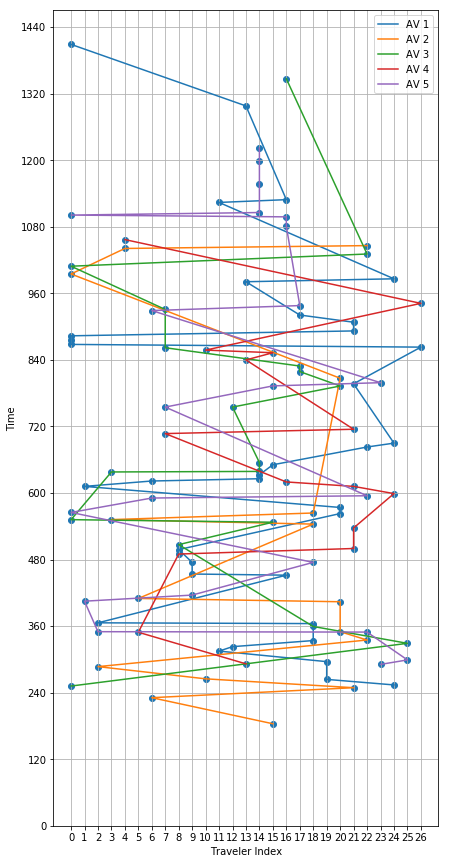

In [492]:
pod.plot_route_info_schedule(community_solution_allcar15['route_info'],community_trips,5)